# Time Series with Python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### General Information

```py
1. Manipulating Time Series

#Parsing time series df

google2 = pd.read_csv(path, parse_dates=['Date'])
google2.head(1)

pd.read_csv(r'sp500.csv', parse_dates=['date'], index_col='date')
normalized = prices.div(prices.iloc[0]).mul(100)

pd.date_range(start=start, end=end, freq='M')

Upsampling: Fill or interpolate missing data
Downsampling: Aggregate existing data

data.asfreq('X')
	* D: daily
	* B: business days
	* M: month end 
	* MS: month start
	* BM: Business month end
	* BMS: Business month start
	
.resample() - Returns data only when calling another method
	
time_series.rolling(window=x).mean()
	* window = 30: # business days
	* window = '30D': # calendar days
	* min_periods
	
Other methods:
	* .rolling()
	* .expanding()
	* .cumsum()
	* .sumprod()
	* .cummin()/max()
	
	
	pr = data.SP500.pct_change()
pr_plus_one = pr.add(1)
cumulative_return = pr_plus_one.cumprod().sub(1)
cumulative_return.mul(100).plot()

################

2. Time Series Analysis

df1.join(df2, how=___) 
					- inner
					- left
					- right

df = df.resample(rule='W').last()

df.col.pct_change() - To get returns
df.col.diff() - To get the difference with the last record

Series1.corr(Series2) - To get correlation
Series1.autocorr() - To get autocorrelation


################

4. ARIMA Models

#Diagnostics from a model

model = ARIMA(earthquake['earthquakes_per_year'], order=(1,1,1))
results = model.fit()
# Create the 4 diagnostics plots
results.plot_diagnostics()

plot_acf(returns, alpha=0.05, lags=20) - Also used to find seasonality
plot_pacf()
```

---

* `tsfresh` library,is used for advanced time series feature extraction
* `Quantopian`, is useful for learning and using predictive models others have built.

## 1. Manipulating Time Series Data in Python

### 1.1 Working with Time Series

In [3]:
#Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7, freq='D')

#Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())


6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


In [4]:
google = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\google.csv')
google.head(1)

Date  Close
0  2014-01-02  556.0

In [5]:
google.Date = pd.to_datetime(google.Date)
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [6]:
google.set_index('Date', inplace=True)
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


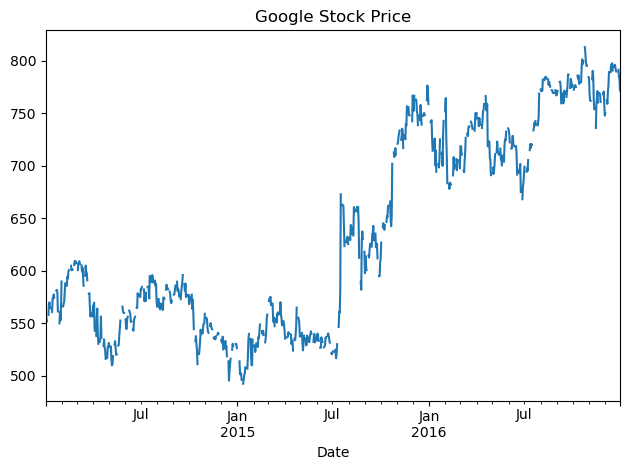

In [15]:
google.Close.plot(title='Google Stock Price')
plt.tight_layout()
plt.show()

In [21]:
#Indexing
google['2015'][:5]

C:\Users\M0201420\AppData\Local\Temp\ipykernel_21168\2796543237.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  google['2015'][:5]


Close
Date              
2015-01-01     NaN
2015-01-02  524.81
2015-01-03     NaN
2015-01-04     NaN
2015-01-05  513.87

In [24]:
google.loc['2015-1-2','Close']

524.81

In [27]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 49.4 KB


In [34]:
#Higher frequency, missing data
google.asfreq('M')[:5]

Close
Date              
2014-01-31  589.89
2014-02-28  607.22
2014-03-31  556.70
2014-04-30  526.66
2014-05-31     NaN

In [35]:
#Business Days
google.asfreq('B')[:5]

Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-06  558.10
2014-01-07  568.86
2014-01-08  570.04

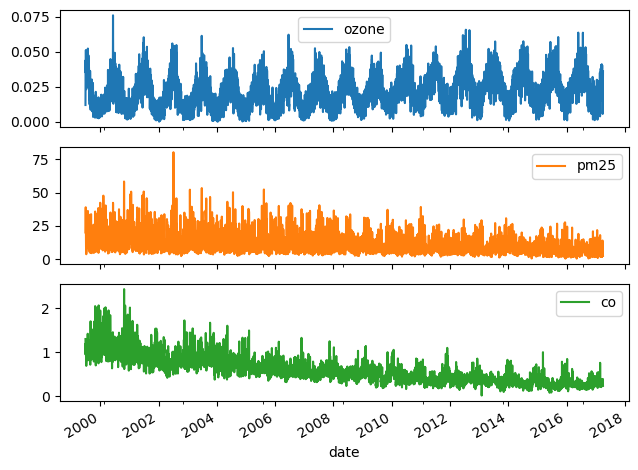

In [40]:
#---------EXCERCISE---------


data = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\air_quality_data\nyc.csv')

#Inspect data
#print(data.info())

#Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

#Set date column as index
data.set_index('date', inplace=True)

#Inspect data 
#print(data.info())

#Plot data
data.plot(subplots=True)
plt.tight_layout()
plt.show()

In [47]:
prices = pd.DataFrame()

for year in ['2014', '2015', '2016']:
    price_per_year = google.loc[year, ['Close']].reset_index(drop=True)
    price_per_year.rename(columns={'Close': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

prices.head()

2014    2015    2016
0  556.00     NaN     NaN
1  551.95  524.81     NaN
2     NaN     NaN     NaN
3     NaN     NaN  741.84
4  558.10  513.87  742.58

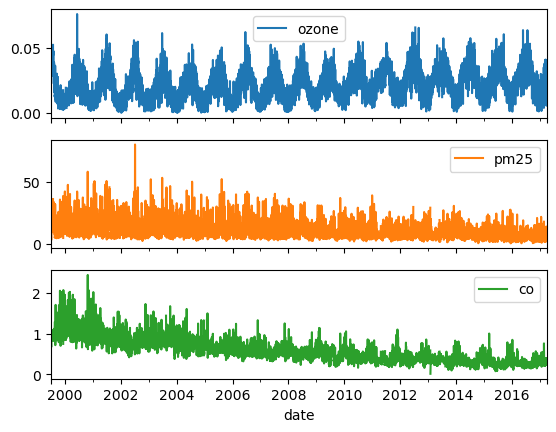

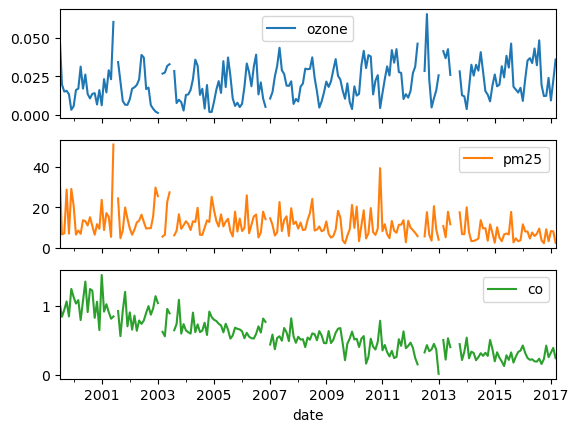

In [50]:

#---------EXCERCISE---------

#Set the frequency to calendar daily
co = data.asfreq('D')

#Plot the data
co.plot(subplots=True)
plt.show()


#Set frequency to monthly
co = data.asfreq('M')

#Plot the data
co.plot(subplots=True)
plt.show()

In [88]:
path = r'C:\Github\Learning\Datasets\Time_Series\stock_data\google.csv'
google2 = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
google2.head(1)

Close
Date             
2014-01-02  556.0

In [74]:
#shift attribute
#'periods' parameter

#google['shifted'] = google.Close.shift()
#google['lagged'] = google.Close.shift(periods=-1)
google.head()

Close  shifted  lagged
Date                               
2014-01-02  556.00      NaN  551.95
2014-01-03  551.95   556.00     NaN
2014-01-04     NaN   551.95     NaN
2014-01-05     NaN      NaN  558.10
2014-01-06  558.10      NaN  568.86

In [93]:
#Financial Return
google['change'] = google.Close.div(google.shifted)
google['return'] = google.change.sub(1).mul(100)
google['diff'] = google.Close.diff()
google['pct_change'] = google.Close.pct_change().mul(100)
google['return_3d'] = google.Close.pct_change(periods=3).mul(100)
google.head(6)


#Create daily_return
#google['daily_return'] = google.Close.pct_change(periods=1).mul(100)

#Create monthly_return
#google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)

#Create annual_return
#google['annual_return'] = google.Close.pct_change(periods=360).mul(100)

Close  shifted  lagged    change    return   diff  pct_change  \
Date                                                                         
2014-01-02  556.00      NaN  551.95       NaN       NaN    NaN         NaN   
2014-01-03  551.95   556.00     NaN  0.992716 -0.728417  -4.05   -0.728417   
2014-01-04     NaN   551.95     NaN       NaN       NaN    NaN    0.000000   
2014-01-05     NaN      NaN  558.10       NaN       NaN    NaN    0.000000   
2014-01-06  558.10      NaN  568.86       NaN       NaN    NaN    1.114231   
2014-01-07  568.86   558.10  570.04  1.019280  1.927970  10.76    1.927970   

            return_3d  
Date                   
2014-01-02        NaN  
2014-01-03        NaN  
2014-01-04        NaN  
2014-01-05  -0.728417  
2014-01-06   1.114231  
2014-01-07   3.063683

### 1.2 Basic Time Series Metrics & Resampling

#### Compare time series growth rates

1. Normalize price series to start at 100
2. Divide all prices by first in series, multiply by 100
    * Same starting point
    * All prices relative to starting point

In [7]:
google.head()

Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-04     NaN
2014-01-05     NaN
2014-01-06  558.10

In [11]:
first_price = google.Close[0]

normalized = google.Close.div(first_price).mul(100)
normalized.head()

Date
2014-01-02    100.000000
2014-01-03     99.271583
2014-01-04           NaN
2014-01-05           NaN
2014-01-06    100.377698
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

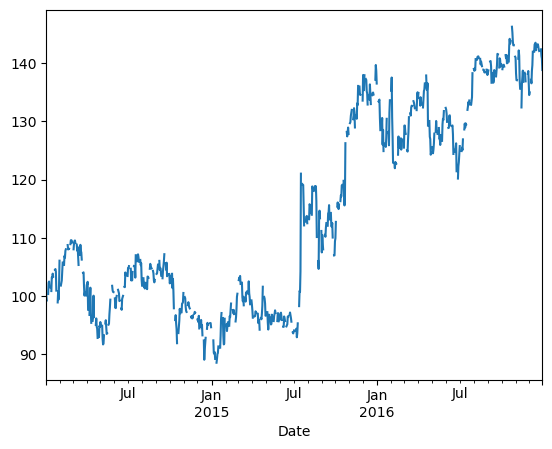

In [12]:
normalized.plot()

In [44]:
prices = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\apple_google.csv', parse_dates=['Date'], index_col='Date')
prices.head(1)

AAPL    GOOG
Date                    
2010-01-04   NaN  313.06

In [45]:
index = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\sp500.csv', parse_dates=['date'], index_col='date')
index.head(1)


SP500
date               
2007-06-29  1503.35

In [46]:
prices = pd.concat([prices, index], axis=1).dropna()
prices.head(3)

AAPL    GOOG    SP500
2010-12-16  45.89  295.56  1242.87
2010-12-17  45.80  295.10  1243.91
2010-12-20  46.03  297.23  1247.08

<AxesSubplot:>

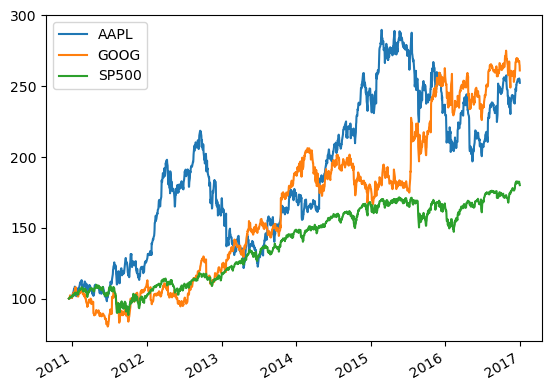

In [47]:
normalized = prices.div(prices.iloc[0]).mul(100)
normalized.plot()

<AxesSubplot:>

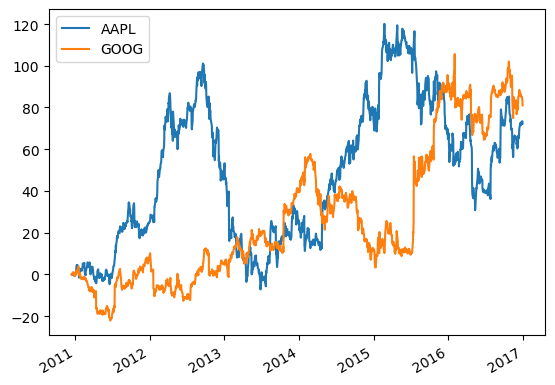

In [51]:
#Plottig performance difference

diff = normalized[['AAPL','GOOG']].sub(normalized['SP500'], axis=0)
diff.plot()

#### Changing frequency

Upsampling: Fill or interpolate missing data \
Downsampling: Aggregate existing data

* `asfreq()`,  `.reindex()`
* `.resample()` + transformation method

#monthly = quarterly.asfreq('M') \
#monthly = monthly.to_frame('baseline') 

#### Upsampling methods

```py
monthly['ffill'] = quarterly.asfreq('M', method='ffill') 
#ffill: Forward fill  
#bfill: Backward fill
monthly['ffill'] = quarterly.asfreq('M', fill_value=0)

Also used `quarterly.reindex(dates)` 
```


In [57]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create and print monthly here
monthly = pd.Series([1,2], index=monthly_dates)
# print(monthly)

# Create weekly_dates here
# weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
# print(monthly.reindex(weekly_dates))
# print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

#OR
#data.asfreq('W', method='bfill').head()

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


Now with resample, which is similar to groupby()

In [62]:
unrate = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\unrate.csv', parse_dates=['DATE'], index_col = 'DATE')
unrate.head()
#reporting first day of the month

UNRATE
DATE              
2010-01-01     9.8
2010-02-01     9.8
2010-03-01     9.9
2010-04-01     9.9
2010-05-01     9.6

In [68]:
unrate.asfreq('MS').equals(unrate.resample('MS').asfreq())

True

In [66]:
unrate.resample('MS').asfreq()

UNRATE
DATE              
2010-01-01     9.8
2010-02-01     9.8
2010-03-01     9.9
2010-04-01     9.9
2010-05-01     9.6
...            ...
2016-09-01     4.9
2016-10-01     4.8
2016-11-01     4.6
2016-12-01     4.7
2017-01-01     4.8

[85 rows x 1 columns]

In [88]:
gdp = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\gdp_growth.csv', parse_dates=['date'], index_col = 'date')
gdp.tail()

gdp_growth
date                  
2016-01-01         0.8
2016-04-01         1.4
2016-07-01         3.5
2016-10-01         2.1
2017-01-01         1.4

In [90]:
#gdp.resample('MS').ffill().add_sufix('_ffill')
gdp2 = gdp.resample('MS').interpolate().add_suffix('_inter')
gdp2.head()

#OR
#weekly['ffill'] = weekly.UNRATE.ffill()
#weekly['interpolated'] = weekly.UNRATE.interpolate()

gdp_growth_inter
date                        
2007-01-01          0.200000
2007-02-01          1.166667
2007-03-01          2.133333
2007-04-01          3.100000
2007-05-01          2.966667

<AxesSubplot:>

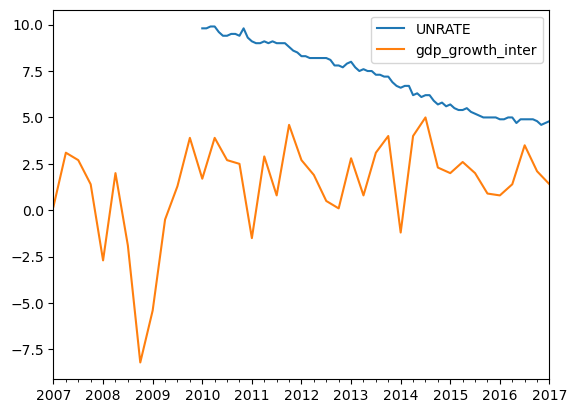

In [91]:
pd.concat([unrate, gdp2], axis=1).plot()

#### Downsampling methods

In [119]:
ozone = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\air_quality_data\ozone_nyc.csv', parse_dates=['date'], index_col = 'date')

In [101]:
ozone.resample('MS').mean().head()

Ozone
date                
2000-01-01  0.010443
2000-02-01  0.011817
2000-03-01  0.016810
2000-04-01  0.019413
2000-05-01  0.026535

In [104]:
ozone.resample('MS').agg(['mean','std']).head(1)

Ozone          
                mean       std
date                          
2000-01-01  0.010443  0.004755

<AxesSubplot:xlabel='date'>

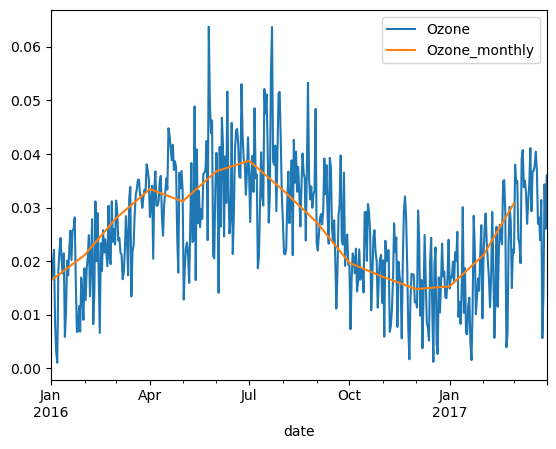

In [120]:
ozone = ozone.loc['2016':]
ax = ozone.plot()
monthly = ozone.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax)

### 1.3 Window functions

There are two types of windows:
1. Rolling: Same size, sliding
2. Expanding: Contain all prior values

<AxesSubplot:xlabel='Date'>

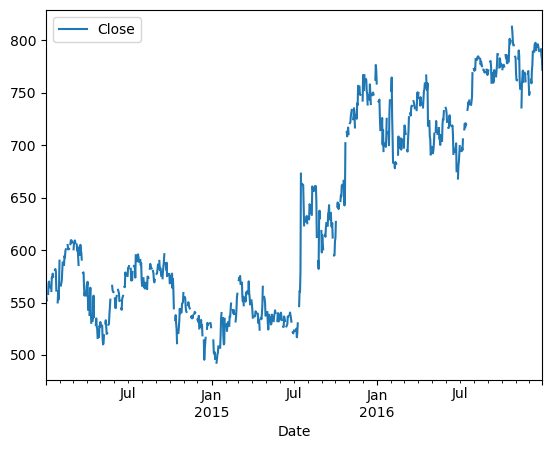

In [4]:
path = r'C:\Github\Learning\Datasets\Time_Series\stock_data\google.csv'
google = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
google.plot()

In [135]:
pd.concat([google.head(10), google.rolling(window=2).mean().head(10), google.rolling(window='2D').mean().head(10)], axis=1)


Close    Close    Close
Date                                
2014-01-02  556.00      NaN  556.000
2014-01-03  551.95  553.975  553.975
2014-01-04     NaN      NaN  551.950
2014-01-05     NaN      NaN      NaN
2014-01-06  558.10      NaN  558.100
2014-01-07  568.86  563.480  563.480
2014-01-08  570.04  569.450  569.450
2014-01-09  564.55  567.295  567.295
2014-01-10  564.52  564.535  564.535
2014-01-11     NaN      NaN  564.520

In [141]:
google.head(10).join(google.rolling(window='3D').mean().head(10).add_suffix('_joined'))

Close  Close_joined
Date                            
2014-01-02  556.00    556.000000
2014-01-03  551.95    553.975000
2014-01-04     NaN    553.975000
2014-01-05     NaN    551.950000
2014-01-06  558.10    558.100000
2014-01-07  568.86    563.480000
2014-01-08  570.04    565.666667
2014-01-09  564.55    567.816667
2014-01-10  564.52    566.370000
2014-01-11     NaN    564.535000

<AxesSubplot:xlabel='Date'>

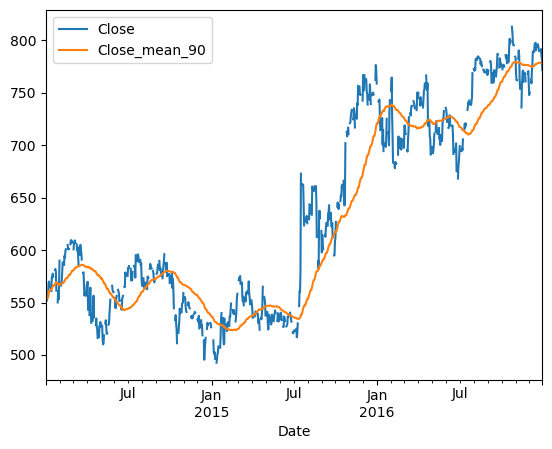

In [137]:
r90 = google.rolling(window='90D').mean()
google.join(r90.add_suffix('_mean_90')).plot()

In [150]:
google.Close.rolling('360D').median().to_frame('median').head(5)

median
Date               
2014-01-02  556.000
2014-01-03  553.975
2014-01-04  553.975
2014-01-05  553.975
2014-01-06  556.000

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1094 non-null   float64
dtypes: float64(1)
memory usage: 17.1 KB


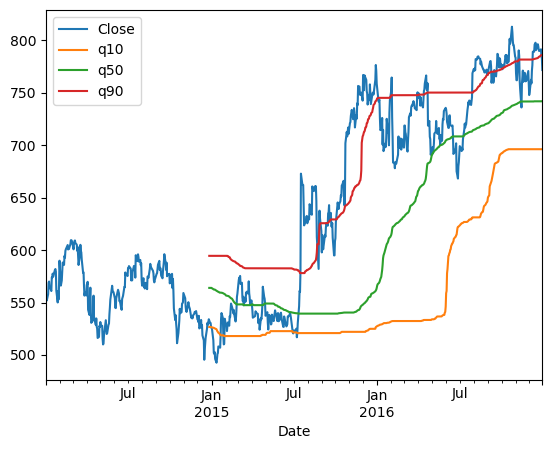

In [165]:
# Resample, interpolate and inspect ozone data here
data = google.resample('D').interpolate()
data.info()

# Create the rolling window
rolling = data.Close.rolling(360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)

# Plot the data
data.plot()
plt.show()

In [168]:
data['2016':].head()

Close         q10         q50         q90
Date                                                  
2016-01-01  754.62  527.542000  566.043333  744.818000
2016-01-02  750.36  527.802000  567.353333  744.970333
2016-01-03  746.10  527.829667  567.875000  745.248000
2016-01-04  741.84  528.118000  568.265000  745.248000
2016-01-05  742.58  528.285000  568.655000  745.248000

#### Sum and diff

In [6]:
df = pd.DataFrame({'data': range(5)})
df['expanding_sum'] = df.data.expanding().sum()
df['cum_sum'] = df.data.cumsum()
df

data  expanding_sum  cum_sum
0     0            0.0        0
1     1            1.0        1
2     2            3.0        3
3     3            6.0        6
4     4           10.0       10

In [46]:
data = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\sp500.csv', parse_dates=['date'], index_col='date')
data.head()

SP500
date               
2007-06-29  1503.35
2007-07-02  1519.43
2007-07-03  1524.87
2007-07-05  1525.40
2007-07-06  1530.44

Single period return:

$r_t = \dfrac{P_t}{P_{t-1}}-1$ or $\dfrac{P_t - P_{t-1}}{P_{t-1}}$

Multi-period return:

$R_t = (1+r_1)(1+r_2)...(1+r_T)-1$

In [30]:
(data.pct_change().add(1).head()).join(data.pct_change().add(1).cumprod().head().add_suffix('_cumprod'))

SP500  SP500_cumprod
date                               
2007-06-29       NaN            NaN
2007-07-02  1.010696       1.010696
2007-07-03  1.003580       1.014315
2007-07-05  1.000348       1.014667
2007-07-06  1.003304       1.018020

<AxesSubplot:xlabel='date'>

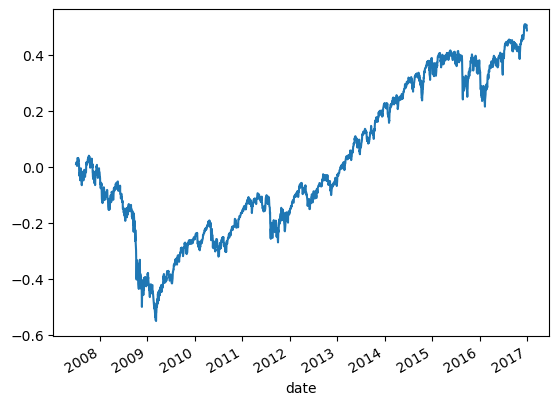

In [39]:
pr = data.SP500.pct_change()
pr_plus_one = pr.add(1)
cumulative_return = pr_plus_one.cumprod().sub(1)
cumulative_return.mul(1).plot()

<AxesSubplot:xlabel='date'>

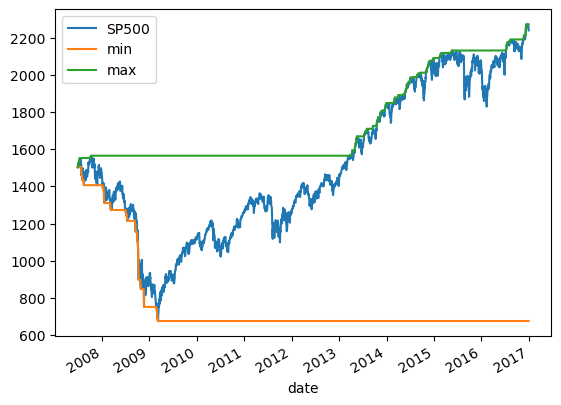

In [40]:
data['min'] = data.SP500.expanding().min()
data['max'] = data.SP500.expanding().max()
data.plot()

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

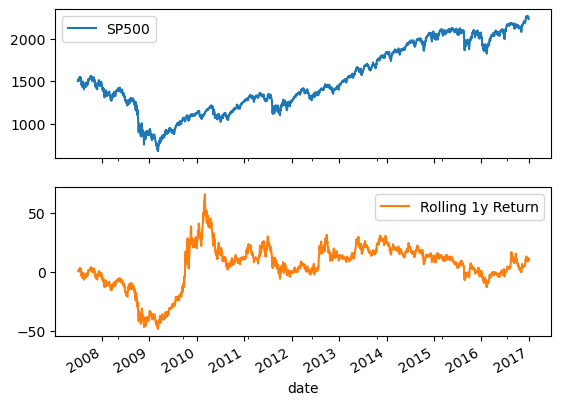

In [47]:
def multi_period_return(periods_returns):
    return np.prod(periods_returns+1) -1

pr=data.SP500.pct_change()
r = pr.rolling('360D').apply(multi_period_return)
data['Rolling 1y Return'] = r.mul(100)
data.plot(subplots=True)

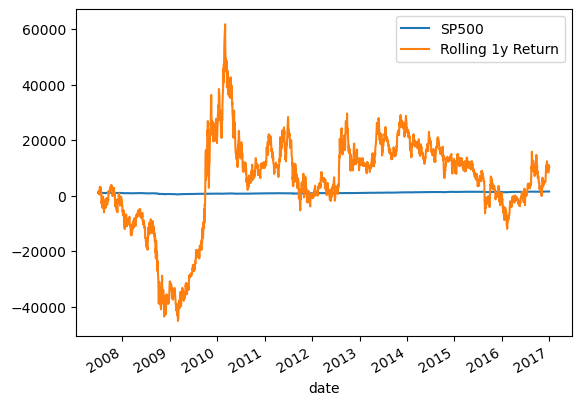

In [48]:
#Return on investment of $1000

# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show()

#### Random Walk

In [58]:
from numpy.random import normal, seed
from scipy.stats import norm

In [84]:
import seaborn as sns
from numpy.random import choice

<AxesSubplot:>

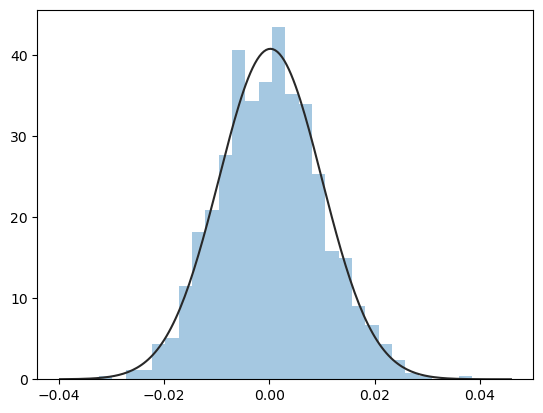

In [171]:
seed(42)
random_returns= normal(loc=0, scale=0.01, size=1000)
sns.distplot(random_returns, fit=norm, kde=False)

<AxesSubplot:>

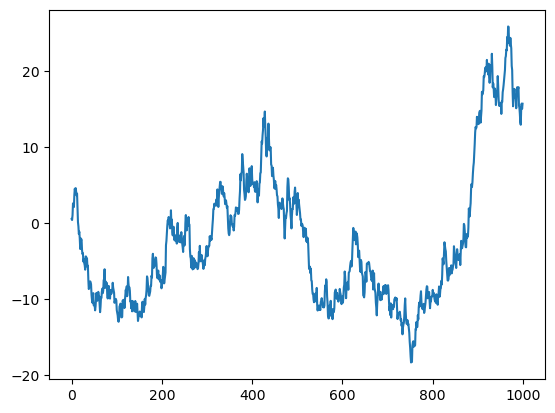

In [184]:
return_series=pd.Series(random_returns)
random_prices = return_series.add(1).cumprod().sub(1)
random_prices.mul(100).plot()

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

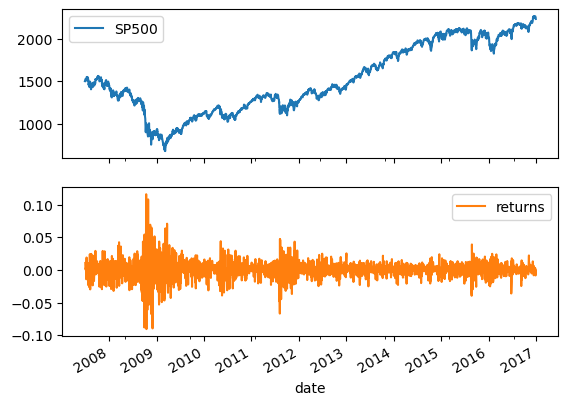

In [173]:
data = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\sp500.csv', parse_dates=['date'], index_col='date')
data['returns'] = data.SP500.pct_change()
data.plot(subplots=True)

In [180]:
sample = data.returns.dropna()
n_obs = data.returns.count()
random_walk = choice(sample, size=n_obs)
random_walk = pd.Series(random_walk, index=sample.index)
random_walk.head()

date
2007-07-02    0.008015
2007-07-03   -0.010703
2007-07-05    0.000061
2007-07-06    0.005701
2007-07-09   -0.004849
dtype: float64

In [185]:
start=data.SP500.first('D')
sp500_random = start.append(random_walk.add(1))

C:\Users\M0201420\AppData\Local\Temp\ipykernel_5044\191542980.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp500_random = start.append(random_walk.add(1))


<AxesSubplot:xlabel='date'>

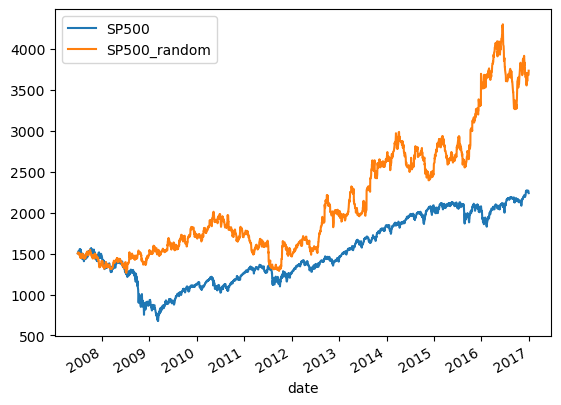

In [182]:
data['SP500_random'] = sp500_random.cumprod()
data[['SP500', 'SP500_random']].plot()

#### Relationships between time series

In [188]:
assets = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\asset_classes.csv', parse_dates=['DATE'], index_col = 'DATE')
assets.head()


SP500   Bonds    Gold    Oil
DATE                                      
2007-06-29  1503.35  402.15  648.50  70.47
2007-07-02  1519.43  402.96  650.50  71.11
2007-07-03  1524.87  402.02  657.25  71.41
2007-07-05  1525.40  400.15  655.90  71.81
2007-07-06  1530.44  399.31  647.75  72.80

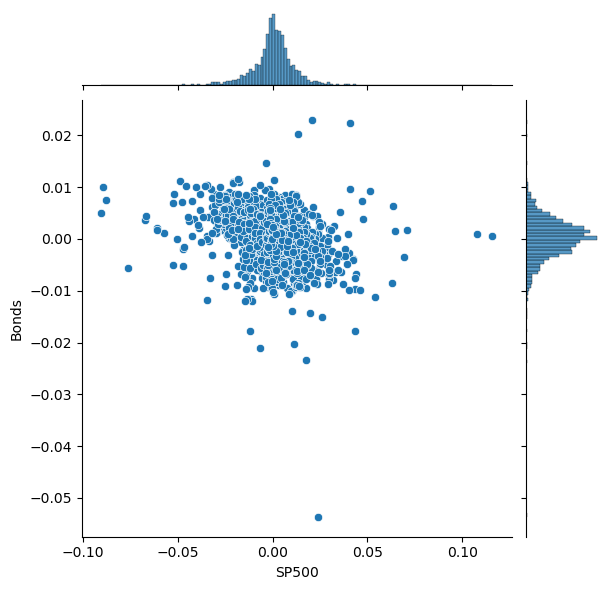

In [196]:
daily_returns = assets.pct_change()
sns.jointplot(x='SP500', y ='Bonds', data=daily_returns)

In [197]:
correlations = daily_returns.corr()
correlations

SP500     Bonds      Gold       Oil
SP500  1.000000 -0.314890 -0.006546  0.335353
Bonds -0.314890  1.000000  0.028882 -0.215279
Gold  -0.006546  0.028882  1.000000  0.104272
Oil    0.335353 -0.215279  0.104272  1.000000

<AxesSubplot:>

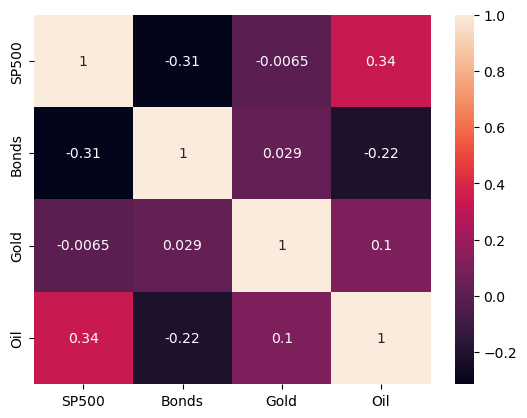

In [199]:
sns.heatmap(correlations, annot=True)

### 1.4 Putting it all together

* Market Capitlization 

 $MarketValue = SharePrice * NumerOfShares$

In [215]:
nyse = pd.read_excel(r'C:\Github\Learning\Datasets\Time_Series\stock_data\listings.xlsx', sheet_name='nyse', na_values='n/a')
nyse.set_index('Stock Symbol', inplace=True)
nyse.dropna(subset=['Sector'], inplace=True)
nyse['Market Capitalization'] /= 1e6 #In Million USD
nyse.head()

c:\Users\M0201420\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Company Name  Last Sale  Market Capitalization  \
Stock Symbol                                                             
DDD           3D Systems Corporation      14.48            1647.165276   
MMM                       3M Company     188.65          112736.642168   
WBAI                 500.com Limited      13.96             579.312876   
WUBA                     58.com Inc.      36.11            5225.238185   
AHC            A.H. Belo Corporation       6.20             134.735089   

              IPO Year             Sector  \
Stock Symbol                                
DDD                NaN         Technology   
MMM                NaN        Health Care   
WBAI            2013.0  Consumer Services   
WUBA            2013.0         Technology   
AHC                NaN  Consumer Services   

                                                     Industry  
Stock Symbol                                                   
DDD                   Computer Software: Prepackaged Software  
MMM                                Medical/Dental Instruments  
WBAI                    Services-Misc. Amusement & Recreation  
WUBA          Computer Software: Programming, Data Processing  
AHC                                      Newspapers/Magazines

In [230]:
components = nyse.groupby('Sector')['Market Capitalization'].nlargest(1)
components.sort_values(ascending=False)

Sector                 Stock Symbol
Health Care            JNJ             338834.390080
Energy                 XOM             338728.713874
Finance                JPM             300283.250479
Miscellaneous          BABA            275525.000000
Public Utilities       T               247339.517272
Basic Industries       PG              230159.644117
Consumer Services      WMT             221864.614129
Consumer Non-Durables  KO              183655.305119
Technology             ORCL            181046.096000
Capital Goods          TM              155660.252483
Transportation         UPS              90180.886756
Consumer Durables      ABB              48398.935676
Name: Market Capitalization, dtype: float64

In [237]:
tickers = components.index.get_level_values('Stock Symbol')
tickers

Index(['PG', 'TM', 'ABB', 'KO', 'WMT', 'XOM', 'JPM', 'JNJ', 'BABA', 'T',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')

In [283]:
columns= ['Company Name', 'Market Capitalization', 'Last Sale']
component_info = nyse.loc[tickers, columns]
pd.options.display.float_format = '{:,.2f}'.format
component_info

Company Name  Market Capitalization  Last Sale
Stock Symbol                                                                  
PG            Procter & Gamble Company (The)             230,159.64      90.03
TM                 Toyota Motor Corp Ltd Ord             155,660.25     104.18
ABB                                  ABB Ltd              48,398.94      22.63
KO                   Coca-Cola Company (The)             183,655.31      42.79
WMT                    Wal-Mart Stores, Inc.             221,864.61      73.15
XOM                  Exxon Mobil Corporation             338,728.71      81.69
JPM                    J P Morgan Chase & Co             300,283.25      84.40
JNJ                        Johnson & Johnson             338,834.39     124.99
BABA           Alibaba Group Holding Limited             275,525.00     110.21
T                                  AT&T Inc.             247,339.52      40.28
ORCL                      Oracle Corporation             181,046.10      44.00
UPS              United Parcel Service, Inc.              90,180.89     103.74

In [318]:
data = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\stock_data.csv', parse_dates=['Date'], index_col = 'Date')

#### Building a market-cap weighted index

In [269]:
#COUNTING THE NUMBER OF SHARES

#Calculate the number of shares here
no_shares = component_info['Market Capitalization'].div(component_info['Last Sale'])

# Print the sorted no_shares
print(no_shares.sort_values(ascending=False))


Stock Symbol
T      6,140.50
KO     4,292.01
XOM    4,146.51
ORCL   4,114.68
JPM    3,557.86
WMT    3,033.01
JNJ    2,710.89
PG     2,556.48
BABA   2,500.00
ABB    2,138.71
TM     1,494.15
UPS      869.30
dtype: float64


Market Cap across the time, is the multiplication of "Last Sale" and "Number of shares".

Then, sum all the market cap values across the axis 1, and will get just a column with the total market cap, and then, normalize.

```py
raw_index = market_cap_series.sum(axis=1)
print(raw_index)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)
```

#### Evaluate index performance

In [276]:
#raw_index = market_cap_series.sum(axis=1)

# Normalize the aggregate market cap here 
# index = raw_index.div(raw_index.iloc[0]).mul(100)
# print(index)

In [278]:
#This example will be done with the stock price, but it is supposed to be done with the total market cap

change = data.first('D').append(data.last('D'))
change.diff().iloc[-1].sort_values()

C:\Users\M0201420\AppData\Local\Temp\ipykernel_5044\242407187.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  change = data.first('D').append(data.last('D'))


TEF    -19.35
RIO    -17.57
PAA      5.29
CPRT     9.30
EL      52.22
UPS     56.46
GS      66.37
MA      77.57
AAPL    85.25
AMGN    88.49
ILMN    97.49
AMZN   615.97
Name: 2016-12-30 00:00:00, dtype: float64

<AxesSubplot:ylabel='Stock Symbol'>

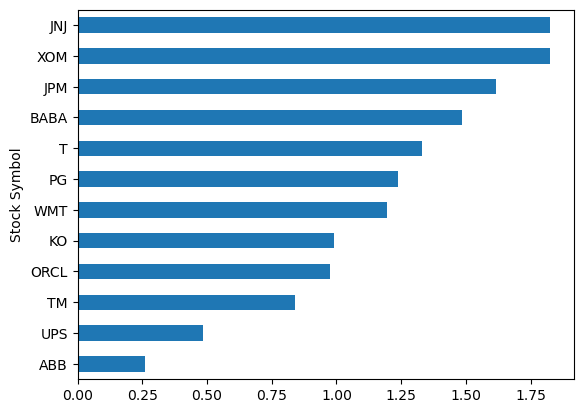

In [313]:
#index_return = (index.iloc[-1] / index.iloc[0] - 1) * 100
# Output: 14.06
index_return = 14.06

weights = component_info['Market Capitalization'].div(component_info['Market Capitalization'].sum())

weighted_returns = weights.mul(index_return)

weighted_returns.sort_values().plot(kind='barh')


In [306]:
#Benchmark

# data = index.to_frame('Index')
# sp500 = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\sp500.csv', parse_dates=['date'], index_col='date')
# sp500 = sp500.div(sp500.iloc[0], axis=1).mul(100)

#Then plot sp500 and index and they must perform very similar

In [307]:
# def multi_period_return(r):
#     return (np.prod(r+1) -1 ) * 100

# data.pct_change().rolling('30D').apply(multi_period_return).plot()

#### Index Correlation and exporting to excel

Text(0.5, 1.0, 'Daily Returns')

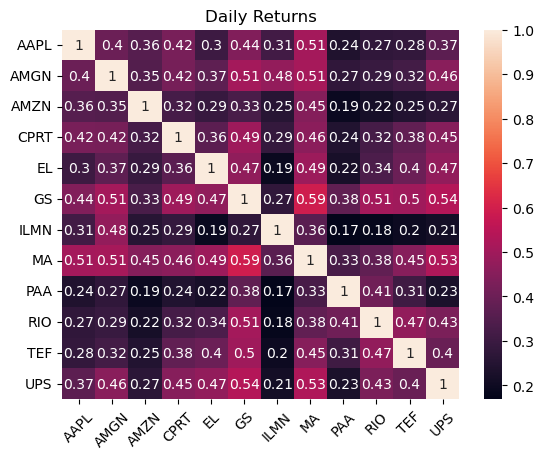

In [325]:
stock = data['2015':'2016']
daily_returns = stock.pct_change() #Daily returns
correlations = daily_returns.corr()
sns.heatmap(correlations, annot=True)
plt.xticks(rotation=45)
plt.title('Daily Returns')

In [330]:
import xlwt

correlations.to_excel(excel_writer = 'correlations.xls', 
                      sheet_name = 'correlations',
                      startrow=1,
                      startcol=1)

C:\Users\M0201420\AppData\Local\Temp\ipykernel_5044\1019120346.py:3: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  correlations.to_excel(excel_writer = 'correlations.xls',


In [338]:
# Write to multiple worksheets

#data.index = data.index.date

with pd.ExcelWriter('stock_data.xlsx') as writer:
    correlations.to_excel(excel_writer=writer, sheet_name='correlations')
    data.to_excel(excel_writer=writer, sheet_name='prices')
    data.pct_change().to_excel(excel_writer=writer, sheet_name='returns')

---

## 2. Time Series Analysis

### 2.1 Correlation and Autocorrelation

Correlation describes the relationship between two time series and autocorrelation describes the relationship of a time series with its past values.

* When analyzing two different stocks, is important to analyze the returns, not the value itself (levels).

Steps:
1. Compute percentage changed of both series with `.pct_change()`
2. Drop NaNs (No return for the first record)
3. Can visualize correlation with scatter plot
4. See the correlation with `.cor()`

#### Linear regression

Ordinary Least Squares (OLS)

```py
import statsmodels.api as sm
sm.OLS(y,x).fit()

#It's needed to add a column with a constant, because if not, it's assumed the regressions doens't need an intercept
df = dm.add_constant(df) #Adds a new column 'const' with values of '1'
df = df.dropna()

results = sm.OLS(df['col_Y'], df[['col_X1', 'const']]).fit()
print(results.summary())
```

#### Autocorrelation

* **Mean reversion** - Negative autocorrelation
* **Momentum** / **Trend Following** - Positive autocorrelation

In daily values, there may not be autocorrelation, this just exists when analyzing resampled data to weekly our anually.

In [9]:
msft = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\data\msft.csv', parse_dates=['Date'], index_col = 'Date')
msft.head(5)


Adj Close
Date                 
2012-08-06  26.107651
2012-08-07  26.377876
2012-08-08  26.438896
2012-08-09  26.587088
2012-08-10  26.517351

In [4]:
MSFT = msft.resample('W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = msft.pct_change()['Adj Close'].autocorr()

# Compute and print the autocorrelation of returns of Weekly
autocorrelation_w = returns['Adj Close'].autocorr()

print("The autocorrelation of returns is %4.2f" %(autocorrelation))
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation_w))

NameError: name 'msft' is not defined

If you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated

In [13]:
daily_rates = msft

# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()
# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['Adj Close'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample('A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['Adj Close'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is 0.00
The autocorrelation of annual interest rate changes is -0.78


### 2.2 Some Simple Time Series

#### Autocorrelation function (ACF)

It's the autocorrelation as a function of the lag, changing the value of the lag. There's interesting informatiom beyond lag-one, and autocorrlation for zero-lag is always one.

* Any significant non-zero correlations, implies that the series can be forecast from the past.

* **alpha**: % of chance that if true autocorrelation is zero, it will fall outisde blue band.

* If there is no clear pattern in the ACF and PACF, it wolud no be possible to forecast.

* Mostly should be used in a stationary time series.

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
# plct_acf(x, lags=20, alpha=0.05)

from statsmodels.tsa.stattools import acf
#print(acf(x)) - Values instead of Plot

In [18]:
hrb = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\data\hrb.csv', parse_dates=['Quarter'], index_col = 'Quarter')
hrb.head(5)

Earnings
Quarter             
2007-01-01     -0.36
2007-04-01     -0.38
2007-07-01      0.07
2007-10-01      1.85
2008-01-01     -0.34

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259 ]


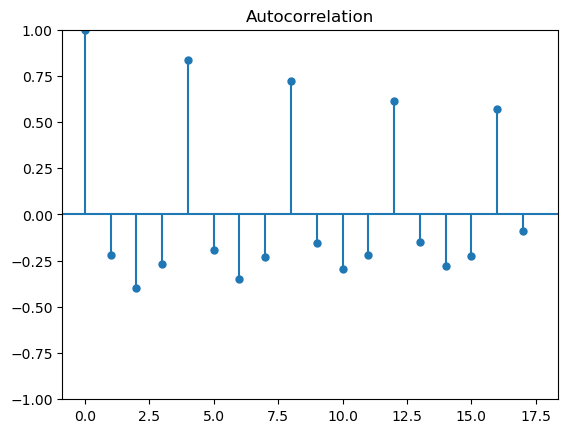

In [20]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(hrb)
print(acf_array)

# Plot the acf function
plot_acf(hrb, alpha=1)
plt.show()

In [40]:
hrb['Earnings'].corr(hrb['Earnings'].shift(4).dropna())
        

0.967285996760659

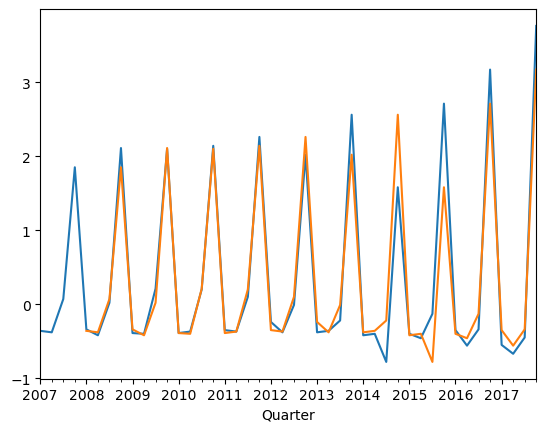

In [39]:
hrb['Earnings'].plot()
hrb['Earnings'].shift(4).dropna().plot()
plt.show()

In fact, the standard deviation of the sample autocorrelation is $\dfrac{1}{\sqrt(N)}$
 where $N$
 is the number of observations, so if $N=100$
, for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is $\dfrac{1.96}{\sqrt(N)}$
. This approximation only holds when the true autocorrelations are all zero.

The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


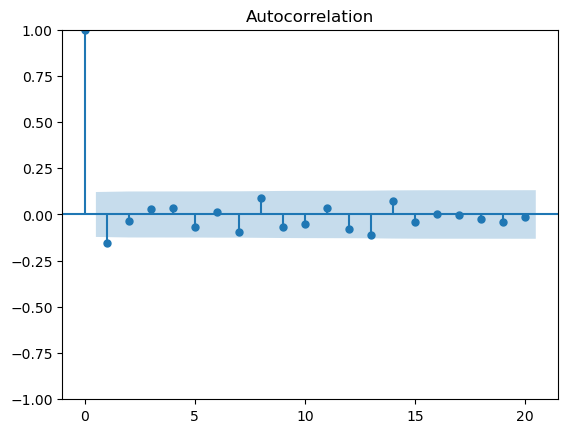

In [44]:
returns = returns.dropna()

# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(len(returns))
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

#### White noise

It's a series with:
* Constant mean
* Constant variance
* Zero autocorrelation at all lags

Notice that for a white noise time series, all the autocorrelations are close to zero, so the past will not help you forecast the future.

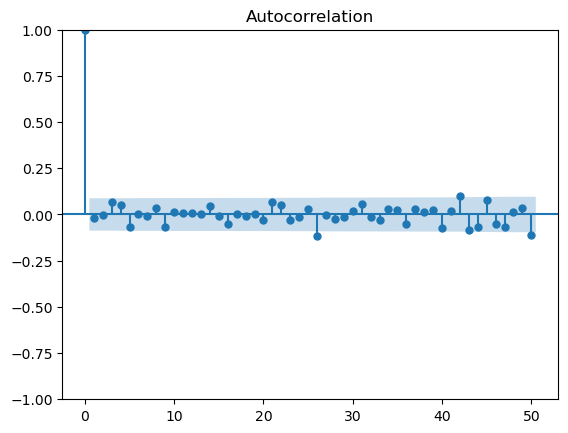

In [60]:
import numpy as np
noise = np.random.normal(loc=0, scale=1, size=500)
plot_acf(noise, lags=50)
plt.show()

#### Random Walk

$Today_price = Yesterday_price + white_noise$

* Can't forecast a random walk

The change in price of a random walk is just White Noise. Incidentally, if prices are in logs, then the difference in log prices is one way to measure returns. 

Change in prices is white noise:
* $P_t - P_{t-1} = \epsilon_{t}$

Random walk with drift (stock prices follow this)
* $P_t = \mu + P_{t-1} + \epsilon_t$

Regression test for random walk
* $P_t = \alpha + \beta P_{t-1} + \epsilon_t$

Test
* $H_0 : \beta = 1$ (Random walk)
* $H_1 : \beta < 1$ (No random walk)

It can be done now with the differences, it's just another way to do it, but now:
* $P_t  - P_{t-1}= \alpha + \beta P_{t-1} + \epsilon_t$

Test
* $H_0 : \beta = 0$ (Random walk)
* $H_1 : \beta < 0$ (No random walk)

##### Dickey-Fuller test

If you add more lagged changes on the right hand side, it's the **Augmented DickeyFuller** test.

```py
from statsmodels.tsaa.stattools import adfuller

results = adfuller(x)
results[1] #Is the p-value

#e.g.
p_value = 0.78
```

If p-value is less than 0.05, we can reject the null hypothesis that the series is a random walk with 95% confidence.

p-vale is > 0.05, so we can accept H0 (not reject)

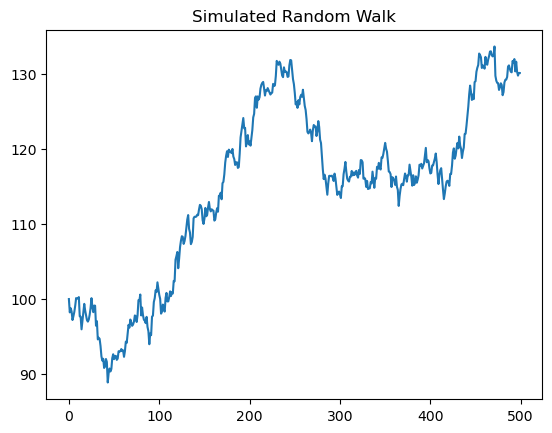

In [64]:
# GENERATING A RANDOM WALK

# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

You will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.

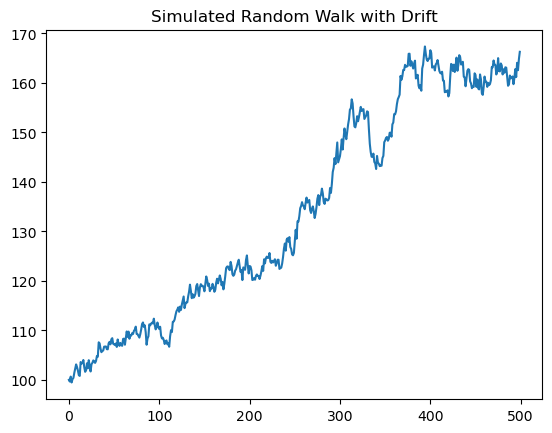

In [65]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

In [3]:
AMZN = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\data\msft.csv', parse_dates=['Date'], index_col = 'Date')

# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(0.18006177841534265, 0.9711208852369689, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, 2279.300324698147)
The p-value of the test on prices is: 0.9711208852369689


According to the last test, we cannot reject the hypothesis that Amazon prices follow a random walk.

In the last exercise, you showed that Amazon stock prices, contained in the DataFrame AMZN follow a random walk. In this exercise. you will do the same thing for Amazon returns (percent change in prices) and show that the returns do not follow a random walk.

In [68]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret)
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 1.729101493944071e-29


The p-value is extremely small, so we can easily reject the hypothesis that returns are a random walk at all levels of significance.

That's why it's needed to analyze the returns and not the values themselves.

#### Stationarity

* Strong stationarity: Entire distribution of data is time-invariant (do not depend on time).
* Weak stationarity: Mean, variance and autocorrelations of the observations are time-invariant (do no depend on time).

In other words, for the autocorrelation, the correlation between X-t and X-(t-tau) is only a function of the lag tau, and not a function of time.

And if if a process is no stationarity, then it becomes difficult to model.

Examples of Non-stationarity Series
* Random walk
* Seasonality in series (Mean varies with the time of the year)
* White Noise which increase over time (Change in Mean and STD over time)

Generally white noise is stationary.
Many non-stationary series can be made stationary through a simple transofrmation.

<AxesSubplot:title={'center':'Random Walk (Non-stationary)'}, xlabel='Date'>

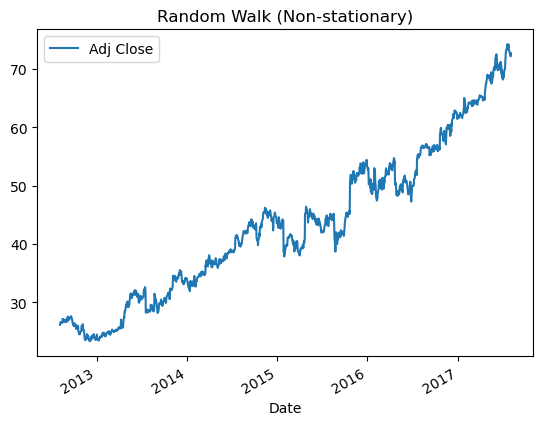

In [75]:
AMZN.plot(title='Random Walk (Non-stationary)')

By seasonally adjusting the series, we eliminated the seasonal pattern in the autocorrelation function.

<AxesSubplot:title={'center':'Diff (Stationary)'}, xlabel='Date'>

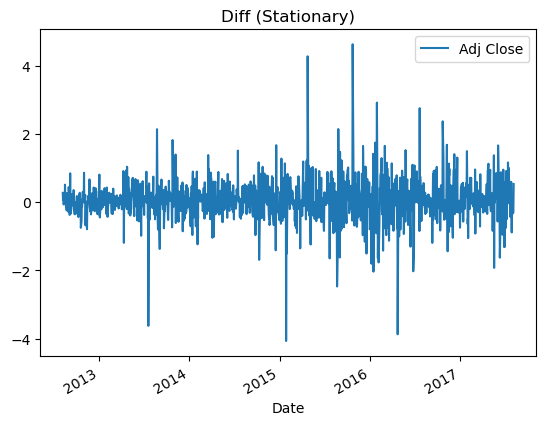

In [74]:
AMZN.diff().plot(title = 'Diff - White Noise (Stationary)')

Another example

<AxesSubplot:title={'center':'Seasonality (Non-Stationary)'}, xlabel='Quarter'>

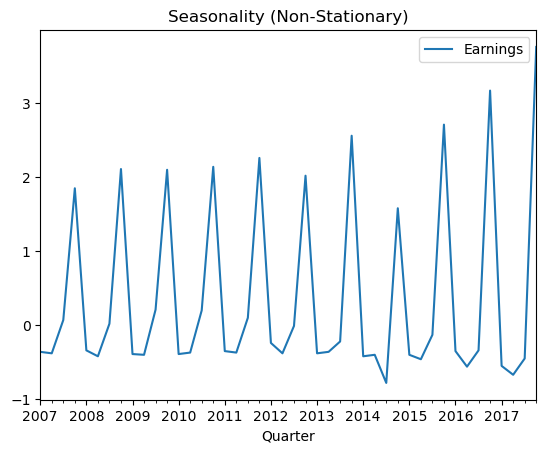

In [83]:
hrb.plot(title='Seasonality (Non-Stationary)')

By seasonally adjusting the series, we eliminated the seasonal pattern in the autocorrelation function.

<AxesSubplot:title={'center':'Seasonality difference (Stationary)'}, xlabel='Quarter'>

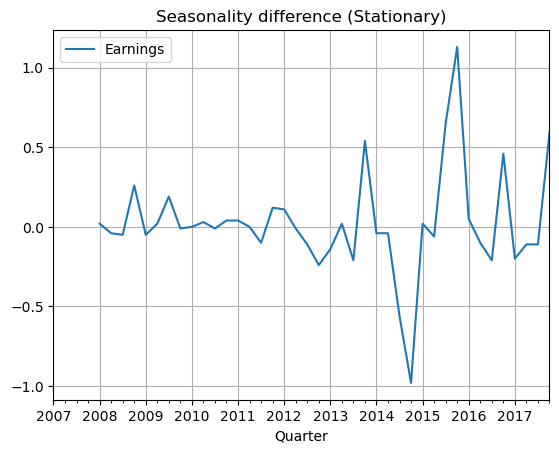

In [82]:
hrb.diff(4).plot(title='Seasonality difference (Stationary)', grid=True)

Sometimes is necessary to apply 2 transformations. If a process looks exponential, first apply a np.log and then the difference.

### 2.3 Autoregressive (AR) Models

#### Describe AR Model

These models use past values of the series to predict the current value.

$R_t = \mu + \phi R_{t-1} + \epsilon_t$ ,  where:
* $R_t = $ Today's value 
* $\epsilon_t = $ White Noise

Because there is just one lagged value int he right side, there is a **AR model of order 1**, or simply a **AR(1)**.

* If $\phi = 1$, the process is a random walk.
* If $\phi = 0$, the process is white noise.
* For stationarity, $-1 <  \phi < 1$
    *  Negative $\phi:$ Mean revertion
    *  Positive $\phi:$ Momentum
* $\phi = 0.9$,  looks similar to a random walk
* $\phi = -0.9$,  looks more irregular


With AR(2)

* $R_t = \mu + \phi_1R_{t-1} + \phi_2R_{t-2} + \epsilon_t$ ...

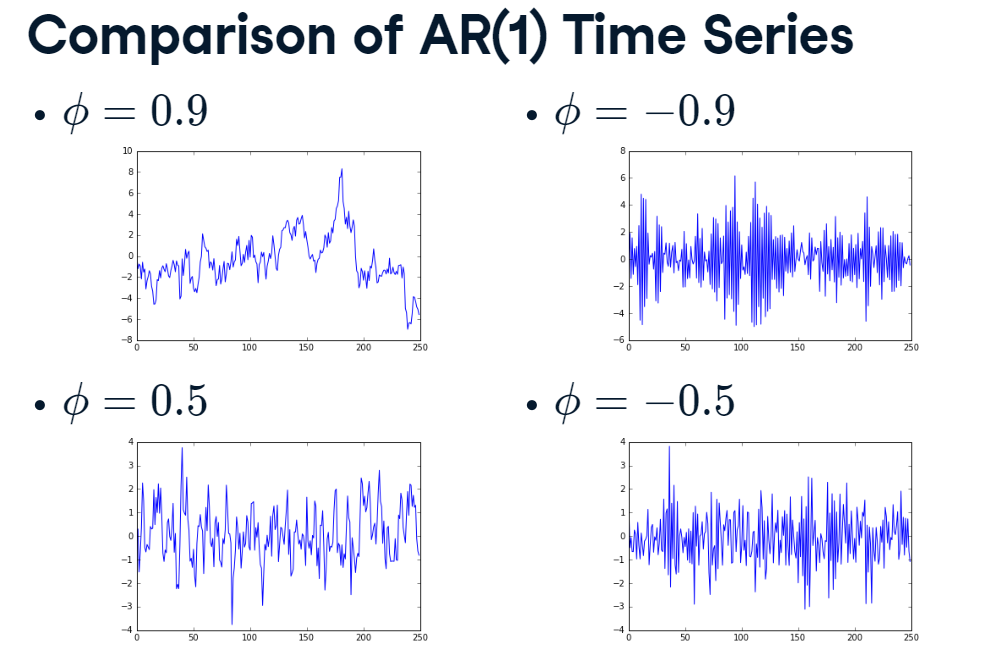

In [168]:
%matplotlib inline
from IPython.display import Image
Image(r'C:\Users\M0201420\Pictures\Delete\2.png')

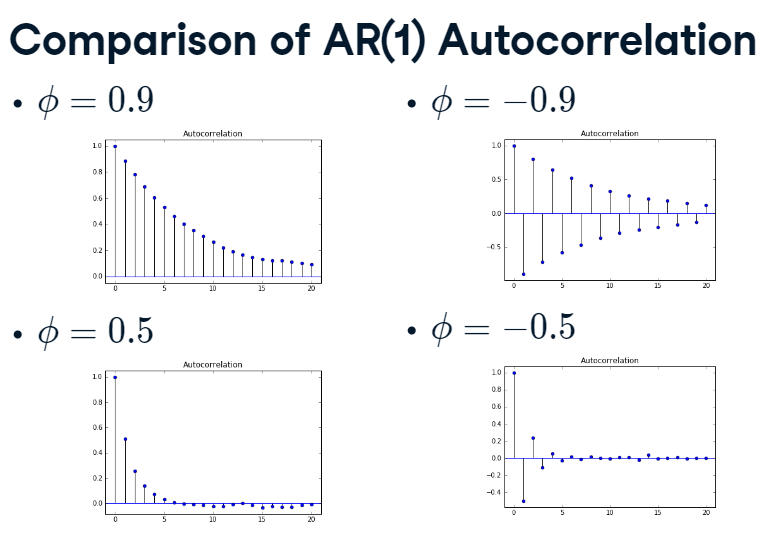

In [ ]:
%matplotlib inline
from IPython.display import Image
Image(r'C:\Users\M0201420\Pictures\Delete\1.png')

#### Simulating an AR process

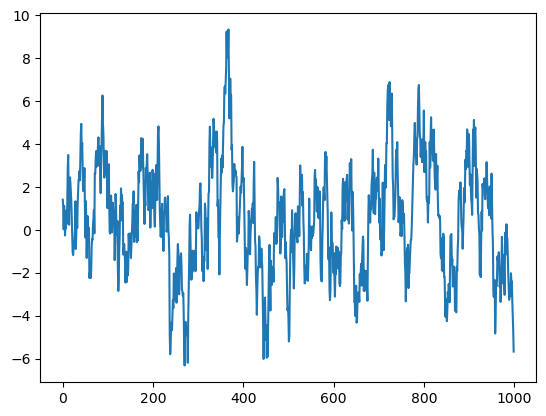

In [91]:
from statsmodels.tsa.arima_process import ArmaProcess

ar = np.array([1, -0.9]) # AR(1) and \phi is 0.9 (the opposite sign)
ma = np.array([1])

AR_object = ArmaProcess(ar,ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

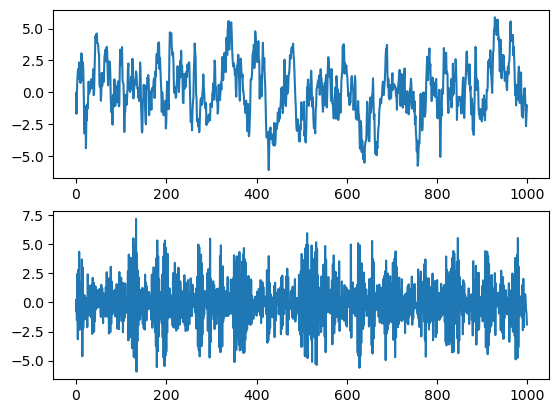

In [202]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

#### Estimating and Forecasting an AR Model

* To estimate parameters from data (simulated)

```py
from statsmodels.tsa.arima.model import ARMA
mod = ARMA(data, order=(1,0)) #AR(1)
result = mod.fit()
```

* ARIMA has been deprecated and replaced with ARIMA

```py
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(data, order=(1,0,0))
result = mod.fit()

# Can see se full output
print(result.summary())

# Can see coefficients foe mean (mu) and phi
print(results.params)
```

* For ARMA, order=(p,q)
* For ARIMA, order=(p,d,q)
* An order (2,0,0) would be an AR(2)
* d: Relates to whether you take first difference of the data to make it stationary (like we would to to a random walk)
* q: Is the MA part

```py
from statsmodels.graphics.tsaplot import plot_predict

fig, ax = plt.subplots()
data.plot(ax=ax)
plot_predict(result, start = '2012-09-27', end='2012-10-06', alpha=0.5, ax=ax)
plt.show()
```

In [203]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for phi
print("When the true phi=0.9, the estimate of phi is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1462.805
Date:                Fri, 17 Mar 2023   AIC                           2931.610
Time:                        08:56:27   BIC                           2946.333
Sample:                             0   HQIC                          2937.206
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1829      0.252      0.726      0.468      -0.311       0.677
ar.L1          0.8684      0.016     53.376      0.000       0.837       0.900
sigma2         1.0902      0.049     22.086      0.0

```py
# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast the first AR(1) model
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()
```

#### Choosing the right model

* There are two techniques to determine order
    * Partial Autocorrelation function
        * Partial Autocorrelation function measures the incremental benefit of adding another lag.
    * Information Criteria: Adjusts goodness-of-fit. There are two measures
        * AIC (Akaike Information Criteria)
        * BIC (Bayesian Information Criteria)

AIC and BIc can bee seen in the `results.summary()` or `results.aic/bic`

Generally, the BIC is used to select the AR model and the one with the lowest information criteria "p" is chosen.
    


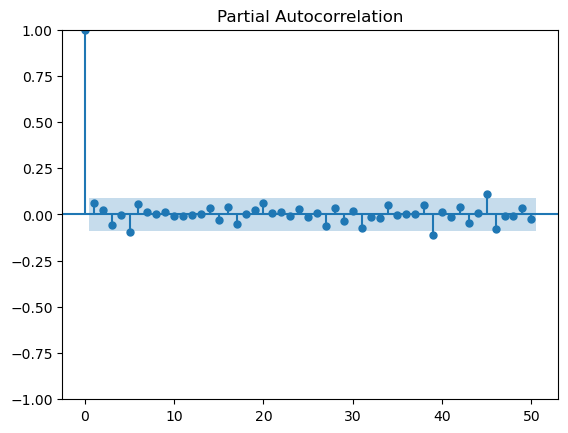

In [141]:
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np

noise = np.random.normal(loc=0, scale=1, size=500)
plot_pacf(noise, lags=50)
plt.show()

c:\Users\M0201420\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


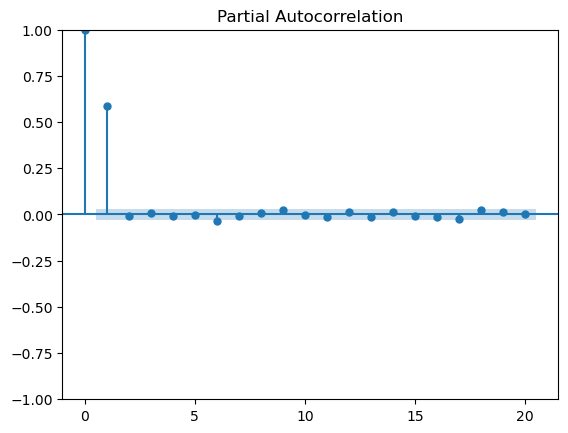

c:\Users\M0201420\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


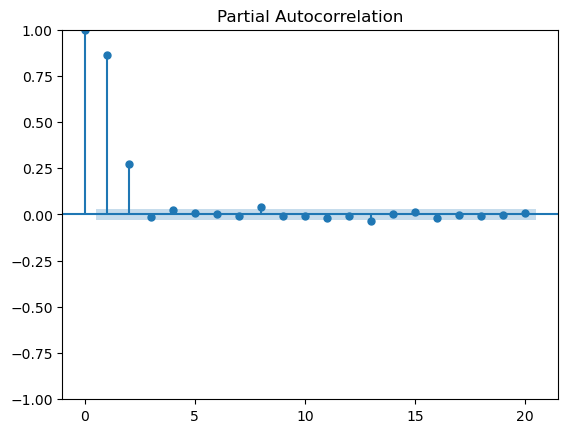

In [142]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

##### BIC

For an AR(2), the BIC achieves its minimum at p=2, which is what we expect.

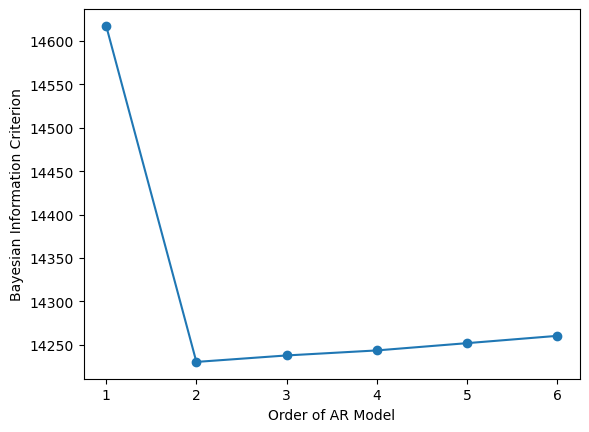

In [143]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

### 2.4 Moving Average (MA) and ARMA Models

#### Describe Model


$R_t = \mu + \epsilon_t + \theta \epsilon_{t-1}$ ,  where:
* $R_t = $ Today's value 
* $\epsilon_t = $ White Noise
* $\theta = $ A fraction

This is an MA(1), model of order 1, because there is just one lagged value of noise (error).

* MA parameter is $\theta$
* Stationary for all values of $\theta$

Interpretation:
* Negative $\theta$: One-Period Mean Reversion
* Positive $\theta$: One-Period Momentum
* Note: One-period autocorrelation is $\dfrac{\theta}{1+\theta^2}$

The **bid/ask bounce** induces a negative lag-1 autocorrelation, but no autocorrelation beyond.

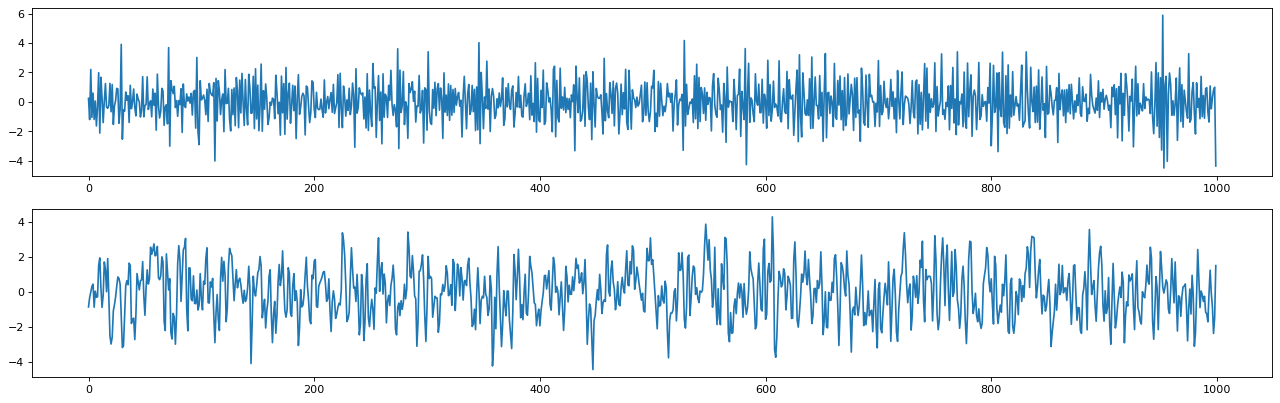

In [156]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

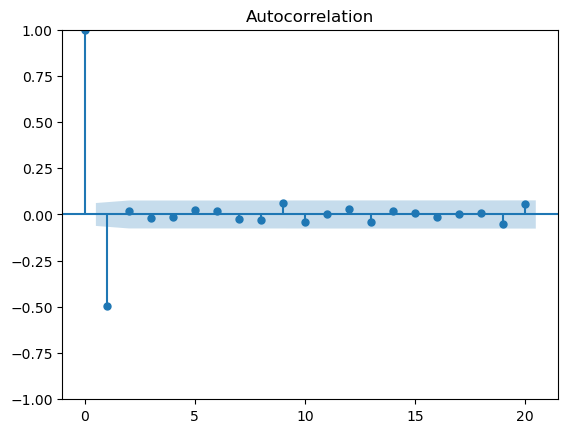

In [157]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()


#### Estimation and Forecasting an MA Model


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

mod = ARIMA(simulated_data, order=(0,0,1))
result = mod.fit()

```py 
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
data.plot(ax=ax)
plot_predict(res, start='2012-09-27', end='2012-10-06', ax=ax)
plt.show()
```

In [163]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an MA(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(0,0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1456.673
Date:                Wed, 15 Mar 2023   AIC                           2919.346
Time:                        16:17:00   BIC                           2934.069
Sample:                             0   HQIC                          2924.942
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.004      0.439      0.660      -0.006       0.009
ma.L1         -0.8867      0.015    -58.730      0.000      -0.916      -0.857
sigma2         1.0767      0.048     22.263      0.0


#### ARMA models



ARMA(1,1)
* $R_t = \mu + \phi R_{t-1} + \epsilon _t + \theta  \epsilon _{t-1}$

##### Equivalence of AR(1) and MA(infinity)
To better understand the relationship between MA models and AR models, you will demonstrate that an AR(1) model is equivalent to an MA(
) model with the appropriate parameters.

* Notice that the ACF looks the same as an AR(1) with parameter 0.8.

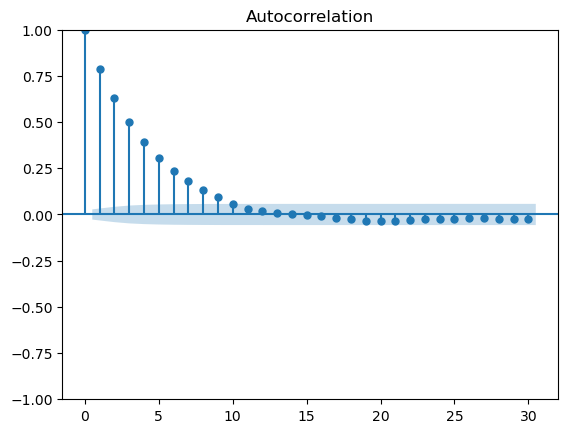

In [165]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

### 2.5 Putting it all together

#### Cointegration

* Two series, $P_t$ and $Q_t$ can be random walks, but the linear combination may no be a random walk.
* If that's true,
    * $P_t - cQ_t$ is forecastable
    *   $P_t$ and $Q_t$ are cointegrated

For example, there are some economic substitutes:
* Heating oil and natural gas (it depends on which one is cheaper, so if the price of one goes down, then it recovers because of the demand)
* Platinum and palladium
* Corn and wheat, etc.

For stocks, a natural starting point for identifying cointegrated pairs are stocks in the same industry. But competitors are not necesarilly cointegrated, for example, Pepsi and Coke (there is more independence in stock prices).

* If one stock's price goes up, the other one catches up.

The process to verify if two series are cointegrated, can be broken down into 2 steps:
1. Regress $P_t$ on $Q_t$ and get slope $c$
2. Run augmented dickey-fuller test on $P_t - cQ_t$ to test for random walk

```py
#Integreates both steps

from statsmodels.tsa.stattools import coint
coint(P,Q)
```

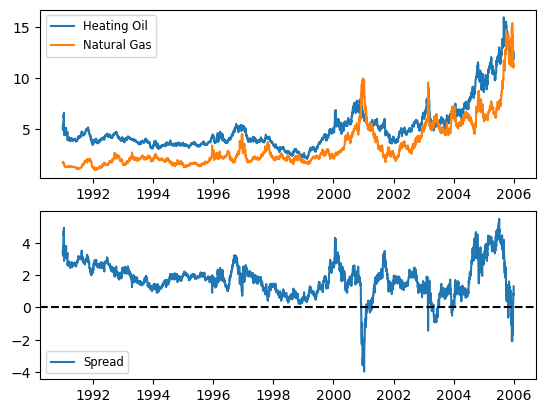

In [177]:
HO = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\data\CME_HO1.csv', parse_dates=['Date'], index_col = 'Date')
HO = HO.iloc[::-1]
NG = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\data\CME_NG1.csv', parse_dates=['Date'], index_col = 'Date')
NG = NG.iloc[::-1]


# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

In [178]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO - NG)
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on HO is  0.9567108785017873
The p-value for the ADF test on NG is  0.9008747444676727
The p-value for the ADF test on the spread is  7.019439302142287e-05


As we expected, we cannot reject the hypothesis that the individual futures are random walks, but we can reject that the spread is a random walk.

Now, you will regress the value of one cryptocurrency, bitcoin (BTC), on another cryptocurrency, ethereum (ETH). If we call the regression coefficient 
, then the cointegration vector is simply 
. Then perform the ADF test on BTC 
 ETH. Bitcoin and Ethereum prices are pre-loaded in DataFrames BTC and ETH.

```py 
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

#OUTPUT
#The p-value for the ADF test is  0.023369002323472707
```

So, data suggests that Bitcoin and Ethereum are cointegrated.

#### Case Study

In [183]:
temp_NY = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\NOAA_TAVG.csv', parse_dates=['DATE'], index_col = 'DATE')

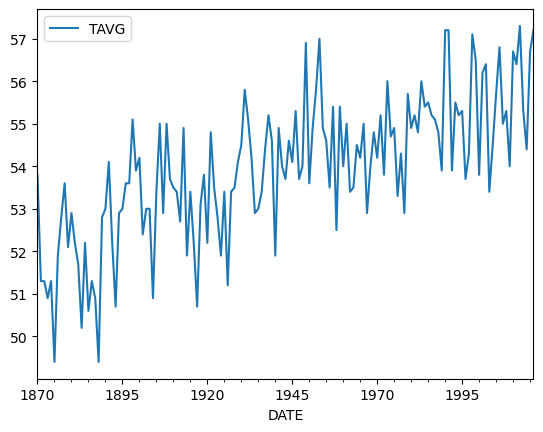

The p-value for the ADF test is  0.5832938987871104


In [184]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

It's a random walk.

Since the temperature series, temp_NY, is a random walk with drift, take first differences to make it stationary. Then compute the sample ACF and PACF. This will provide some guidance on the order of the model.

c:\Users\M0201420\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


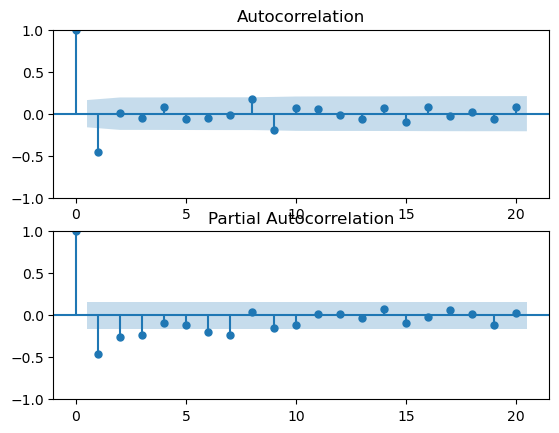

In [188]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

There is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.

So, we will use the lag 1 to fit a model:

In [189]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(chg_temp, order=(1, 0, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(chg_temp, order=(2, 0, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARIMA(chg_temp, order=(1, 0, 1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

c:\Users\M0201420\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


The AIC for an AR(1) is:  510.5346898733107
The AIC for an AR(2) is:  501.9274123409138


c:\Users\M0201420\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\M0201420\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


The AIC for an ARMA(1,1) is:  469.07291850591673


The ARMA(1,1) has the lowest AIC values among the three models.

Finally, you will forecast the temperature over the next 30 years using an ARMA(1,1) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. In this exercise, you will use the ARIMA module on the temperature data (before differencing), which is identical to using the ARMA module on changes in temperature, followed by taking cumulative sums of these changes to get the temperature forecast.

Because temperatures are trending up over time, you will also need to add a trend component when you define the ARIMA model. In the exercise, you'll use a linear trend with time by setting the argument trend='t'. You can also try other trend models to see how the forecasts change. For example, for a quadratic trend 
, set trend=[0,1,1], to include both a linear term, 
, and quadratic term, 
, in the model.

c:\Users\M0201420\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


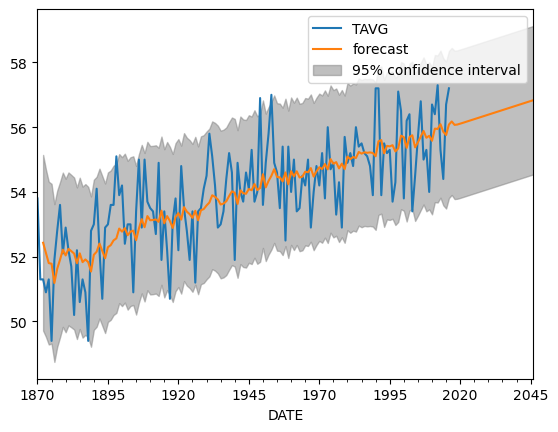

In [191]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, trend='t', order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
fig, ax = plt.subplots()
temp_NY.plot(ax=ax)
plot_predict(res, start='1872', end='2046', ax=ax)
plt.show()

According to the model, the temperature is expected to be about 0.6 degrees higher in 30 years (almost entirely due to the trend), but the 95% confidence interval around that is over 5 degrees.

---

## 3. Visualizing Time Series Data

### 3.1 Line Plots

In [179]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Matplotlib styles
```py 
#Py
plt.style.use('fivethirtyeight')
plt.plot()
plt.show()

#See styles
print(plt.style.available)

#Plot
ax = df.plot(   figsize=(12,5),
                fontsize=12,
                color='blue',
                linewidth=3,
                linestyle='--')
ax,axvilne(x='1999-01-01', color=x, linestyle=x)
ax,axvilne(y=100, color=x, linestyle=x)
#To highlight
ax.axvspan(date_1,date_2, color='red'. alpha=0.5)
ax.axhspan(val_1, val_2, color='red'. alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.set_title('Title')
plt.show()
```

### 3.2 Summary Statistics and Diagnostics


To fill missing values in time series:

```py 
#Py
df.fillna(method='bfill')
```

##### Moving Average

Can be used to:
* Smoothing out short-term fluctuations
* Removing outliers
* Highlighing long-term trends o cycles

In [202]:

co2 = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\Visualizing\ch2_co2_levels.csv', parse_dates=['datestamp'], index_col = 'datestamp')
co2.head()
#weekly

co2
datestamp        
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4

<AxesSubplot:xlabel='datestamp'>

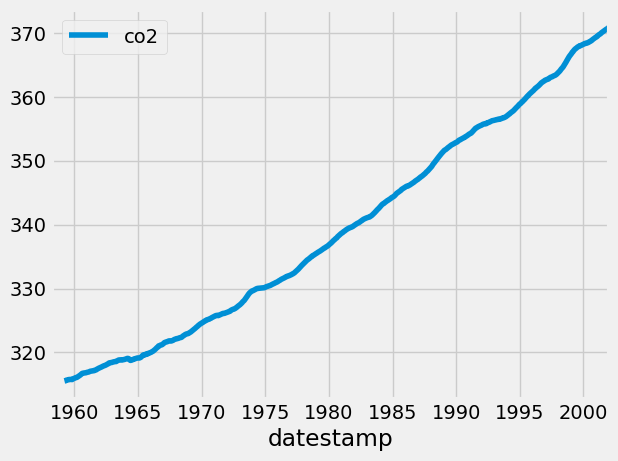

In [200]:
co2.fillna(method='ffill').rolling(52).mean().plot()

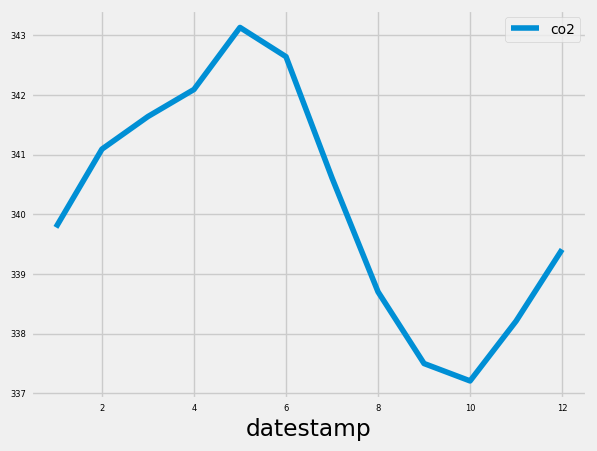

In [209]:
# Get month for each dates in the index of co2_levels
index_month = co2.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=6)

plt.legend(fontsize=10)
plt.show()

### 3.3 Seasonality, Trend and Noise

#### Autocorrelation and Partial autocorrelation

In [228]:
co2 = co2.fillna(method='ffill')

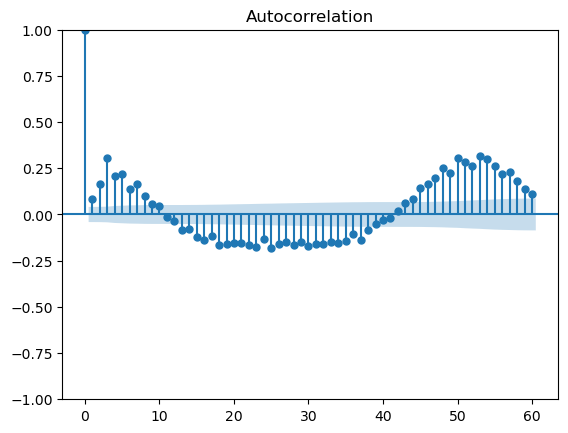

In [250]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(co2.diff().dropna(), lags=60)
plt.show()

c:\Users\M0201420\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


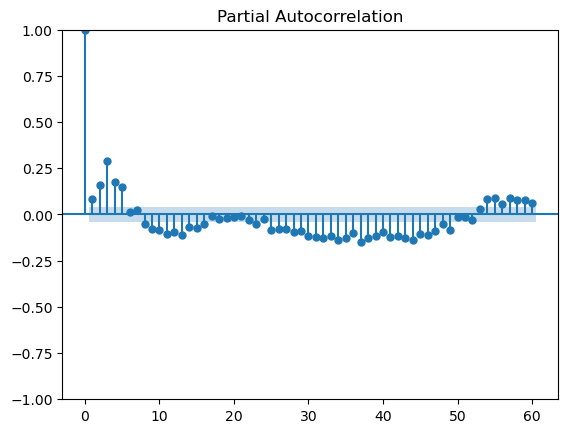

In [251]:
plot_pacf(co2.diff().dropna(), lags=60)
plt.show()

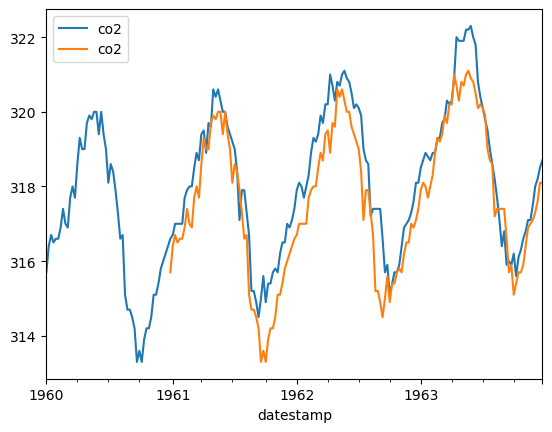

In [263]:
ax = co2['1960':'1963'].plot()
co2['1960':'1963'].shift(52).dropna().plot(ax=ax)
plt.show()

#### Seasonality, trend and noise in time series data

There are three main components:
* Seasonality
* Trend
* Noise

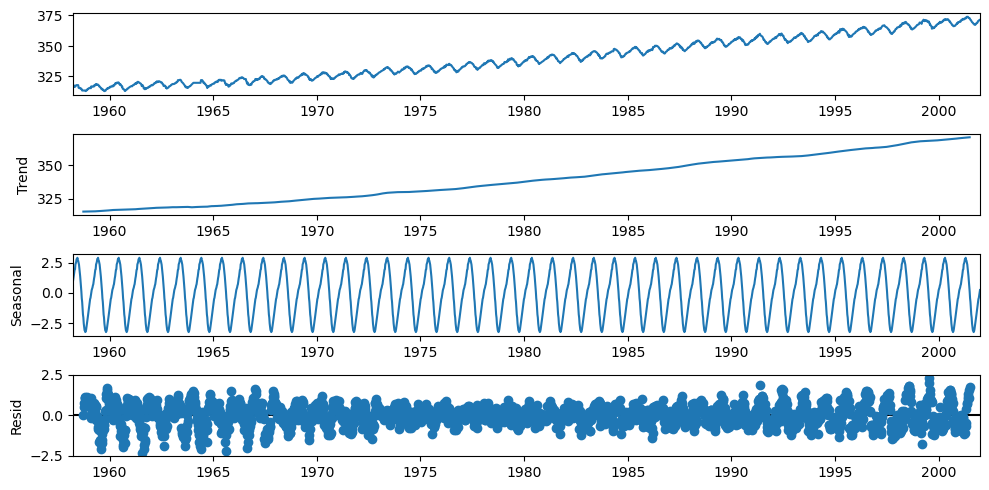

In [302]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 10,5
decomposition = sm.tsa.seasonal_decompose(co2)
decomposition.plot()
plt.show()

In [369]:
first_index_not_null = decomposition.trend[decomposition.trend.notnull()].index[0]

print(co2.loc[first_index_not_null])

print( \
decomposition.trend.loc[first_index_not_null] + \
decomposition.seasonal.loc[first_index_not_null] + \
decomposition.resid.loc[first_index_not_null])


co2    313.5
Name: 1958-09-27 00:00:00, dtype: float64
313.5


#### Review

In [365]:
airline = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\Visualizing\ch3_airline_passengers.csv', parse_dates=['Month'], index_col = 'Month')
airline.head()

AirPassengers
Month                    
1949-01-01            112
1949-02-01            118
1949-03-01            132
1949-04-01            129
1949-05-01            121

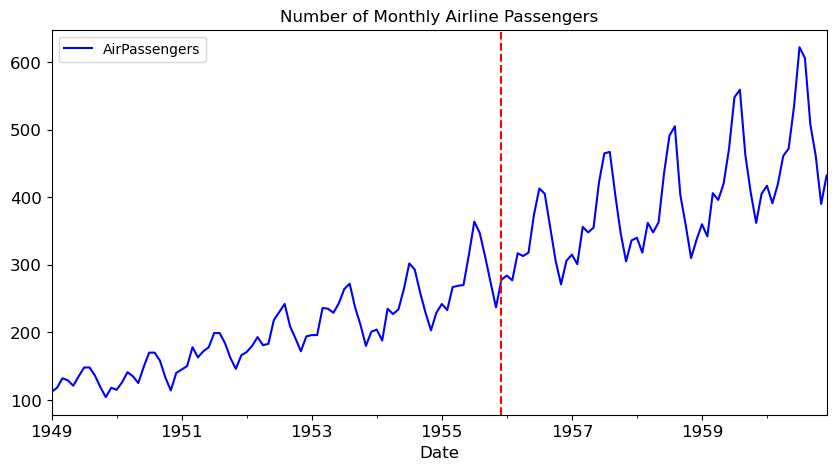

In [366]:
# Plot the time series in your DataFrame
ax = airline.plot(color='blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

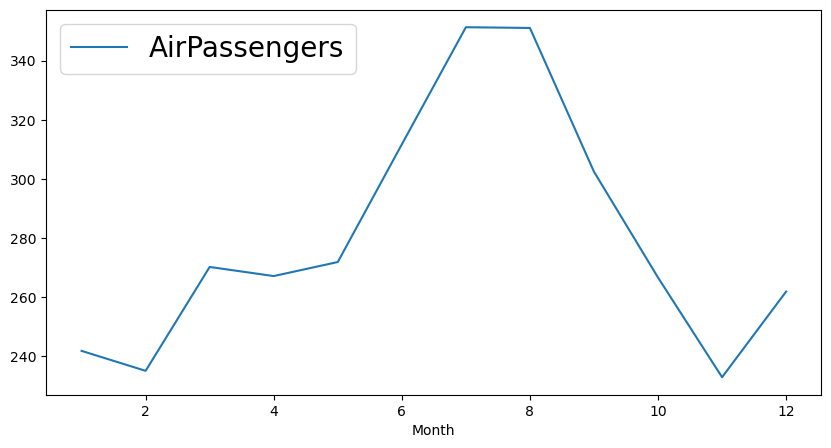

In [368]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

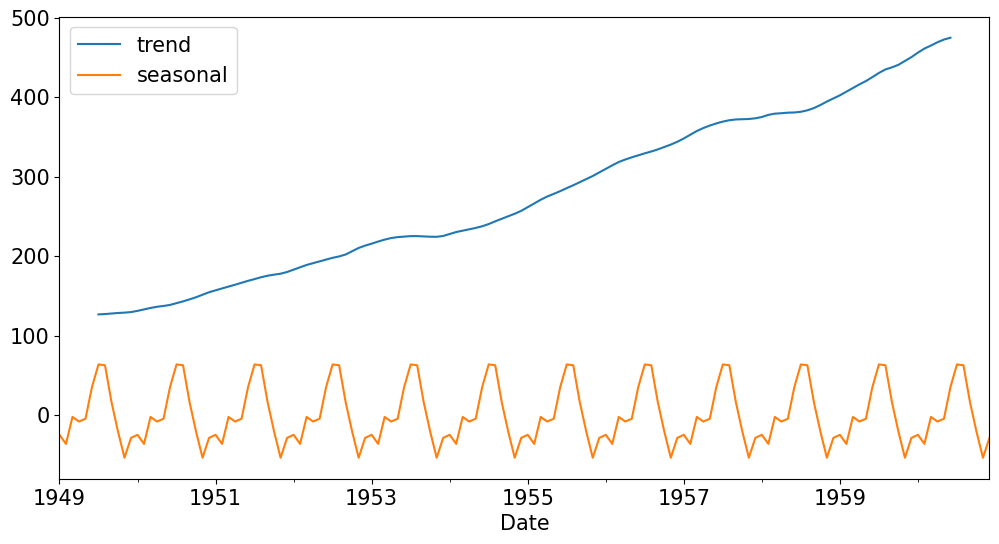

In [423]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

decomposition_df = (decomposition.trend).to_frame().join(decomposition.seasonal)

# Plot the values of the airline_decomposed DataFrame
ax = decomposition_df.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()

### 3.4 Work with Multiple Time Series

#### Working with more than one time series

In [3]:
meat = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\Visualizing\ch4_meat.csv', parse_dates=['date'], index_col = 'date')
meat.head(5)


beef   veal    pork  lamb_and_mutton  broilers  other_chicken  \
date                                                                         
1944-01-01  751.0   85.0  1280.0             89.0       NaN            NaN   
1944-02-01  713.0   77.0  1169.0             72.0       NaN            NaN   
1944-03-01  741.0   90.0  1128.0             75.0       NaN            NaN   
1944-04-01  650.0   89.0   978.0             66.0       NaN            NaN   
1944-05-01  681.0  106.0  1029.0             78.0       NaN            NaN   

            turkey  
date                
1944-01-01     NaN  
1944-02-01     NaN  
1944-03-01     NaN  
1944-04-01     NaN  
1944-05-01     NaN

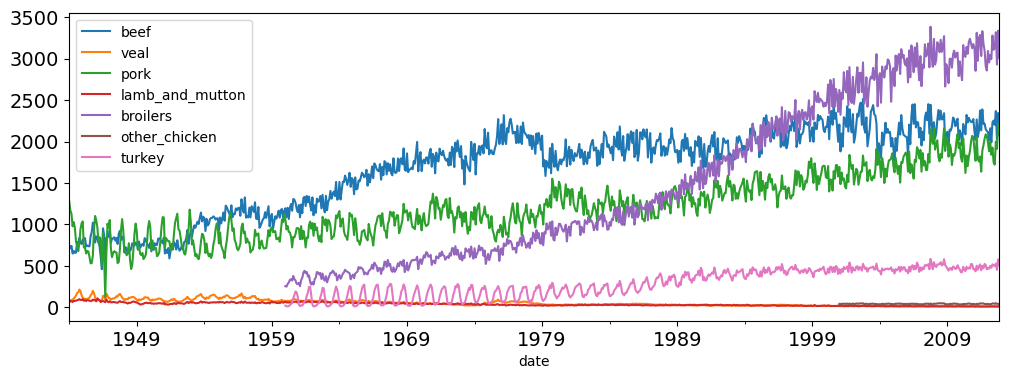

In [8]:
ax = meat.plot(figsize=(12,4), fontsize=14)
plt.show()

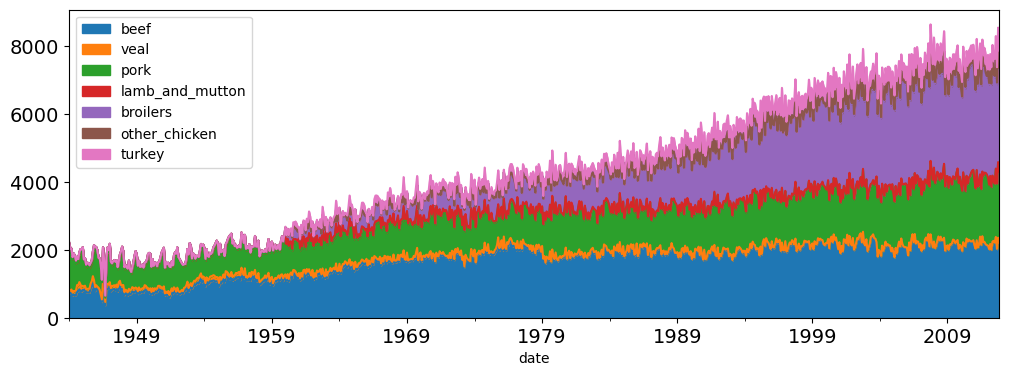

In [9]:
#Cumulative
ax = meat.plot.area(figsize=(12,4), fontsize=14)
plt.show()

#### Plot multiple time series

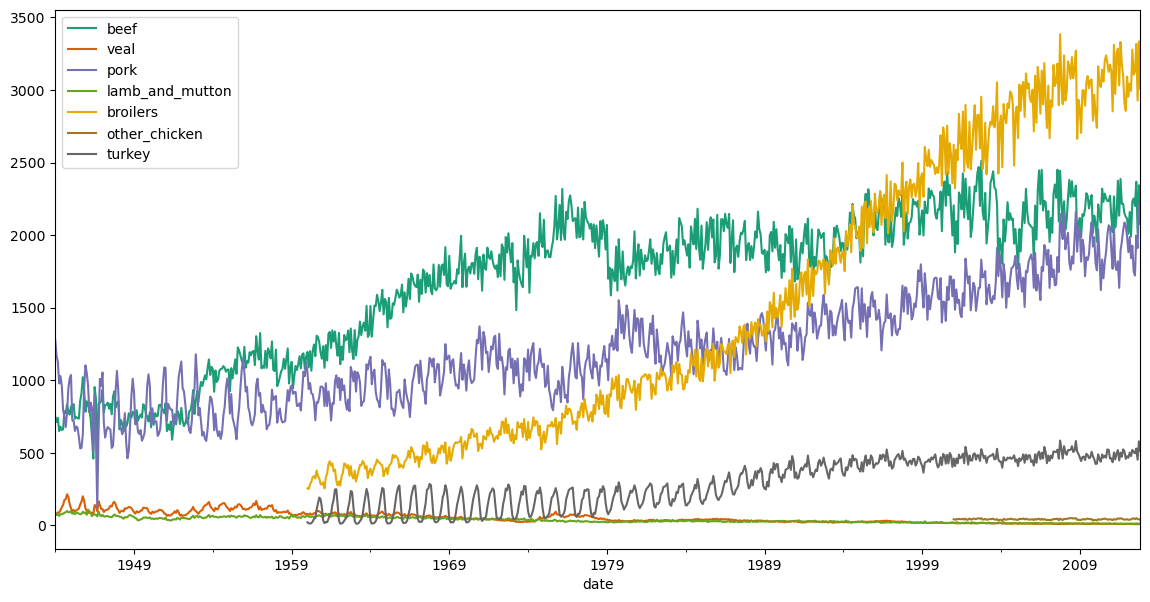

In [10]:
ax = meat.plot(colormap = 'Dark2', figsize=(14,7))
plt.show()

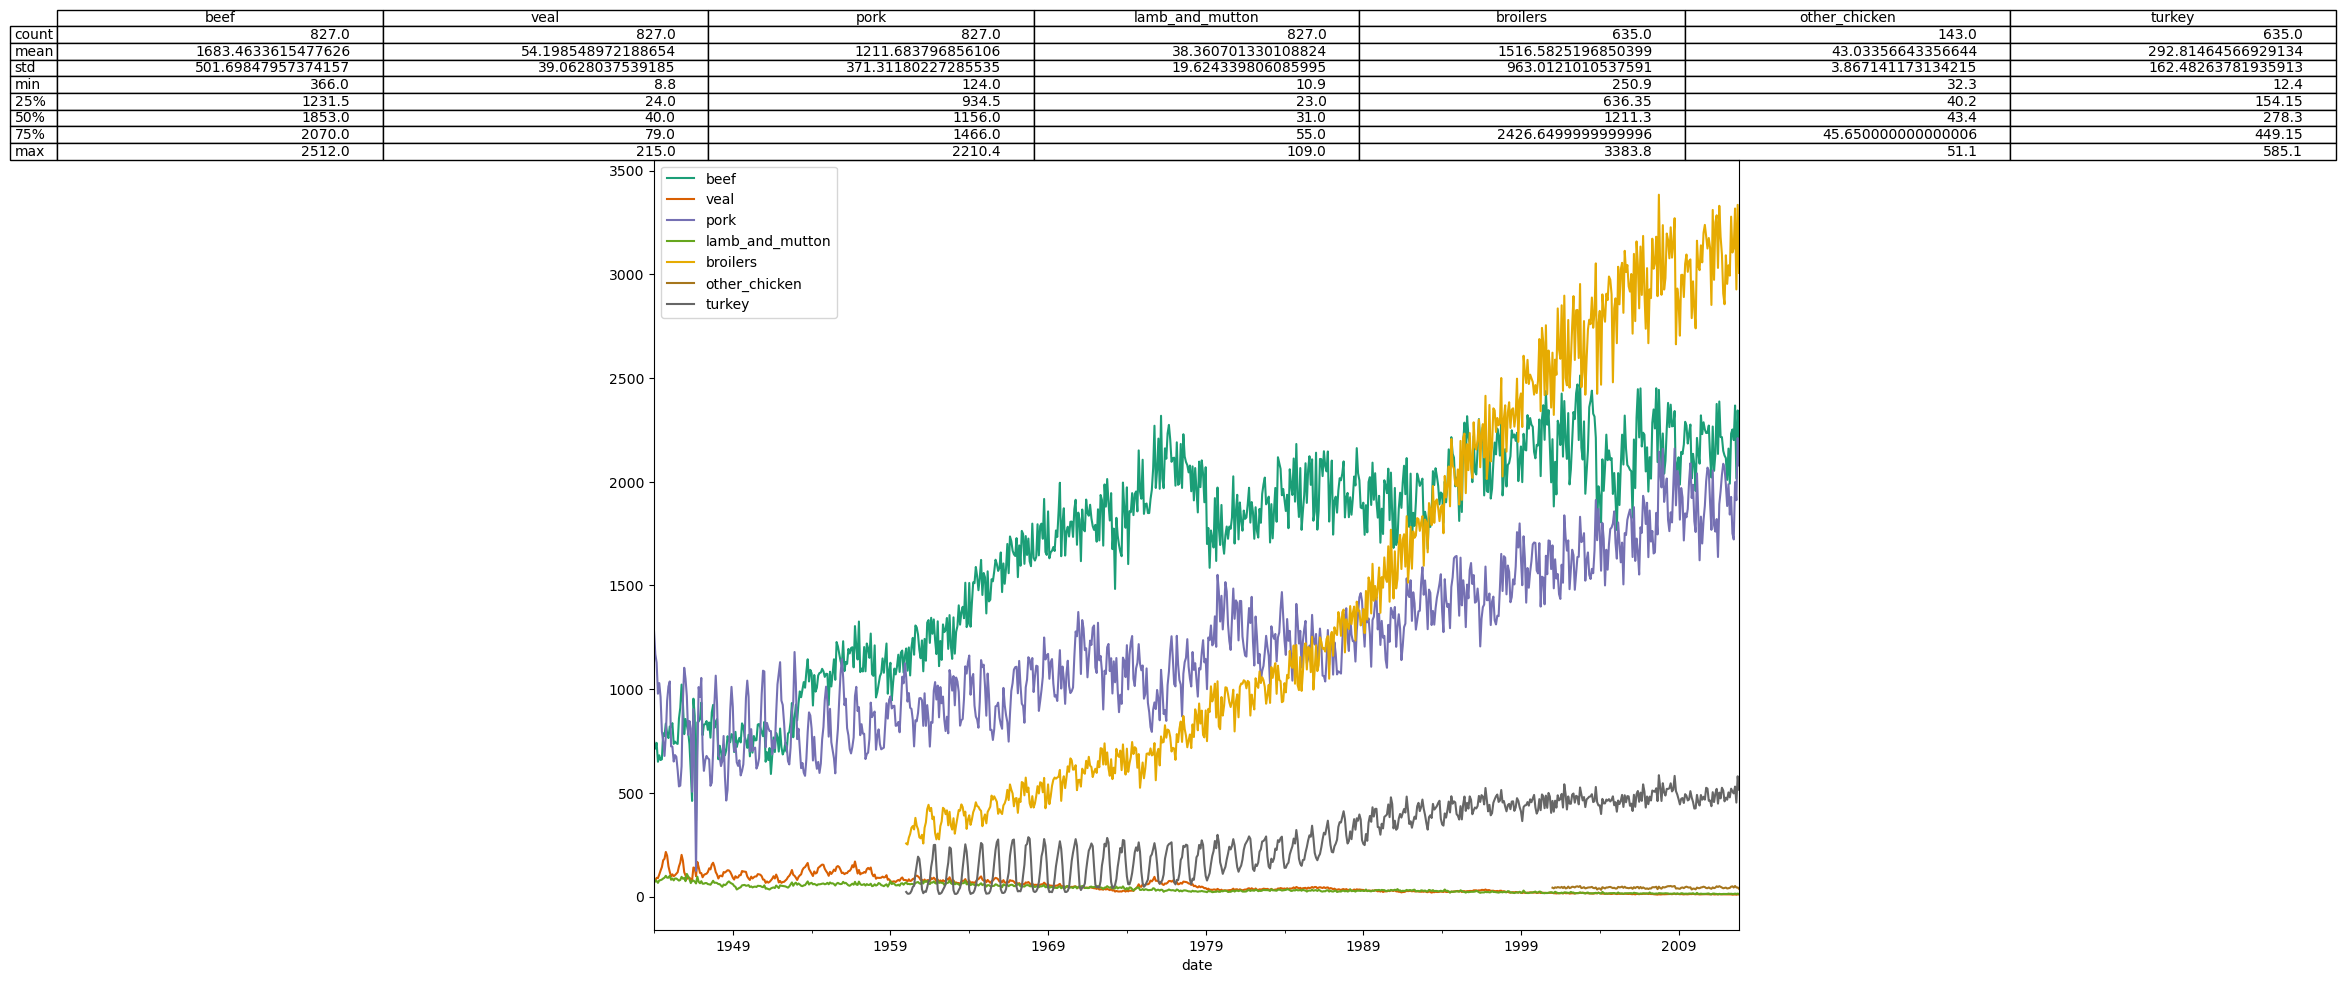

In [17]:
ax = meat.plot(colormap = 'Dark2', figsize=(14,10))
meat_summary = meat.describe()

ax.table(   cellText = meat_summary.values,
            colWidths = [0.3]*len(meat.columns),
            rowLabels = meat_summary.index,
            colLabels = meat_summary.columns,
            loc='top')
plt.show()

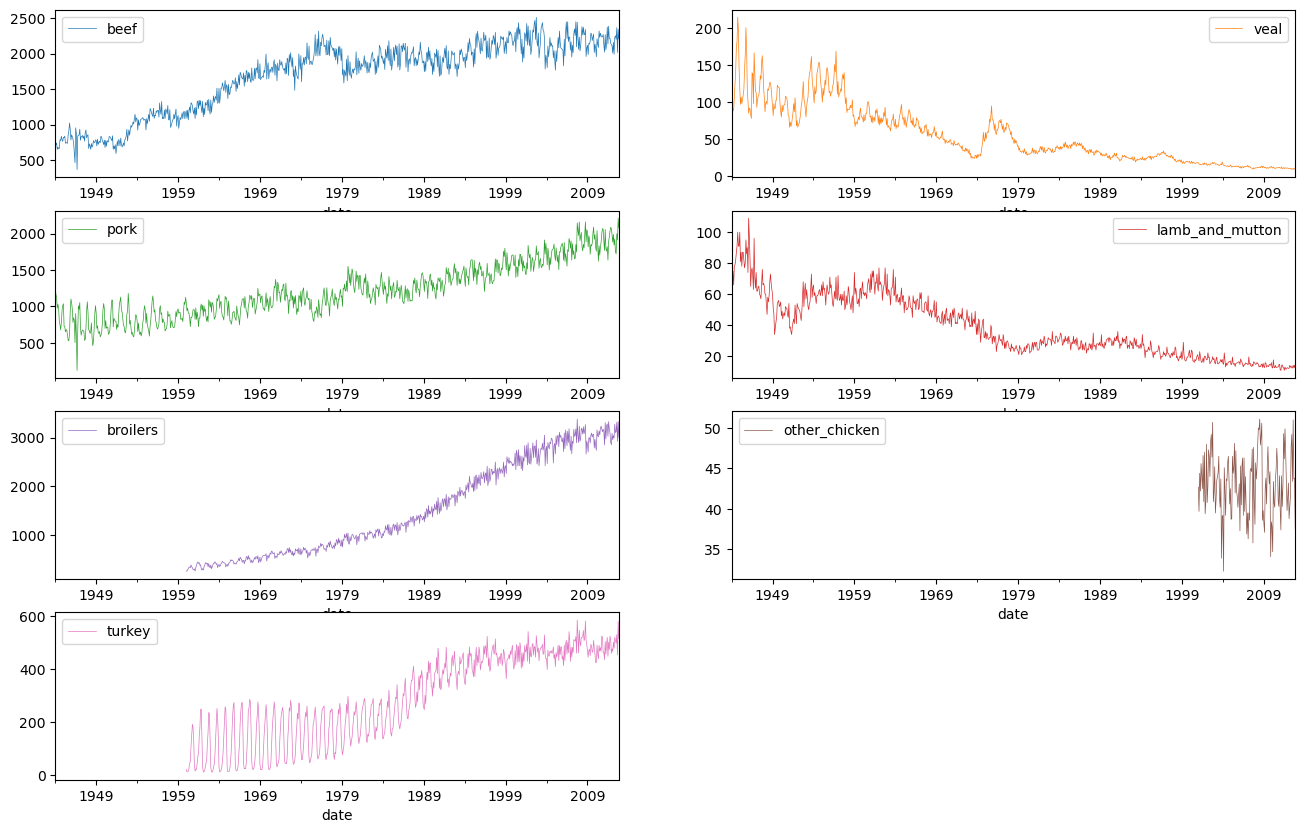

In [23]:
meat.plot(subplots=True,
            linewidth = 0.5,
            layout = (4,2),
            figsize = (16,10),
            sharex = False,
            sharey = False)
                
plt.show()

#### Find relatoionships between time series

* Pearsons: To compute lienar relationships
* Kendall Tau or Spearman: To compute non-linear relationships

PearsonRResult(statistic=0.9843091327750997, pvalue=0.015690867224900318)
SpearmanrResult(correlation=1.0, pvalue=0.0)
KendalltauResult(correlation=1.0, pvalue=0.08333333333333333)


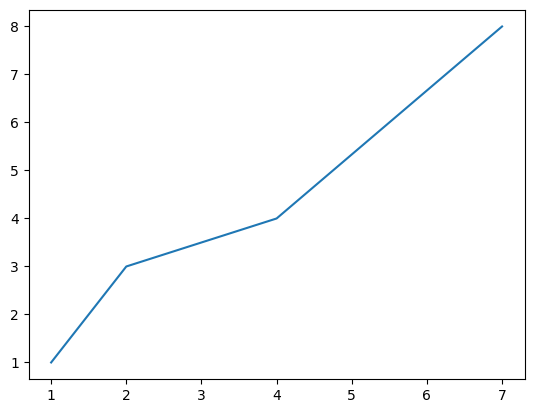

In [32]:
from scipy.stats.stats import pearsonr, spearmanr, kendalltau
import warnings
warnings.filterwarnings('ignore')

x = [1,2,4,7]
y = [1,3,4,8]

print(pearsonr(x,y))
print(spearmanr(x,y))
print(kendalltau(x,y))

plt.plot(x,y)
plt.show()

In [34]:
# Correlation Matrix
meat.corr()

beef      veal      pork  lamb_and_mutton  broilers  \
beef             1.000000 -0.829704  0.787047        -0.830304  0.748713   
veal            -0.829704  1.000000 -0.808834         0.864955 -0.840392   
pork             0.787047 -0.808834  1.000000        -0.776714  0.920331   
lamb_and_mutton -0.830304  0.864955 -0.776714         1.000000 -0.821316   
broilers         0.748713 -0.840392  0.920331        -0.821316  1.000000   
other_chicken    0.721598  0.072718  0.082029         0.103574  0.516931   
turkey           0.738070 -0.768366  0.835215        -0.764231  0.907887   

                 other_chicken    turkey  
beef                  0.721598  0.738070  
veal                  0.072718 -0.768366  
pork                  0.082029  0.835215  
lamb_and_mutton       0.103574 -0.764231  
broilers              0.516931  0.907887  
other_chicken         1.000000  0.567130  
turkey                0.567130  1.000000

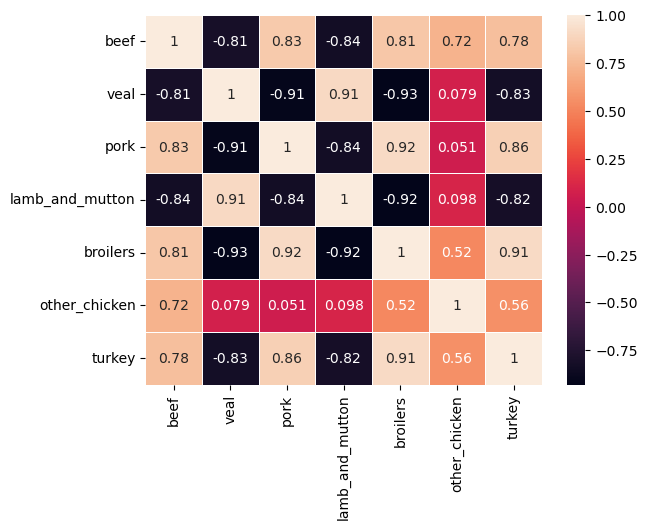

In [43]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

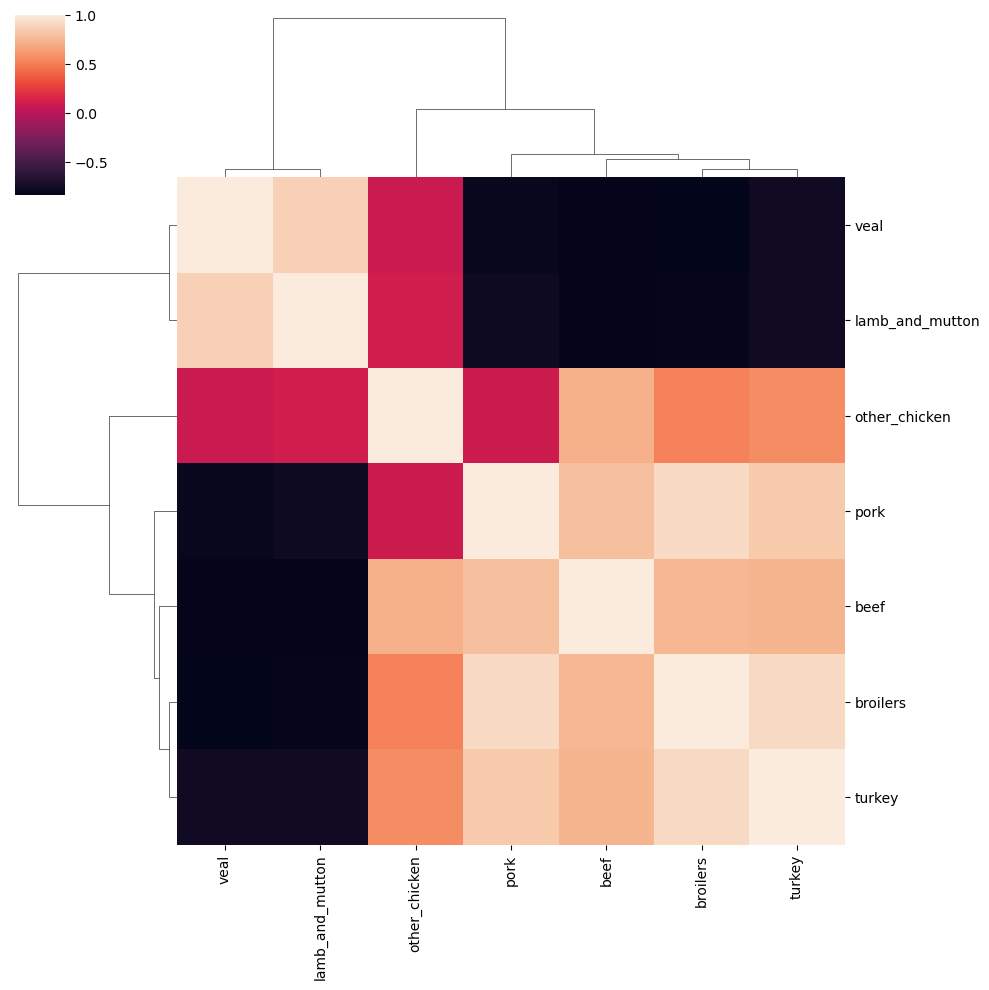

In [44]:
sns.clustermap(meat.corr())

### 3.5 Case Study: Unemployment Rate

#### EDA

In [48]:
jobs = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\Visualizing\ch5_employment.csv', parse_dates=['datestamp'], index_col = 'datestamp')
jobs.head(5)


Agriculture  Business services  Construction  \
datestamp                                                  
2000-01-01         10.3                5.7           9.7   
2000-02-01         11.5                5.2          10.6   
2000-03-01         10.4                5.4           8.7   
2000-04-01          8.9                4.5           5.8   
2000-05-01          5.1                4.7           5.0   

            Durable goods manufacturing  Education and Health  Finance  \
datestamp                                                                
2000-01-01                          3.2                   2.3      2.7   
2000-02-01                          2.9                   2.2      2.8   
2000-03-01                          2.8                   2.5      2.6   
2000-04-01                          3.4                   2.1      2.3   
2000-05-01                          3.4                   2.7      2.2   

            Government  Information  Leisure and hospitality  Manufacturing  \
datestamp                                                                     
2000-01-01         2.1          3.4                      7.5            3.6   
2000-02-01         2.0          2.9                      7.5            3.4   
2000-03-01         1.5          3.6                      7.4            3.6   
2000-04-01         1.3          2.4                      6.1            3.7   
2000-05-01         1.9          3.5                      6.2            3.4   

            Mining and Extraction  Nondurable goods manufacturing  Other  \
datestamp                                                                  
2000-01-01                    3.9                             4.4    4.9   
2000-02-01                    5.5                             4.2    4.1   
2000-03-01                    3.7                             5.1    4.3   
2000-04-01                    4.1                             4.0    4.2   
2000-05-01                    5.3                             3.6    4.5   

            Self-employed  Transportation and Utilities  \
datestamp                                                 
2000-01-01            2.3                           4.3   
2000-02-01            2.5                           4.0   
2000-03-01            2.0                           3.5   
2000-04-01            2.0                           3.4   
2000-05-01            1.9                           3.4   

            Wholesale and Retail Trade  
datestamp                               
2000-01-01                         5.0  
2000-02-01                         5.2  
2000-03-01                         5.1  
2000-04-01                         4.1  
2000-05-01                         4.3

In [52]:
print(jobs.isnull().sum())

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64


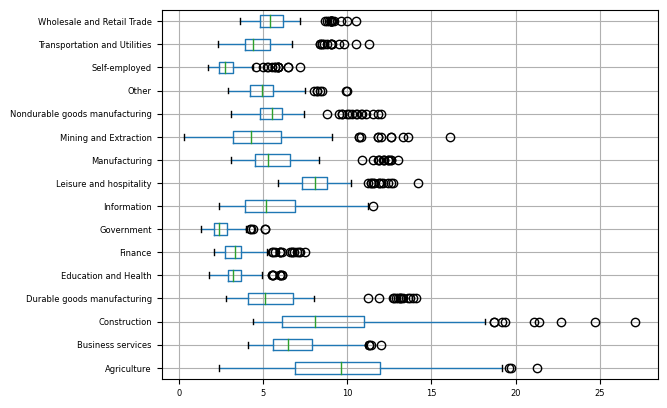

Highest mean:  Agriculture
Highest std:  Construction


In [56]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False)
plt.show()


# Print the name of the time series with the highest mean
print('Highest mean: ',jobs.describe().loc['mean'].sort_values(ascending=False)[[0]].index[0])

# Print the name of the time series with the highest variability
print('Highest std: ',jobs.describe().loc['std'].sort_values(ascending=False)[[0]].index[0])

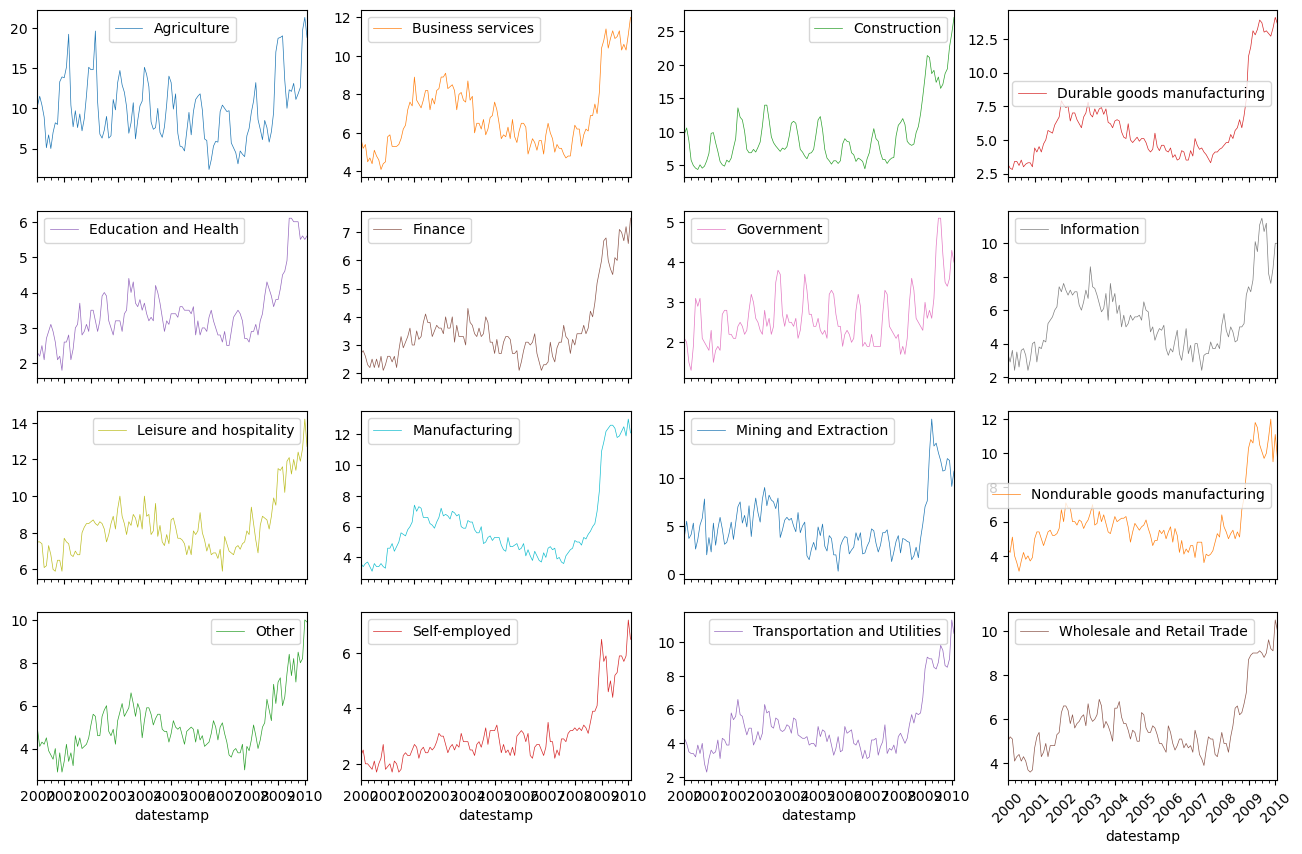

In [67]:
ax = jobs.plot(subplots=True,
            linewidth = 0.5,
            layout = (4,4),
            figsize = (16,10),
            sharex = True,
            sharey = False)

plt.xticks(rotation = 45)           
plt.show()

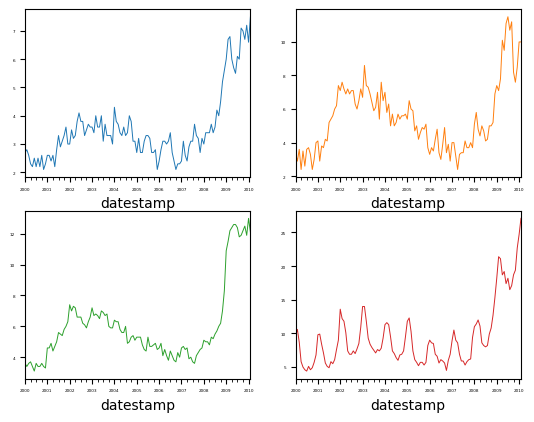

In [69]:
# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2,2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=3,
                      legend=False)

plt.show()

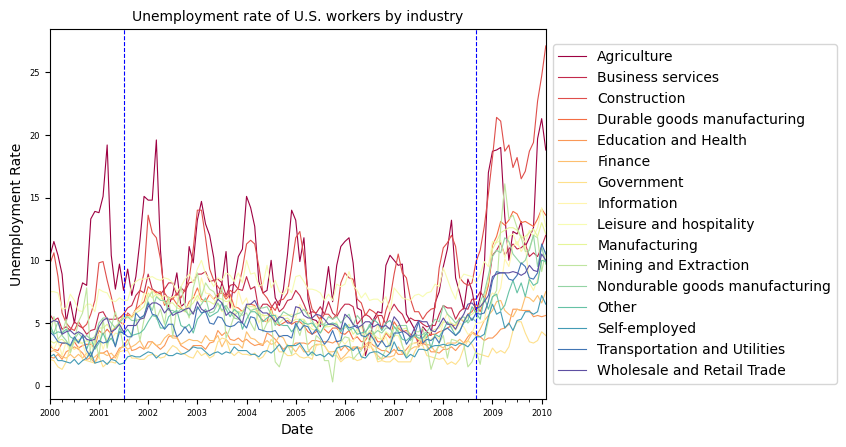

In [70]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap = 'Spectral', fontsize=6, linewidth=0.8)

# Set labels and legend
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Unemployment Rate', fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline(x = '2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline(x = '2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Show plot
plt.show()

Group by month

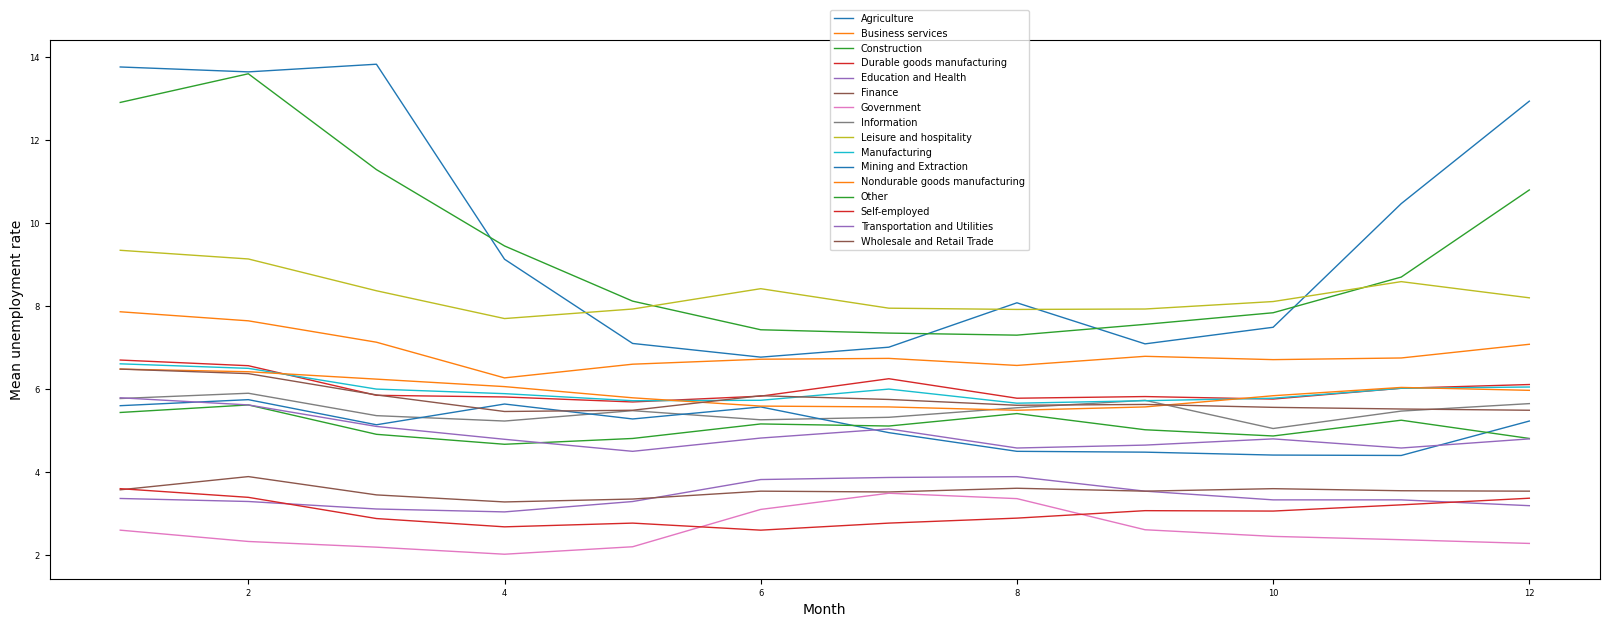

In [85]:
# Extract the month from the index of jobs
index_month = jobs.index.month

# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(figsize = (20,7), fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.5, 0.6), fontsize=7)
plt.show()

Group by year

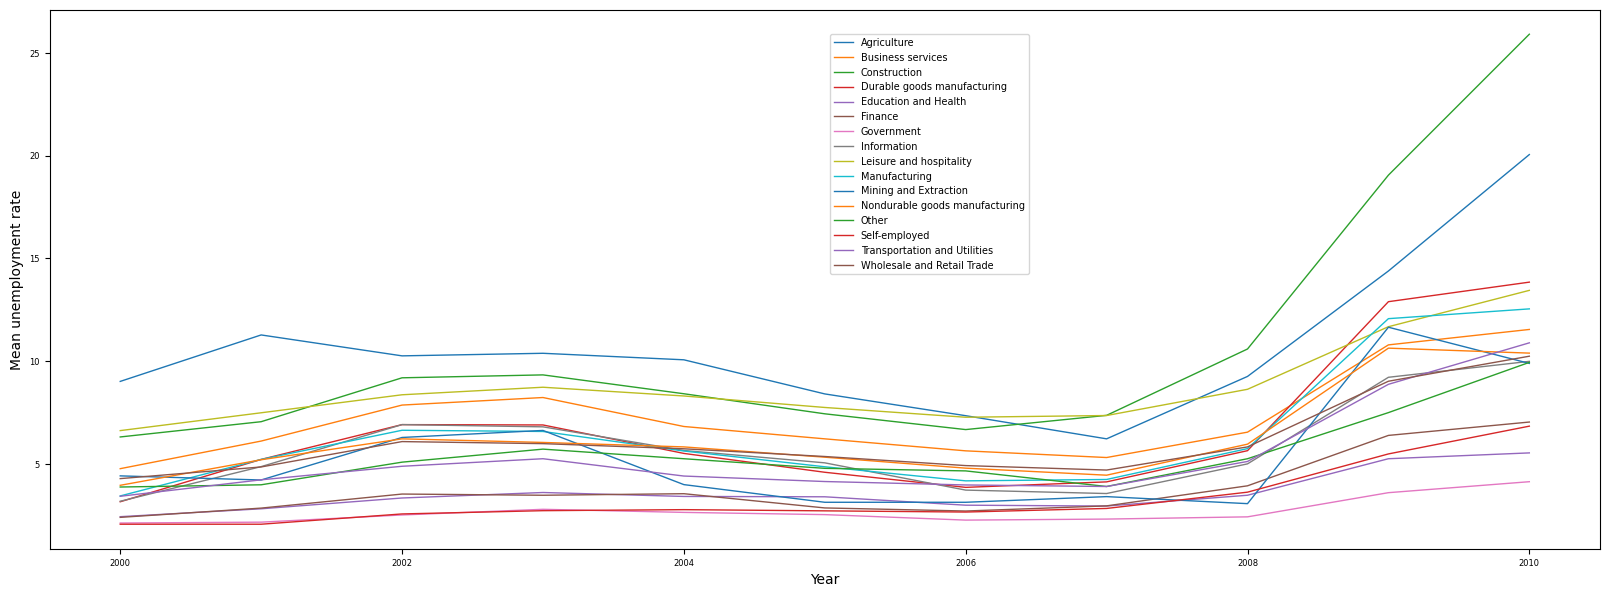

In [88]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = jobs.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(figsize = (20,7), fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.5, 0.5), fontsize=7)
plt.show()

Averaging time series values by month shows that unemployment rate tends to be a lot higher during the winter months for the Agriculture and Construction industry. The increase in unemployment rate after 2008 is very clear when average time series values by year.

Sesonality decomposition

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = statsmodels.tsa.seasonal.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition

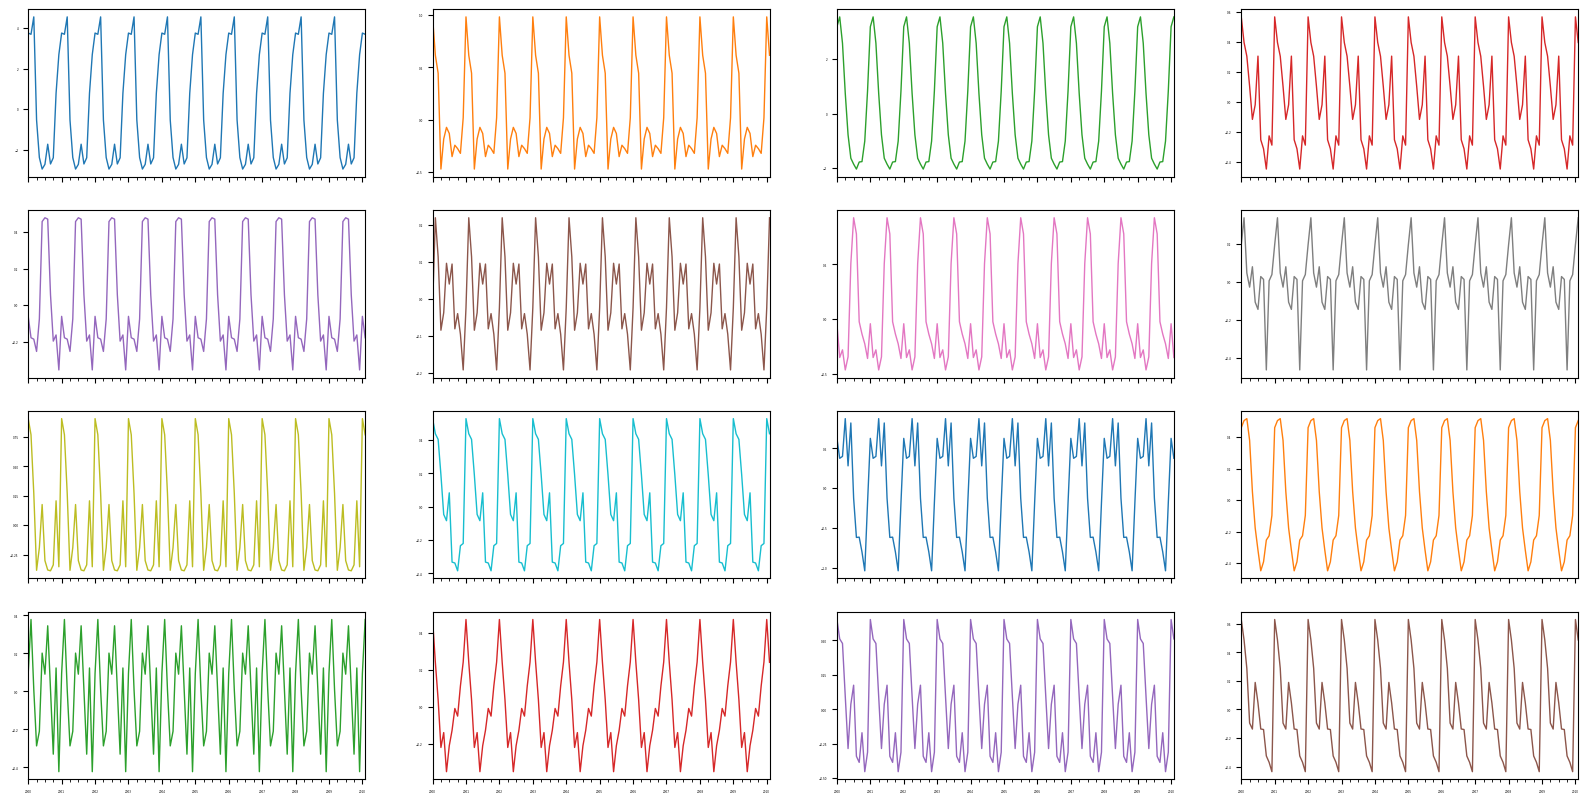

In [114]:
jobs_seasonal = {} 

# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                    figsize = (20,10),
                   layout=(4,4),
                   sharey=False,
                   fontsize=2,
                   linewidth=1,
                   legend=False)

# Show plot
plt.show()

#### Compute correlations

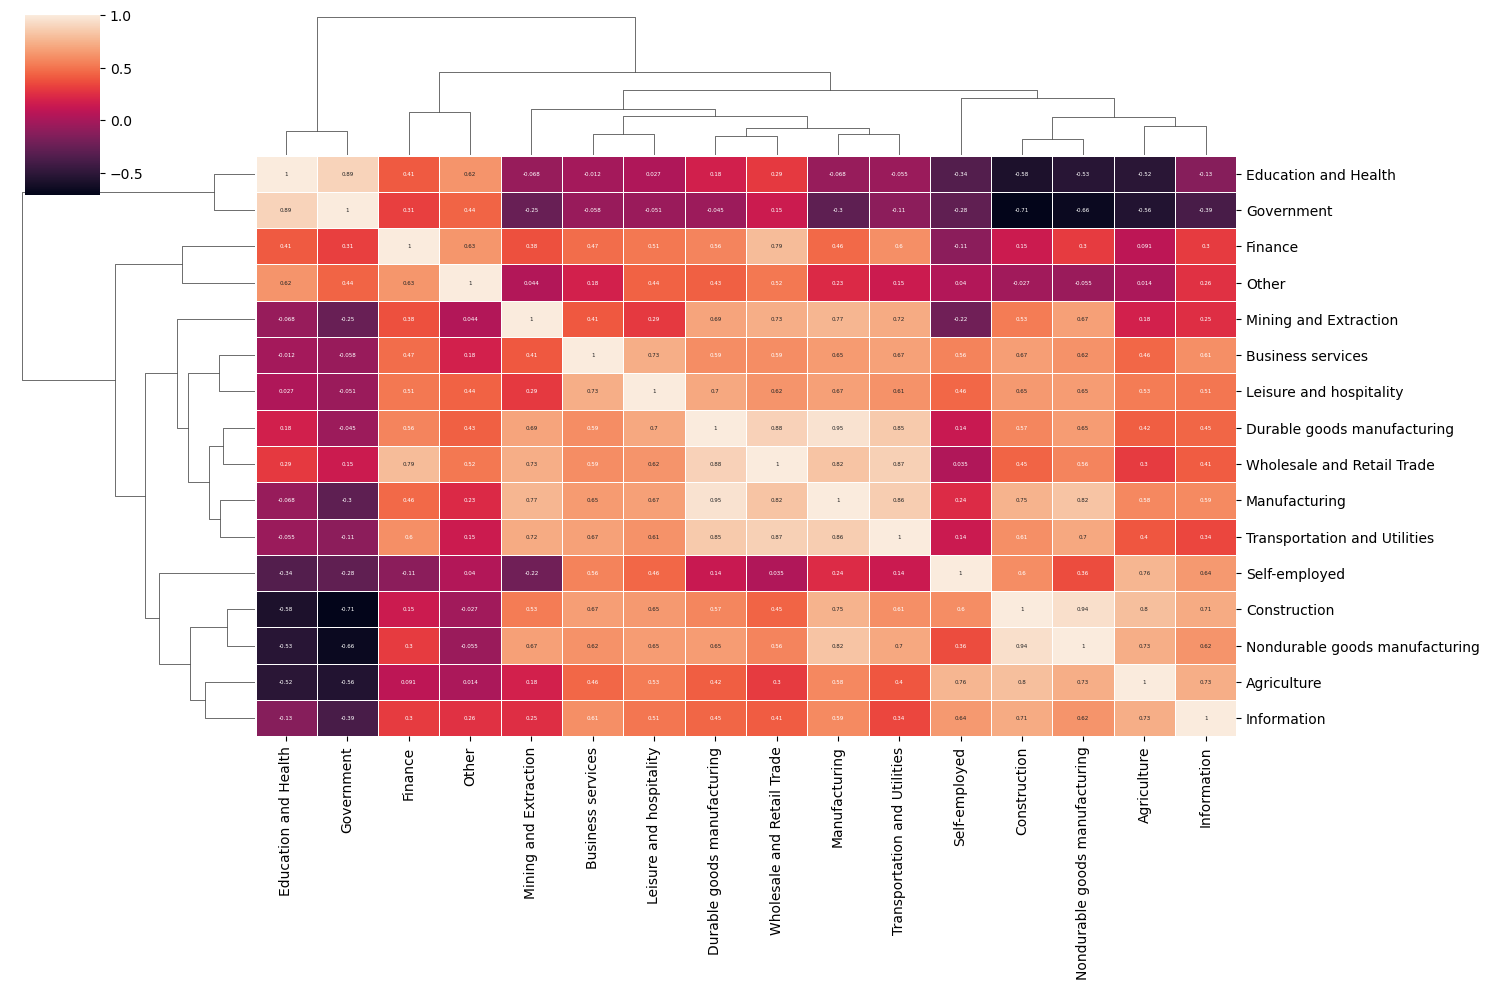

In [119]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

---

## 4. ARIMA Models

It's important to consider that ARMA models should be applied to differences (or transformed time series), while ARIMA, works with the absolute values.

After using the model, the next step is using model diagnostics to confirm the model is behaing well.

### 4.1 ARMA Models

#### Introduction

* Seasonality: Patterns in regular intervals
* Cyclicality: Patterns but not in fixed periods

* White noise: Series where each value in uncorrelated with previous values.

To model a time series, it must be stationary. Stationary means that the distribution of data doesn't change with time. To be stationary, it must:
1. Has zero trend
2. Variance is constant (Avg distance from points to zero line should no be changing across time)
3. Autocorrelation is constant

If it is stationary you can use ARMA models to predict the next values of the time series. If it is non-stationary then you cannot use ARMA models.

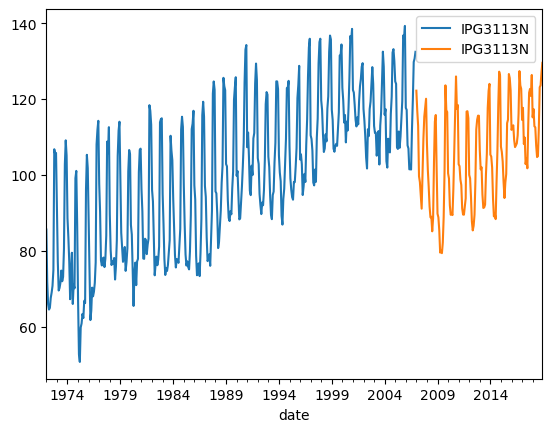

In [2]:
candy = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\ARIMA\candy_production.csv', parse_dates=['date'], index_col = 'date')

# Split the data into a train and test set
candy_train = candy[:'2006']
candy_test = candy['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()


#### Making time series stationary

To make a time series stationary, could be enough to get the differences.

Also:
* np.log(df)
* np.sqrt(df)
* np.shift(1)/df

In [6]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

AMZN = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\data\msft.csv', parse_dates=['Date'], index_col = 'Date')

results = adfuller(AMZN['Adj Close'])
print(results)

(0.18006177841534265, 0.9711208852369689, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, 2279.300324698147)


0-element is the test statistic. The more ngeative this number is, the more likely the data is stationary \
1-element is p-value. If p-value is smaller than 0.05, reject null hypothesis and assume time series must be stationary.

#### Intro to AR, MA and ARMA models

In **AR** models: 

* AR(1) \
$y_t = a_1y_{t-1} + \epsilon_t$ 

* AR(2) \
$y_t = a_1y_{t-1} + a_2y_{t-2 } + \epsilon_t$

In **MA** models:

* MA(1) \
$y_t = m_1\epsilon_{t-1} + \epsilon_t$ 

* MA(2) \
$y_t = m_1\epsilon_{t-1} + m_2\epsilon_{t-2} + \epsilon_t$ 

In **ARMA** models the time series is regressed on the previous values and the prevoius shock terms (noise). 

ARMA = AR + MA

* ARMA(1,1) \
$y_t = a_1y_{t-1} + m_1\epsilon_{t-1} + \epsilon_t$ 


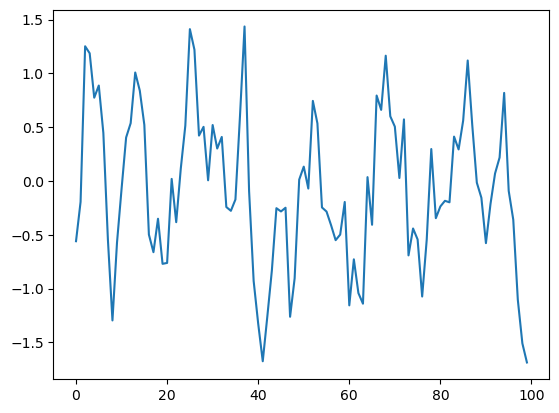

In [14]:
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib.pyplot as plt

ar_coefs = [1, -0.5]
ma_coefs = [1, 0.2]

y = arma_generate_sample(ar_coefs, ma_coefs, 100, scale=0.5)

plt.plot(y)

* Remember that an AR(2) model is just an ARMA(2,0) model. Therefore ar_coefs should have a lag-0, lag-1 and lag-2 coefficient and ma_coefs should only have a lag-0 coefficient and nothing else (e.g. ma_coefs = [1] and ar_coefs = [1, ____]).

* Remember that for lags greater than zero, you need to pass the negative of the desired AR coefficient into the arma_generate_sample() function.

### 4.2 Fitting the Future

####  Fitting time series models

In [16]:
from statsmodels.tsa.arima.model import ARIMA

#This is an ARMA(p,q) model
#model = ARIMA(timeseries, order=(p,0,q))
#results = model.fit()
#results.summary()


There is the ARMAX (Exogenous ARMA), that uses other independent variables as well as time series itself. It's like:

ARMAX = ARMA + Linear Regression

Adding a $X_1Z_t$ term to the ARMA ecuation.

For exampample it could be measuring the daily productivity, it can be an AR model, where your productivity of prevoius days, may affect today's productivity. If you also incude a new variable of hours_sleep, it can be an ARMAX model

```py
#The model would b the same, just adding the exog parameter
model = ARIMA(df['productivity'], order = (2,0,1), exog = df['hours_sleep'])
```

####  Forecasting

To predict in-sample, use the `get_prediction(start=-n)` method.

For predictions of last 25 values, would be:
#get_prediction(start=-25)

```py
#One-step ahead forecast
results = model.fit()
forecast = results.get_predictions(start=-25)

#Forecats mean
mean_forecast = forecast.predicted_mean

#Forecast confidence intervals
confidence_intervals = forecast.conf_int()

#Ploting
plt.plot(   dates,
            mean_forecast.values,
            color='red',
            label='forecast')

#Shade uncertainty area
plt.fill_between(dates, lower_limits, upper_limits, color='pink')

#---
# For dynamic predictions
results = model.fit()
forecast = results.get_prediction(start=-25, dynamic=True)
```

To forecast out-sample, use the `get_forecast(start=n)` method.

```py
forecast = results.get_forecast(steps=25)
```

####  Intro to ARIMA models

When using the ARMA model, we are forecasting the differences, but what we want is the actual value, not the difference. So it's needed to transform again from diff to a cumulative sum.

```py 
#Reconstructing original time series after differencing
diff_forecast = results.get_forecast(steps=10).predicted_mean

#Add the last value of the original time series to this
mean_forecast = np.cumsum(diff_forecast) + df.iloc[-1,0]
```
So, as a recap of an ARMA model: 

1. Take the difference
2. Fit ARMA model
3. Integrate forecast

So, there's a model that performs all of this, which is the **ARIMA** model.

```py 
ARIMA(df, order=(p,d,q))
```
* p - number of autoregressive lags
* d - order of differencing
* q - number of moving average lags

Using this, we pass it in a non-differenced time series and the model order. After we set the difference parameter, we don't need to worry about differencing anymore.

### 4.3 The Best of the Best Models

ACF/PACF and BIC/AIC, can be used to determine the order of the model

#### ACF and PACF

ACF - Correlation between time series, and n-lagged time series \
PACF - Correlation between a time series and the lagged version of itself after substracting effect of correlation at smaller lags.

```py
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,8))

plct_acf(df, lags=10, zero=False, ax=ax1)
plct_pacf(df, lags=10, zero=False, ax=ax2)
```

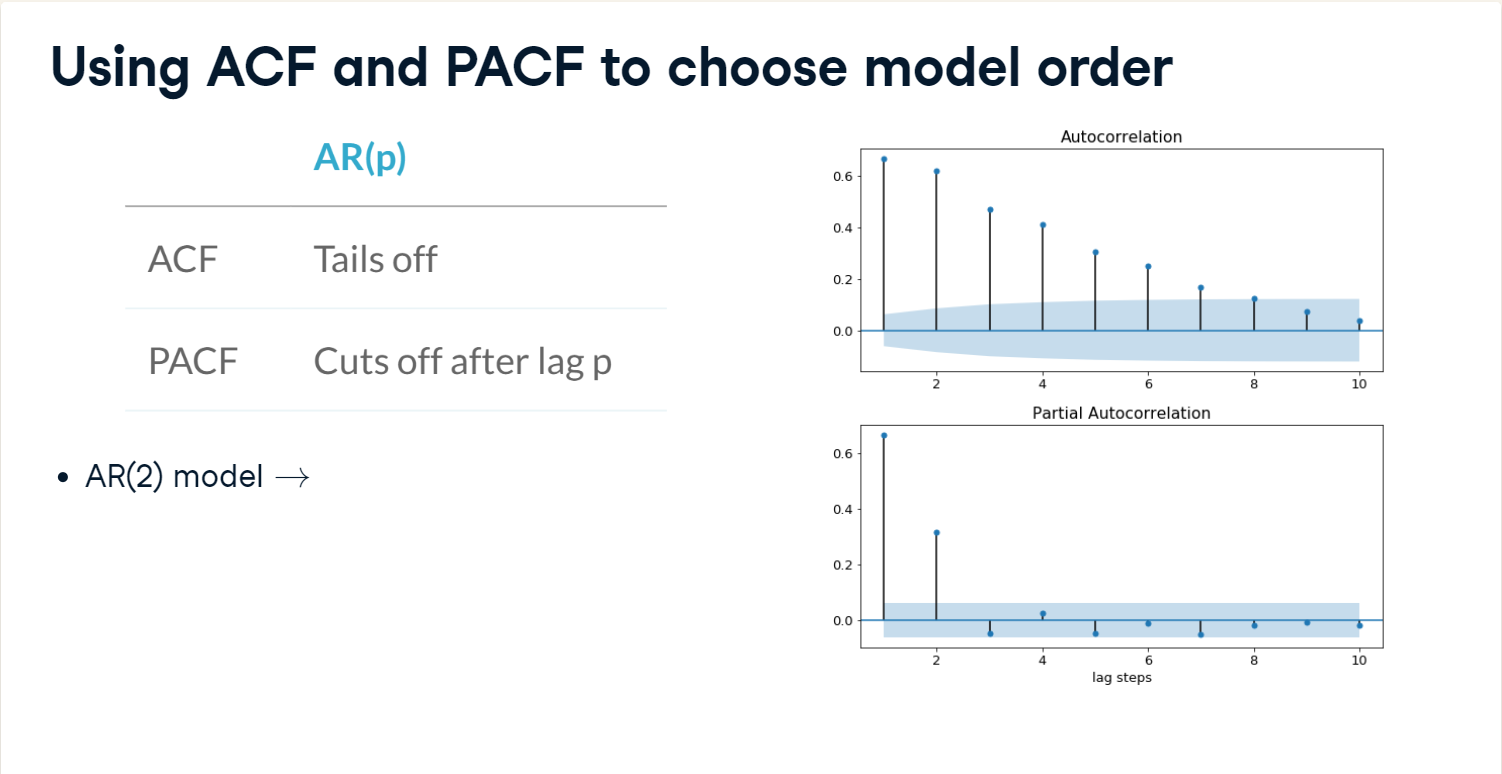

In [24]:
%matplotlib inline
from IPython.display import Image
Image(r'C:\Users\M0201420\Pictures\Delete\3.png')

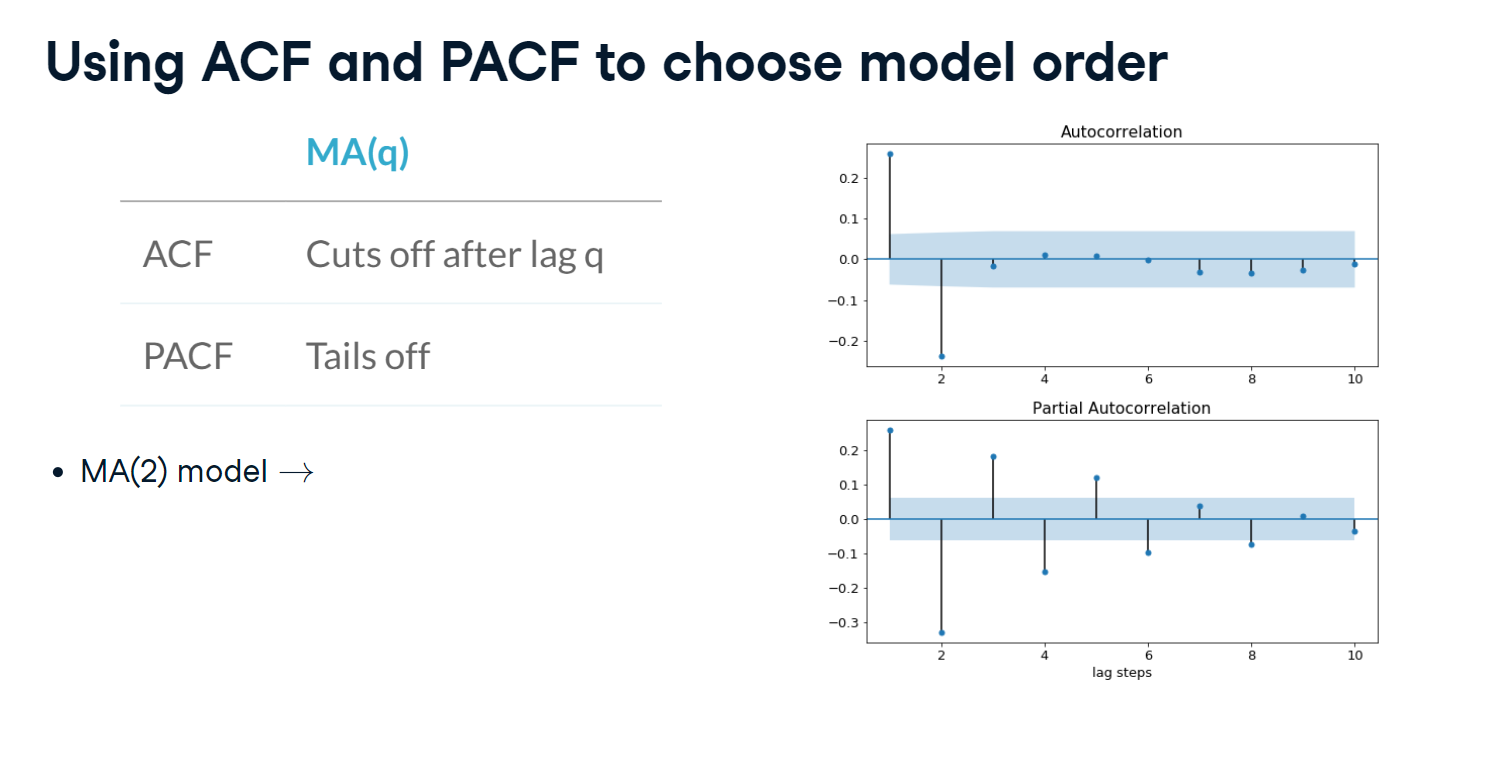

In [25]:
%matplotlib inline
from IPython.display import Image
Image(r'C:\Users\M0201420\Pictures\Delete\4.png')

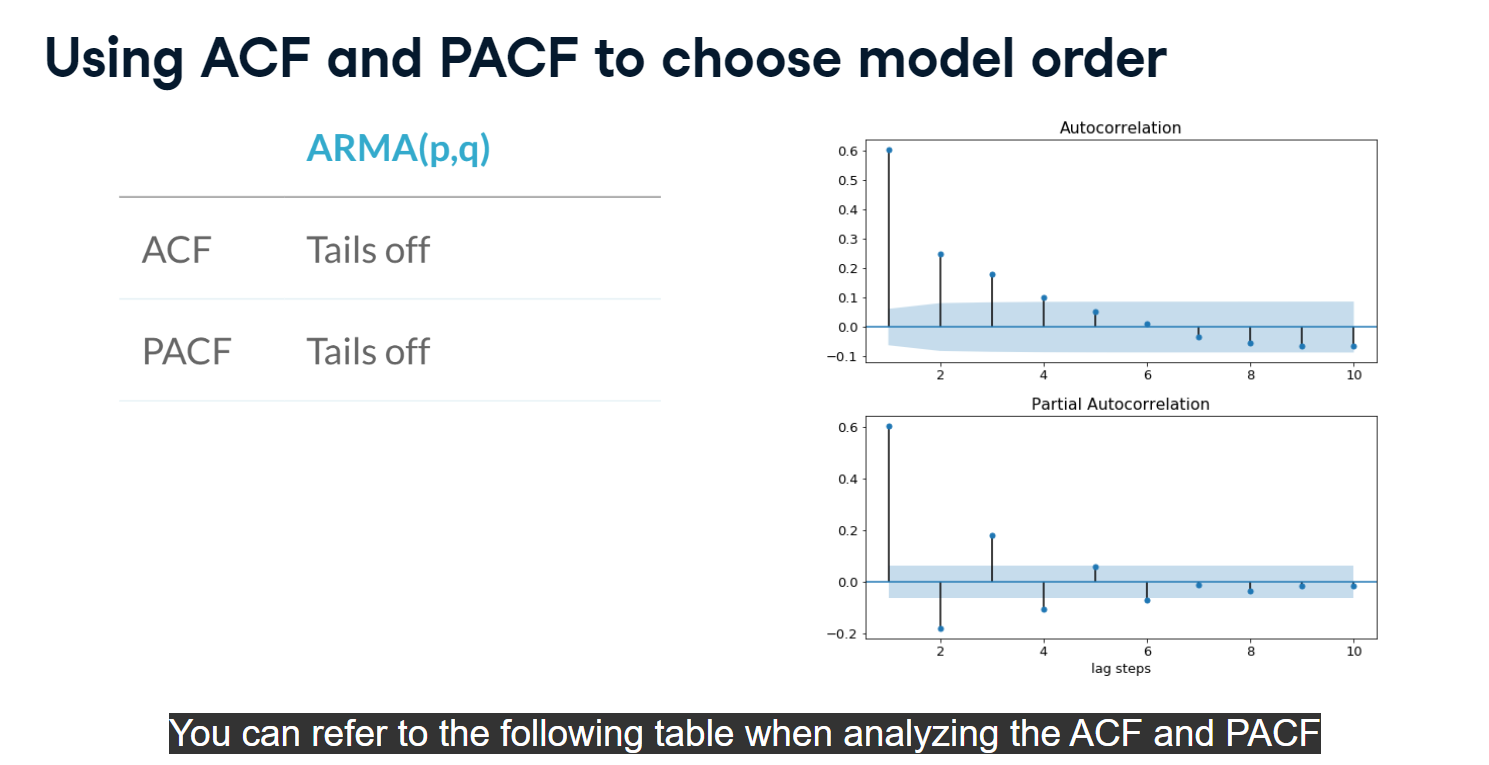

In [26]:
%matplotlib inline
from IPython.display import Image
Image(r'C:\Users\M0201420\Pictures\Delete\5.png')

#### AIC and BIC

* AIC
    * A model with better predictions, has lower AIC score
    * Likes to choose simple models with lower order
    * Penalizes models with lots of parameters
    * Better at choosing predictive models

* BIC
    * A model with better predictions, has lower BIC score
    * Likes to choose simple models with lower order
    * Penalized over complex models
    * Better at choosing explanatory models

```py
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = ARIMA(df, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q, results.aic, results.bic))


# OUTPUT
<script.py> output:
       p  q       AIC       BIC
    7  2  1  1414.249  1431.107
    8  2  2  1416.085  1437.158
    5  1  2  1417.030  1433.888
    6  2  0  1419.109  1431.753
    2  0  2  1425.057  1437.701
    4  1  1  1428.052  1440.696
```

The best model would be **ARMA(2,1)**.

> NOTE: Sometimes there are errors in some combination of order. Then it's recommended to use exceptions.

In [44]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

earthquake = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\ARIMA\earthquakes.csv', parse_dates=['date'], index_col = 'date')
earthquake.head(1)

Year  earthquakes_per_year
date                                  
1900-01-01  1900                  13.0

In [42]:
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = ARIMA(earthquake['earthquakes_per_year'], order=(p,0,q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)     

0 0 676.544359498468 681.7345991987372
0 1 654.8468586200252 662.6322181704289
0 2 651.7332270518972 662.1137064524355
1 0 643.9676770992031 651.7530366496069
1 1 640.4562835911958 650.8367629917341
1 2 642.380867356567 655.35646660724
2 0 642.7338539384863 653.1143333390246
2 1 647.4406640592969 660.4162633099698
2 2 642.4685896289444 658.039308729752


#### Model Diagnostics

After picked the model, we should ask how good it or they are. It's an important step of the model building lifecycle.

* We focus on the residuals of the training data.
```py
# resid attribute
results.resid

# then we calculate the Mean Abosolute Error
mae = np.mean(np.abs(residuals))
```

For an ideal model, the residuals should be uncorrelated with Gaussian noice centered on zero

```py
# Create the 4 diagnostics plots
results.plot_diagnostics()
```

**Important**

* There should be no obvoius pattern in the residuals. 

* The model and normal distribution, should be almost the same in the distribution of residuals (histogram). 
* There should be a normal distribution (straight line) in the normal Q-Q plot. 
* There shouldn't be correlation in the correlogram (ACF plot of residuals), most should be zero. If there's significant correlation in residuals, there are patterns in data that weren't captured by the model.

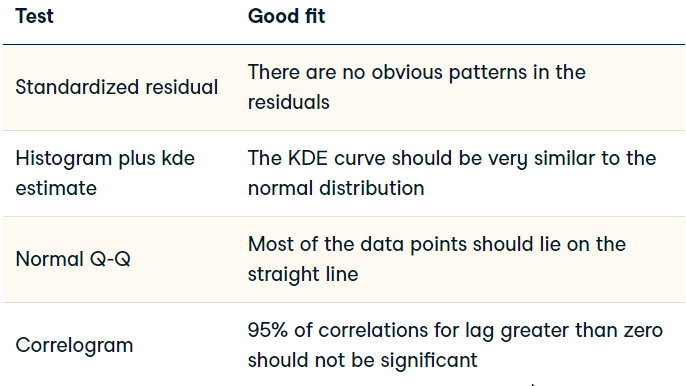

In [47]:
%matplotlib inline
from IPython.display import Image
Image(r'C:\Users\M0201420\Pictures\Delete\6.png')


In results.summary()

* Prob(Q) - p-value for H0 that residuals are uncorrelated
* Prob(JB) - p-value for H0 that residuals are normal

If p-value is less than 0.05, we can reject H0.

##### Example

Prob(Q):  0.04   
Prob(JB):  0.89

So, they are correlated and are normally distributed.

Our model didn't pull out all the correlations in the data. This suggests we could make it better. Perhaps by increasing the model order.

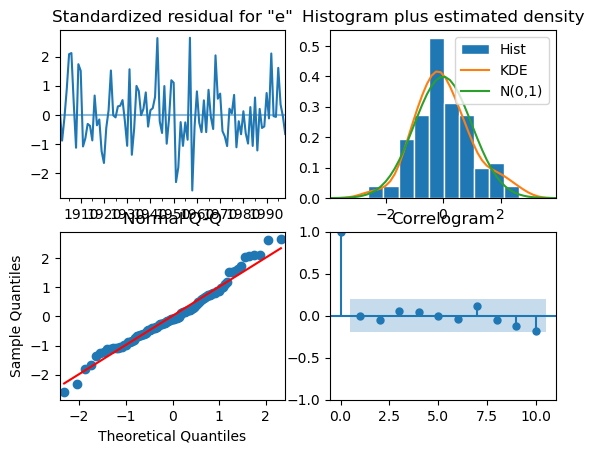

In [46]:
# Create and fit model
model = ARIMA(earthquake['earthquakes_per_year'], order=(1,1,1))
results = model.fit()

# Create the 4 diagnostics plots
results.plot_diagnostics()
plt.show()

#### Box Jenkins method

Is a kind of checklist to go from raw data to model ready for production.

The three main steps, are:

1. Identification
    * Is the time series stationary?
    * What differencing will make it stationary?
    * What transforms will make it stationary?
    * What values of p and q are most promising? 
    * Tools:
        * Plot time series
        * `adfuller()`
        * Transform and/or differencing: `np.diff()`, `np.log()`, `np.sqrt`, to make stationary.
        * Plot ACF/PACF: `plot_acf()`, `plot_pacf()` 

2. Estimation
    * Use data to train the model coefficients
    * `model.fit()`
    * Choose between models using AIC/BIC
        * `results.aic`, `results.bic`


3. Model diagnostic
    * Evaluate the quality of the best fitting model
    * Are the residuals uncorrelated?
    * Are residuals normally distributed?
        * `results.plot_diagnostics()`
        * `results.summary()`

Is it good enough, or we have to go back and re work it
```
time series > |||Identification||| > |||Estimation||| > |||Model Diagnostic||| > Model OK?
     \-----------------------------------<------------------------------------------/
```

If residuals aren't as good enough, go through the steps again and fin a better model.

In [56]:
candy = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\ARIMA\candy_production.csv', parse_dates=['date'], index_col = 'date')
series = candy['IPG3113N'].diff().dropna()


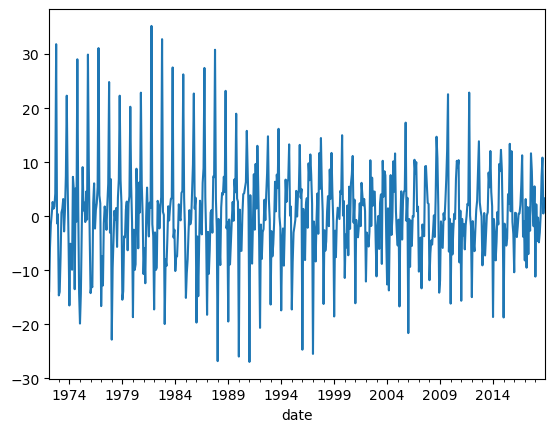

-6.175912489755688
6.63154915933455e-08


In [58]:
# Plot time series
series.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(series)

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

### It's stationary

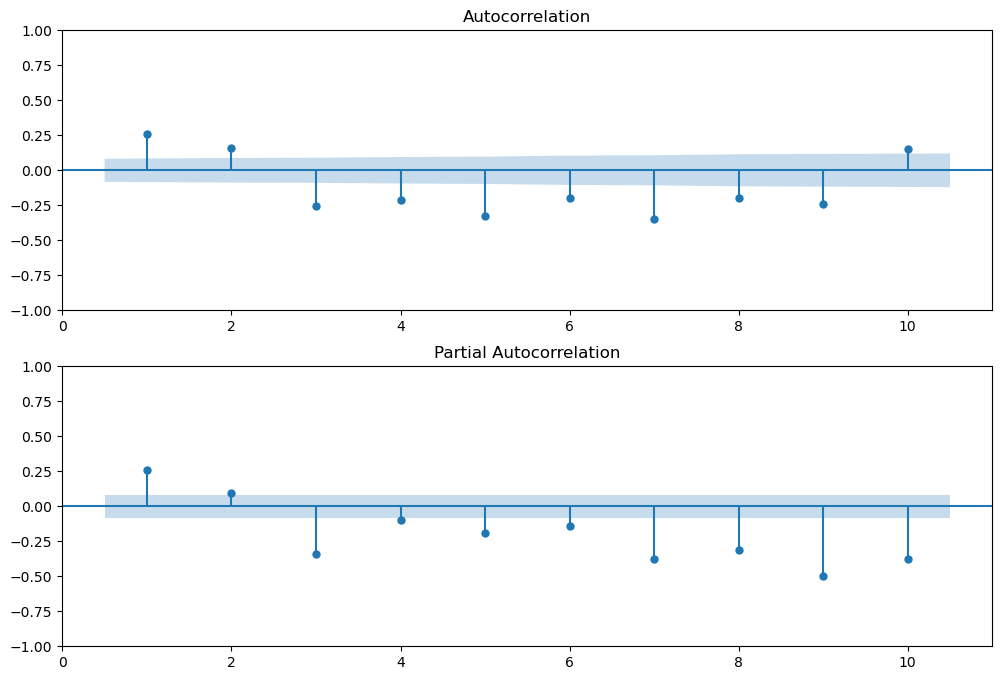

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(series,lags=10, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(series,lags=10, zero=False, ax=ax2)

plt.show()

### 4.4 Seasonal ARIMA Models

#### Seasonal Time Series

Can be at any regular interval time:
* Sunscreen sales in a year
* Number of visitor in a park every week
* Web visitors every day

In [70]:
candy = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\ARIMA\candy_production.csv', parse_dates=['date'], index_col = 'date')
candy.head(5)

IPG3113N
date                 
1972-01-01  85.598809
1972-02-01  71.741404
1972-03-01  65.948809
1972-04-01  64.490724
1972-05-01  64.933842

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

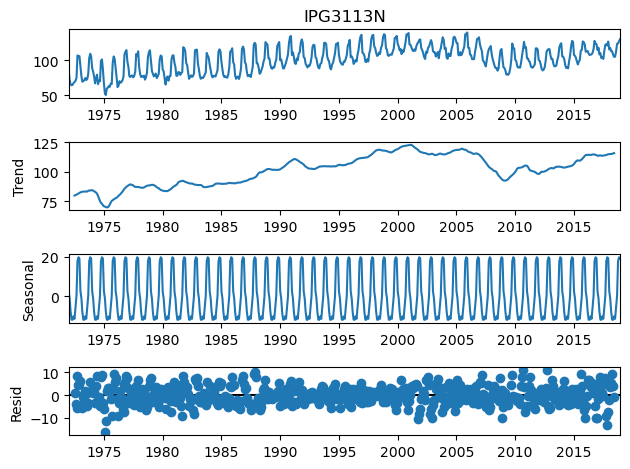

In [71]:
decomp_results = seasonal_decompose(candy['IPG3113N'], period = 12)
decomp_results.plot()
plt.show()

To find the seasonal period, can use ACF, even if it doesn't looks like when plotting the time series.

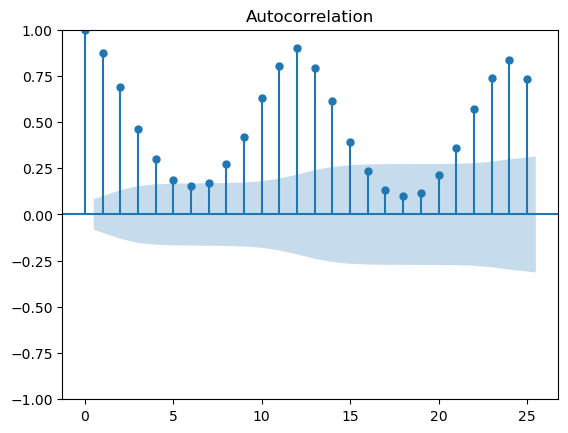

In [175]:
plot_acf(candy['IPG3113N'].dropna(), lags=25)
plt.show()

# In this case, seasonality is 12 (When correlation is higher)

* Detrending time series

Sometime the ACF plot will be clearer if we detrend the time series first

```py
df = df - df.rolling(N).mean()
```

<AxesSubplot:title={'center':'From the decomposed object'}, xlabel='date'>

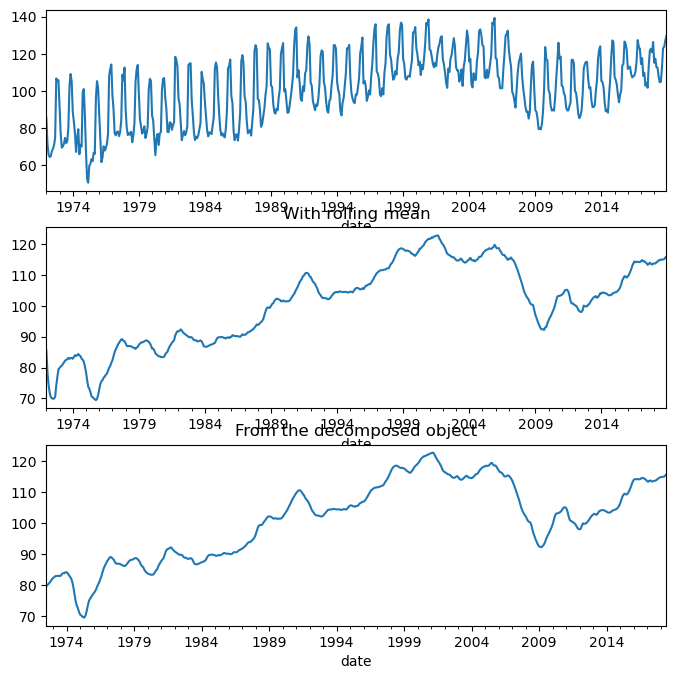

In [119]:
candy_decomposed = candy['IPG3113N'].rolling('360D').mean()

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(8,8))

candy['IPG3113N'].plot(ax=ax1)
candy_decomposed.plot(title='With rolling mean', ax=ax2)
decomp_results.trend.dropna().plot(title='From the decomposed object', ax=ax3)


But this time didn't work

<AxesSubplot:xlabel='date'>

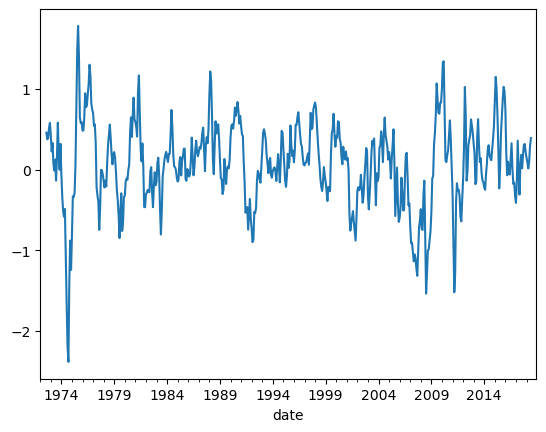

In [147]:
decomp_results.trend.diff().plot()

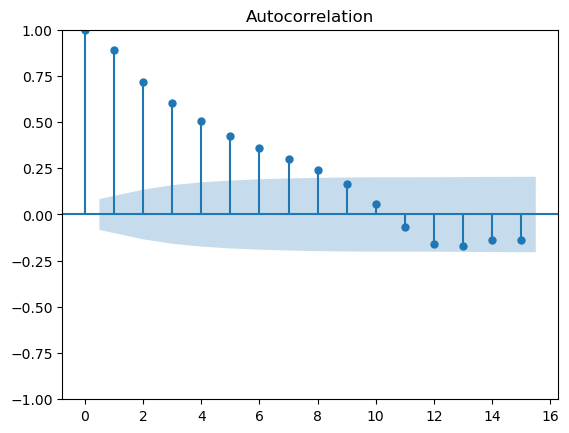

In [154]:
plot_acf(decomp_results.trend.diff().dropna(), lags=15)
plt.show()

In plot diagnostics, since the data is seasonal, there will always be a corrlation in residuals.

<AxesSubplot:xlabel='date'>

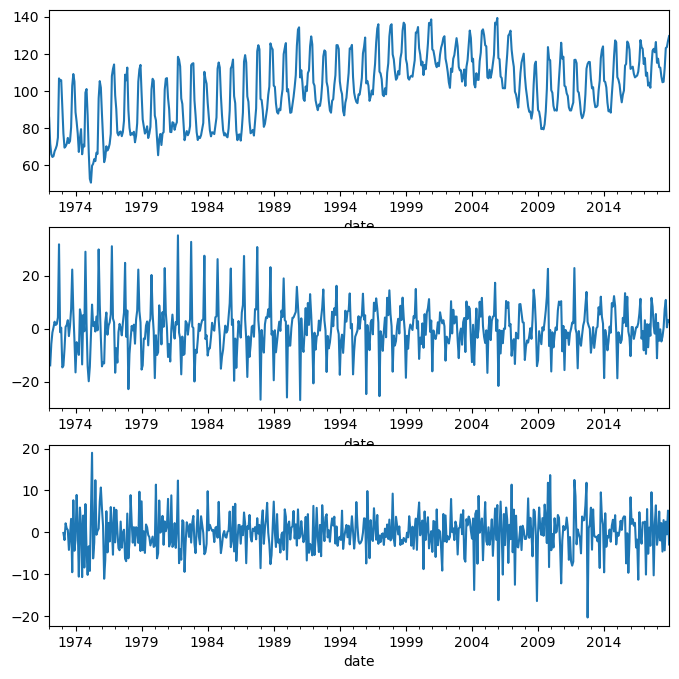

In [145]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(8,8))

candy['IPG3113N'].plot(ax=ax1)
candy['IPG3113N'].diff().plot(ax=ax2)
candy['IPG3113N'].diff().diff(12).plot(ax=ax3)



#### SARIMA Models

Also, Seasonal ARIMA is the choice for seasonal time series. 

It´s like fitting 2 differens ARIMA models at once, one for the seasonal part and one for the non seasonal part

* Non-seasonal orders (found by plotting the differenced TS)
    * p: autoregressive order
    * d: differencing order
    * q: moving average order

* Seasonal orders (found by plotting differences TS at multiple seasonal steps)
    * P: seasonal autoregressive order
    * D: seasonal differencing order
    * Q: seasonal moving average order
    * S: number of time steps per cycle

$SARIMA(0,0,0)(2,0,1)_7$ model: 

* $y_t=a_7y_{t-7}+a_{14}y_{t-14}+m_7\epsilon_{t-7}+\epsilon _t$

This SARIMA model will be able to capture seasonal weekly patterns, but not day-yo-day patterns.

```py
#py
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df, order=(p,d,q), seasonal_order=(P,D,Q,S))
results = model.fit()
```

To get the orders of the seasonal component:

* S, can be found with an ACF of tue abosulte time series.
* May need seasonal differencing. Substracting the value from the last cycle ($\Delta y_t = y_y - y_{t-S}$)
* df_diff = df.diff(S)

Differencing for SARIMA models:

1. Take normal difference
2. If there's a strong seasonal cycle, take the seasonal difference.

Once we have found the two orders of differencing, and made the TS stationary, we need to find the other orders with the ACF and PACF

```py
#Plotting at specific lags
plot_acf(df_diff, lags=[12,24,36,47])
```

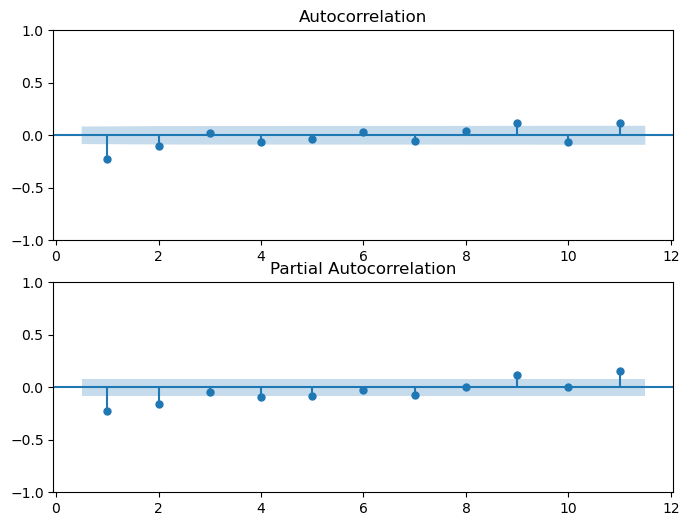

In [165]:
#Just an example with other Series

aus_employment_diff = candy['IPG3113N'].diff().diff(12).dropna()

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=11, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=11, zero=False, ax=ax2)

plt.show()

Nothing we can conclude, now the ACF and PACF with seasonal lags.

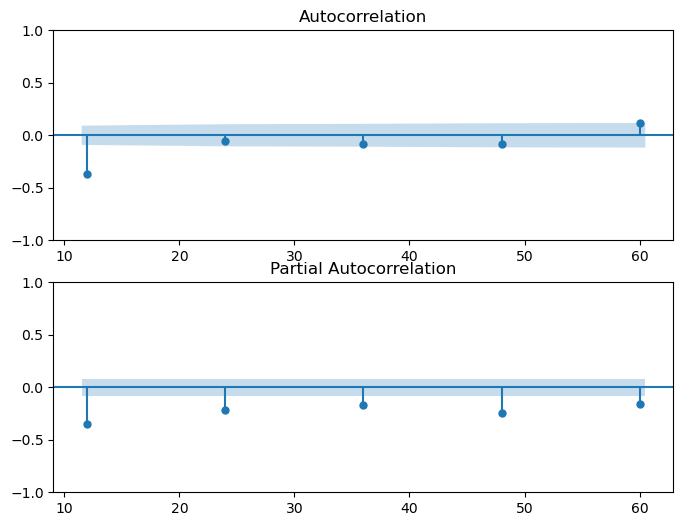

In [167]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, zero=False, ax=ax1, lags=lags)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, zero=False, ax=ax2, lags=lags)

plt.show()

#### Automation and Saving

##### Automation
Searching over model orders with the `pmdarima` package 

```py
#Parameters
pm.autoarima(   df                  # Data
                d = 0,              # non-seasonal difference order
                start_p = 1,        # Initial guess for p
                start_q = 1,        # Initial guess for q
                max_p = 3,          # Max value of p to test
                max_q = 3,          # Max value of q to test
                                    # ---------------------------
                seasonal = True     # is the TS seasonal
                m = 12,             # seasonal period
                D = 1,              # seasonal difference order
                start_P = 1,        # Initial guess for p
                start_Q = 1,        # Initial guess for q
                max_P = 3,          # Max value of p to test
                max_Q = 3,          # Max value of q to test
                                    # ---------------------------
                inromation_criterion = 'aic',   # Used to select the best model
                trace = True,                   # Print results while training
                error_action = 'ignore',        # Ignore orders that don't work
                stepwise = True                 # Apply intelligent order search
            )
```

In [172]:
import pmdarima as pm

results = pm.auto_arima(candy)

In [181]:
results
# results.summary()
# results.plot_diagnostics()

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

##### Saving the model

```py
import joblib

# Save
filepath = '...pkl'
joblib.dump(model_results_object, filepath)

# Load
model_results_object = joblib.load(filepath)
```

##### Updating the model 
When time has passed, and we want to incorporate data hat we have collected since then.

>NOTE: This is note the same as choosing the model order again. If updating with a large amount of new data, user the box-jenkins method.

```py
# Add new observation and update parameters
model_results_object.update(df_new)

```

#### SARIMA and Box-Jenkins

Consider the following items in the identidication step:
* Determine if a series is seasional
* If so, find seasonal period
* Transforms to make seasonal TS stationary
* Can be, non-seasonal differencings, seasonal differencing or both.
* `D` should be 0 or 1
* `d + D` should be 0-2
* There can be TS with weak or strong seasonal patterns. 
* With weak seasonality, try building models for each case and see which one performs better. 
* With stron seasonality, always use seasonal differencing
* If there are additive series, proceed with differencing
* If there are multiplicative series, apply log transform first. (Each time oscilatio is bigger)

#### Full Excercise

In [189]:
co2 = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\ARIMA\co2.csv', parse_dates=['date'], index_col = 'date')
co2.head(1)


CO2_ppm
date               
1958-03-01   315.71

In [190]:
# Import model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create model object
model = SARIMAX(co2, 
                order=(1,1,1), 
                seasonal_order=(0,1,1,12), 
)
# Fit model
results = model.fit()

In [191]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -183.113
Date:                            Wed, 29 Mar 2023   AIC                            374.226
Time:                                    18:15:17   BIC                            392.510
Sample:                                03-01-1958   HQIC                           381.287
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1960      0.081      2.409      0.016       0.037       0.355
ma.L1         -0.5609      0.070     -7.978      0.000      -0.699      -0.423
ma.S.L12      -0.8678      0.021    -42.208      0.000      -0.908      -0.828
sigma2         0.0955      0.005     20.561      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 5.18
Prob(Q):                              0.70   Prob(JB):                         0.07
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We can see that
1. Residual are nos correlated
2. Residual are normally distributed

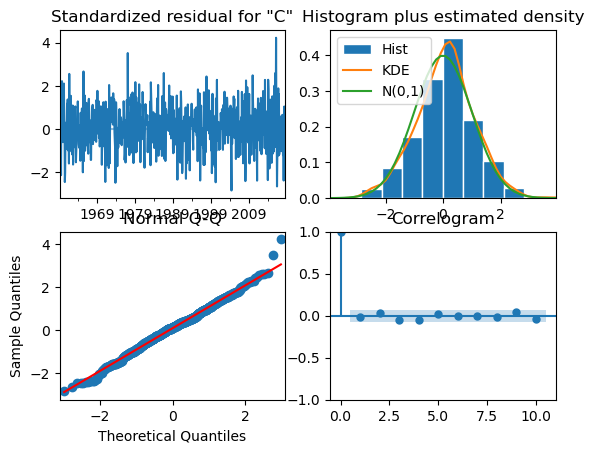

In [193]:
# Plot common diagnostics
results.plot_diagnostics()
plt.show()

Residuales look quite fine in these plots.

Now, the forecast:

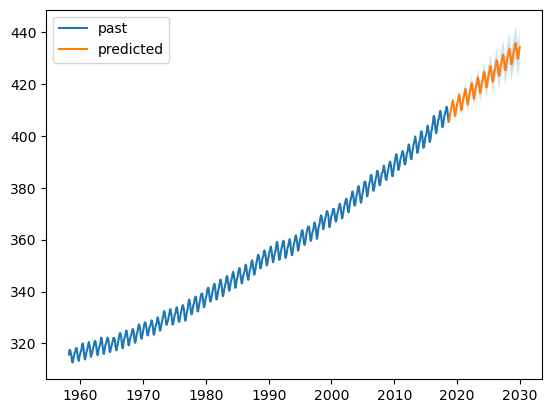

In [196]:
# Create forecast object
forecast_object = results.get_forecast(136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int['lower CO2_ppm'], conf_int['upper CO2_ppm'], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [197]:
# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

434.26052269399537
lower CO2_ppm    427.484737
upper CO2_ppm    441.036309
Name: 2030-01-01 00:00:00, dtype: float64


Great work! Your estimate says that CO2 will increase by roughly another 35ppm from October 2018 to January 2030. What do you think would happen if we lowered or raised our emission rates between now an then? How would our model perform if these dynamics changed?

---

## 5. ML for Time Series

### 5.1 Time Series and Machine Learning

#### Timeseries kinds and applications

This course will focus on:
* Feature extraction
* Model fitting
* Prediction and validation

#### ML Basics

For reshaping

`array.reshape(-1,1)`

#### ML and TS data

For auditory data, there is a package called `librosa`

```py
#Py
audio, sfreq = lr.load('path/name.wav') 
print(sfreq)
```

In [4]:
path = r'C:\Github\Learning\Datasets\Time_Series\ML\audio_munged.hdf5'

with pd.HDFStore(path) as hdf:
    # This prints a list of all group names:
    print(hdf.keys())

['/h5io/key_data', '/h5io/key_meta']


In [12]:
df = pd.read_hdf(path, key='/h5io/key_data')  

In [15]:
df.head()

0         1         2         3         4         5   \
time                                                                   
0.000000 -0.024684 -0.024507  0.008254 -0.000995  0.000281 -0.030747   
0.000454 -0.060429 -0.047736  0.014809 -0.003381  0.000381 -0.060250   
0.000907 -0.070080 -0.039938  0.010475 -0.000948  0.000063 -0.047856   
0.001361 -0.084212 -0.041199  0.010272 -0.000766  0.000026 -0.048017   
0.001814 -0.085111 -0.036050  0.008580  0.000469 -0.000432 -0.040114   

                6         7         8         9   ...        50        51  \
time                                              ...                       
0.000000  0.002953  0.005497 -0.000950  0.013836  ...  0.073388  0.008799   
0.000454  0.003034  0.010088 -0.003243  0.036587  ...  0.150714  0.017107   
0.000907  0.000292  0.008272 -0.004097  0.044119  ...  0.129426  0.015018   
0.001361 -0.005916  0.009358 -0.004431  0.053670  ...  0.137134  0.017465   
0.001814 -0.005307  0.009418 -0.003582  0.060088  ...  0.125747  0.018050   

                52        53        54        55        56        57  \
time                                                                   
0.000000 -0.361737 -0.000501  0.025458 -0.001609 -0.005471 -0.003371   
0.000454 -0.651842 -0.004710  0.053362 -0.004319 -0.011112 -0.004309   
0.000907 -0.365683 -0.007257  0.050708  0.000573 -0.009940 -0.001084   
0.001361 -0.173468 -0.005510  0.052555 -0.001807 -0.011539 -0.000613   
0.001814  0.141141 -0.000892  0.046691 -0.007140 -0.012783  0.000383   

                58        59  
time                          
0.000000 -0.003332 -0.005799  
0.000454 -0.007769 -0.010838  
0.000907 -0.008644 -0.007528  
0.001361 -0.010337 -0.008523  
0.001814 -0.011342 -0.008434  

[5 rows x 60 columns]

In [26]:
sfreq = 8820/4
print(sfreq)

2205.0


In [27]:
indices = np.arange(0,len(df))
time = indices / sfreq
print(time)

[0.00000000e+00 4.53514739e-04 9.07029478e-04 ... 3.99863946e+00
 3.99909297e+00 3.99954649e+00]


In [31]:
final_time = (len(df) - 1) / sfreq
time = np.linspace(0, final_time, int(sfreq))
print(time)

[0.00000000e+00 1.81467626e-03 3.62935253e-03 ... 3.99591713e+00
 3.99773181e+00 3.99954649e+00]


### 5.2 Time Series as Inputs to a Model

#### Classifying a time series

* Using raw data is too noisy
* Features generation
* Calculate summary statistics of the data (which removes time dimention and returns a traditional classification df)

```py
#py
means = np.mean(audio, axis=1)
maxs = np.max(audio, axis=1)
stds = np.std(audio, axis=1)

from sklearn.svm import Linear SVC

X = np.column:stack([means, maxs, stds])
y = labels.reshape(-1,1)
model = LinearSVC()
model.fit(X,y)

predictions = model.predict(X_test)

#Way 1
percent_score = sum(predictions == labels_test) / len(label_test)

#Way 2
percent_score = accuracy_score(labels_test, predictions)
```

#### Improving features for classification

##### The auditory envelope 

* Smooth the data to calculate the auditory envelope

##### Smoothing over time

* Instead of averaging all time, it can be a local average (rolling window)
* This is smoothing a TS. 
* It removes short-term noise

```py
#Calculating a rolling window satistic
audio_smooth = audio.rolling(window=50).mean()

#Calculating the auditory envelope
audio_rectified = audio.apply(np.abs)
audio_envelope = audio_rectified.rolling(50).mean()
```
* This is a representation of how audio energy changes over time.

* Now, we've calculated the acoustic envelope, we can create better features for our classifier.

```py
#Calculating features
envelope_mean = np.mean(audio_envelope, axis=0)
envelope_std = np.std(audio_envelope, axis=0)
envelope_max = np.max(audio_envelope, axis=0)

#Create training data
X = np.column_stack([envelope_mean, envelope_std, envelope_max])
y = labels.reshape(-1,1)

#Val_score
scores = cross_val_score(model, X, y, cv=3)
```

* An important auditory feature is the **tempogram**, which estimates the tempo of a sound over time, and it's possible to calculate summary statistics of temp, as it was done with the envelope.

```py
#To extract te tempo
import librosa as lr

audio_tempo = lr.beat.tempo(audio, sr=sfreq, hop_length=2**6, aggregate = None)
```


#### The spectogram

Spectral engineering is one of the most common techniques in machine learning for time series data. The first step in this process is to calculate a spectrogram of sound. This describes what spectral content (e.g., low and high pitches) are present in the sound over time. 

* A spectrogram is a collection of windowd Fourier transforms over time.
* Also called a Short-Term Fourier Transform (STFT)
* Similar calculation as a rolling mean:
    * Choose a window size
    * At a timepoint, calculate the FFT for that window
    * Slide the window over by one 
    * Aggregate results

##### Calculating the STFT

* Can be done with `librosa`
* For our purposes, we'll convert into decibels which normalizes the average values of all frequencies
* Visualize with `specshow()`function.

```py
# Import the functions we'll use for the STFT
from librosa.core import stft, amplitude_to_db
from librosa.display import specshow
import matplotlib.pyplot as plt

# Calculate our STFT
HOP_LENGTH = 2**4
SIZE_WINDOW = 2**7
audio_spec = stft(audio, hop_length=HOP_LENGTH, n_fft=SIZE_WINDOW)

# Convert into decibels for visualization
spec_db = amplitude_to_db(audio_spec)

# Visualize
fig, ax = plt.subplots()
specshow(spec_db, sr=sfreq, x_axis='time', y axis='hz'hop length=HOP LENGTH  ax=ax)
```

##### Calculating spectral features

```py
# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
centroids = lr.feature.spectral_centroid(S=spec)[0]

# Display these features on top of the spectrogram
fig, ax = plt.subplots()
specshow(spec, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=ax)
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2,                 
                centroids + bandwidths / 2, alpha=0.5)
```

##### Combining spectral and temporal features in a classifier
```py
centroids_all = []
bandwidths_all = []
for spec in spectrograms:    
    bandwidths = lr.feature.spectral_bandwidth(S=lr.db_to_amplitude(spec))
    centroids = lr.feature.spectral_centroid(S=lr.db_to_amplitude(spec))
    
    # Calculate the mean spectral bandwidth    
    bandwidths_all.append(np.mean(bandwidths))  
    # Calculate the mean spectral centroid    
    centroids_all.append(np.mean(centroids))  
    
# Create our X matrix
X = np.column_stack([means, stds, maxs, tempo_mean, tempo_max, tempo_std, bandwidths_all, centroids_all])
```

### 5.3 Predicting Time Series Data

#### Predicting data over time

##### Visualizing relationships between timeseries
```py
#py
fig, axs = plt.subplots(1, 2)

# Make a line plot for each timeseries
axs[0].plot(x, c='k', lw=3, alpha=.2)
axs[0].plot(y)
axs[0].set(xlabel='time', title='X values = time')

# Encode time as color in a scatterplot
axs[1].scatter(x_long, y_long, c=np.arange(len(x_long)), cmap='viridis')
axs[1].set(xlabel='x', ylabel='y', title='Color = time')
```

##### Visualize predictions

```py
alphas = [.1, 1e2, 1e3]
ax.plot(y_test, color='k', alpha=.3, lw=3)

for ii, alpha in enumerate(alphas):
    y_predicted = Ridge(alpha=alpha).fit(X_train, y_train).predict(X_test)    
    ax.plot(y_predicted, c=cmap(ii / len(alphas)))
    
ax.legend(['True values', 'Model 1', 'Model 2', 'Model 3'])
ax.set(xlabel="Time")
```

In [55]:
prices = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\ML\prices.csv', parse_dates=['date'], index_col = 'date')
prices.drop(columns=['volume'], inplace=True)
prices.head(1)


symbol       close
date                         
2010-01-04   AAPL  214.009998

In [56]:
all_prices = prices.pivot(columns='symbol', values='close')
all_prices.head(1)

symbol            AAPL        ABT        AIG  AMAT       ARNC    BAC   BSX  \
date                                                                         
2010-01-04  214.009998  54.459951  29.889999  14.3  16.650013  15.69  9.01   

symbol        C        CHK      CMCSA  ...       QCOM    RF       SBUX      T  \
date                                   ...                                      
2010-01-04  3.4  28.090001  16.969999  ...  46.939999  5.42  23.049999  28.58   

symbol              V         VZ    WFC        XOM   XRX  YHOO  
date                                                            
2010-01-04  88.139999  33.279869  27.32  69.150002  8.63  17.1  

[1 rows x 50 columns]

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = all_prices[['EBAY', 'NVDA', 'YHOO']]
y = all_prices[['AAPL']]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[  -0.55495235   -0.9912733  -322.41700994]


-3308.668763845182


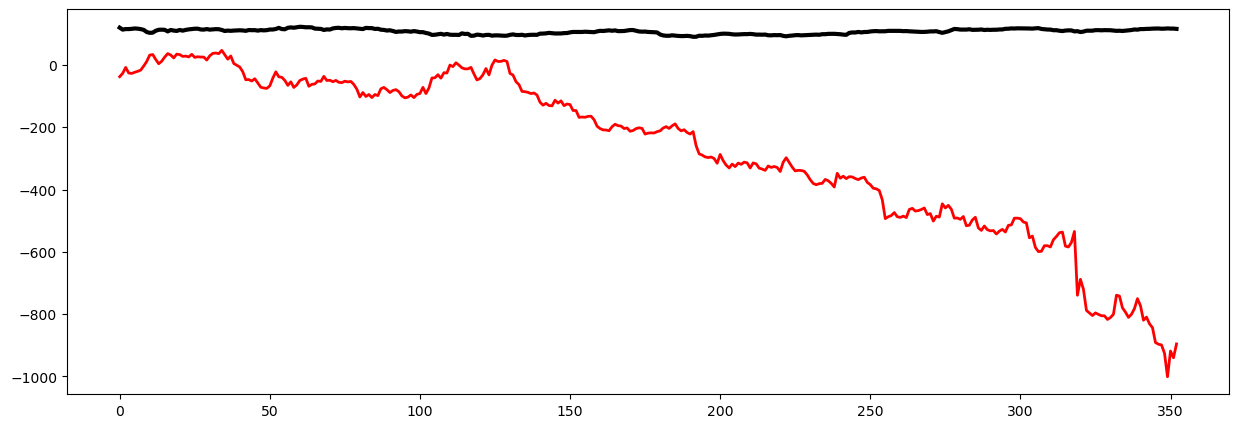

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.8, shuffle=False)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.array(y_test), color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

#### Advanced time series prediction

<AxesSubplot:xlabel='date'>

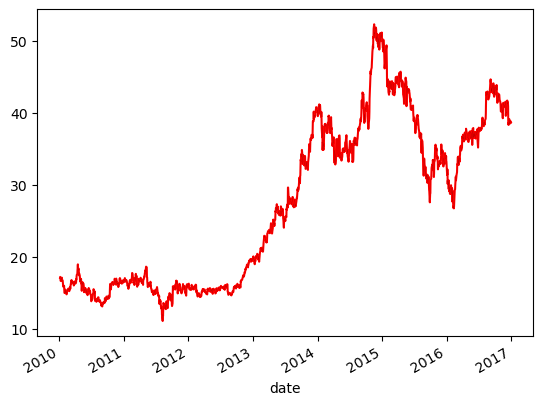

In [59]:
missing = all_prices['YHOO'].isna()

prices_interp = all_prices['YHOO'].interpolate('linear')

ax = prices_interp.plot(c='r')
all_prices['YHOO'].plot(c='k', ax=ax, lw=0.05)

In [60]:
def percent_change(values):
    """Calculates the % change between the last value     and the mean of previous values"""
    # Separate the last value and all previous values into variables    
    previous_values = values[:-1]    
    last_value = values[-1]

    # Calculate the % difference between the last value # and the mean of earlier values    
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)

    return percent_change


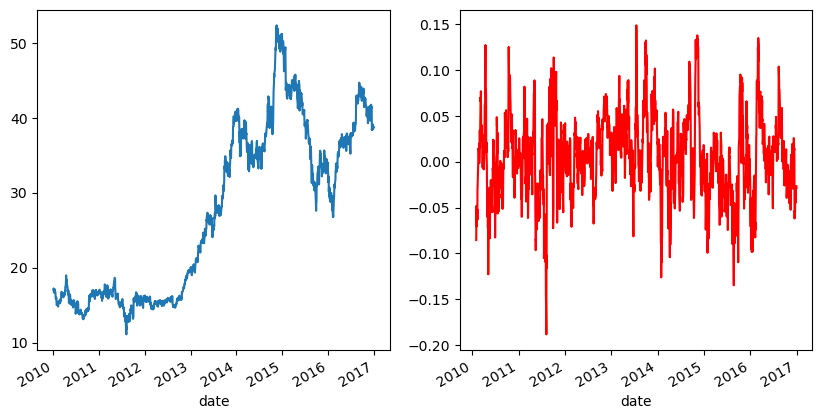

In [61]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
ax = all_prices['YHOO'].plot(ax=axs[0])
ax = all_prices['YHOO'].rolling(20).aggregate(percent_change).plot(ax=axs[1], c='r')

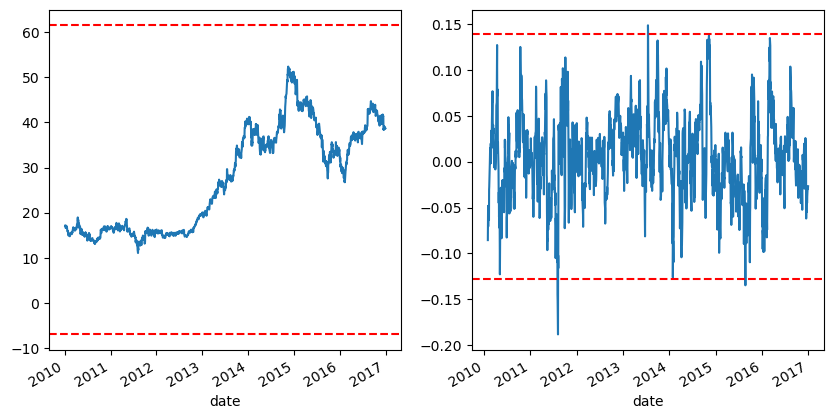

In [62]:
prices2 = all_prices['YHOO']
prices_perc_change = all_prices['YHOO'].rolling(20).aggregate(percent_change)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for data, ax in zip([prices2, prices_perc_change], axs):
    # Calculate the mean / standard deviation for the data    
    this_mean = data.mean()
    this_std = data.std()

    # Plot the data, with a window that is 3 standard deviations around the mean
    data.plot(ax=ax)    
    ax.axhline(this_mean + this_std * 3, ls='--', c='r')    
    ax.axhline(this_mean - this_std * 3, ls='--', c='r')


##### Replacing outliers using the threshold

<AxesSubplot:xlabel='date'>

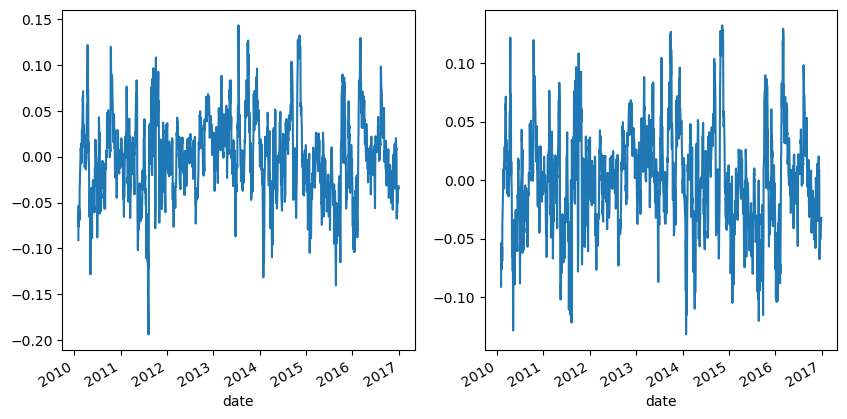

In [72]:
# Center the data so the mean is 0
prices_outlier_centered = prices_perc_change - prices_perc_change.mean()

# Calculate standard deviation
std = prices_perc_change.std()

# Use the absolute value of each datapoint to make it easier to find outliers
outliers = np.abs(prices_outlier_centered) > (std * 3)

# Replace outliers with the median value. We'll use np.nanmean since there may be nans around the outliers
prices_outlier_fixed = prices_outlier_centered.copy()
prices_outlier_fixed[outliers] = np.nanmedian(prices_outlier_fixed)

#PLOT

fig, ax = plt.subplots(1,2, figsize=(10,5))
prices_outlier_centered.plot(ax=ax[0])
prices_outlier_fixed.plot(ax=ax[1])

#### Creating features over time

1. Using `.aggregate` for feature extraction

In [80]:
X.head(1)

symbol      EBAY   NVDA  YHOO
date                         
2010-01-04  23.9  18.49  17.1

In [85]:
feats = X.rolling(20).aggregate([np.std, np.max]).dropna()
feats.head(3)

symbol          EBAY                 NVDA                 YHOO       
                 std       amax       std       amax       std   amax
date                                                                 
2010-02-01  0.491927  24.129998  0.997618  18.879999  0.681782  17.23
2010-02-02  0.481374  24.129998  0.972252  18.879999  0.711206  17.23
2010-02-03  0.476760  24.129998  0.912725  18.879999  0.697884  17.17

```py
#Py
#Partial function to configure some parameters for a certain function
from functools import partial

mean_over_first_axis = partial(np.mean, axis=0)
print(mean_over_first_axis(a))
```

In [101]:
np.percentile(np.linspace(0,200), 20)

40.0

In [131]:
from functools import partial

data = np.linspace(0,100)

percentile_funcs = [partial(np.percentile, q=ii) for ii in [20,40,60]]

percentiles = [i_func(data) for i_func in percentile_funcs]
print(percentiles)


[20.0, 40.0, 60.0]


2. Creating "date-based" features

Like:
* Time in the year (day, month, etc)
* Holiday

In [151]:
X.index.weekday

Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
            ...
            4, 0, 1, 2, 3, 4, 1, 2, 3, 4],
           dtype='int64', name='date', length=1762)

```py 
# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.day_of_week
prices_perc['week_of_year'] = prices_perc.index.week
prices_perc['month_of_year'] = prices_perc.index.month
```

### 5.4 Validating and Inspecting Time Series Models

#### Creating features from the past

In [163]:
#Creating a time shifted df

data = pd.Series([0,1,2,3,4,5,6,7,8,9,10])

shifts = [0,1,2,3,4,5,6,7]

many_shifts = {'lag_{}'.format(ii): data.shift(ii) for ii in shifts}
many_shifts = pd.DataFrame(many_shifts)
many_shifts

lag_0  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7
0       0    NaN    NaN    NaN    NaN    NaN    NaN    NaN
1       1    0.0    NaN    NaN    NaN    NaN    NaN    NaN
2       2    1.0    0.0    NaN    NaN    NaN    NaN    NaN
3       3    2.0    1.0    0.0    NaN    NaN    NaN    NaN
4       4    3.0    2.0    1.0    0.0    NaN    NaN    NaN
5       5    4.0    3.0    2.0    1.0    0.0    NaN    NaN
6       6    5.0    4.0    3.0    2.0    1.0    0.0    NaN
7       7    6.0    5.0    4.0    3.0    2.0    1.0    0.0
8       8    7.0    6.0    5.0    4.0    3.0    2.0    1.0
9       9    8.0    7.0    6.0    5.0    4.0    3.0    2.0
10     10    9.0    8.0    7.0    6.0    5.0    4.0    3.0

```py 
# These are the "time lags"
shifts = np.arange(1, 11).astype(int)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): prices_perc.shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
prices_perc_shifted = pd.DataFrame(shifted_data)

# Plot the first 100 samples of each
ax = prices_perc_shifted.iloc[:100].plot(cmap=plt.cm.viridis)
prices_perc.iloc[:100].plot(color='r', lw=2)
ax.legend(loc='best')
plt.show()
```

#### Cross-validating TS data

One of the most common cross validations routines, is:

```py
#py
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)
for tr, tt in cv.split(X,y):
    model.fit(X[tr], y[tr])
    model.score(X[tt], y[tt])
```


Another good technique:

```py
# Import and initialize the cross-validation iterator
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit(n_splits=10)

fig, ax = plt.subplots(figsize=(10, 5))
for ii, (tr, tt) inenumerate(cv.split(X, y)):
    # Plot training and test indices
    l1 = ax.scatter(tr, [ii] * len(tr), c=[plt.cm.coolwarm(.1)], marker='_', lw=6)    
    l2 = ax.scatter(tt, [ii] * len(tt), c=[plt.cm.coolwarm(.9)], marker='_', lw=6)    
    
    ax.set(ylim=[10, -1], title='TimeSeriesSplit behavior', xlabel='data index', ylabel='CV iteration')    
    ax.legend([l1, l2], ['Training', 'Validation'])
```


Also, can create a custom scoring function:

```py
def my_function(estimator, X, y):
    y_pred = estimator.predict(X)
    my_custom_score = my_custom_function(y_pred, y)
    return my_custom_score


#EXAMPLE

def my_pearsonr(est, X, y):
    # Generate predictions and convert to a vector     
    y_pred = est.predict(X).squeeze()
    
    # Use the numpy "corrcoef" function to calculate a correlation matrix    
    my_corrcoef_matrix = np.corrcoef(y_pred, y.squeeze())
    
    # Return a single correlation value from the matrix    
    my_corrcoef = my_corrcoef[1, 0]
    return my_corrcoef

```
---
From the excercises

```py 
#OPTION 1 WITH SHUFFLE (NOT VERY GOOD)

# Import ShuffleSplit and create the cross-validation object
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(10, random_state=1)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr], y[tr])
    
    # Generate predictions on the test data, score the predictions, and collect
    prediction = model.predict(X[tt])
    score = r2_score(y[tt], prediction)
    results.append((prediction, score, tt))

# Custom function to quickly visualize predictions
visualize_predictions(results)

#---

#OPTION 2 WITHOUT SHUFFLE (BETTER)

# Create KFold cross-validation object
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=False)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr], y[tr])
    
    # Generate predictions on the test data and collect
    prediction = model.predict(X[tt])
    results.append((prediction, tt))
    
# Custom function to quickly visualize predictions
visualize_predictions(results)

#---

#OPTION 3 

# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit 

# Create time-series cross-validation object
cv =TimeSeriesSplit(10)

# Iterate through CV splits
fig, ax = plt.subplots()
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + y[tr])

ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
plt.show()
```

#### Stationarity and stability

* Non-stationary data results in variability in the model

To quantify this, we can have different approaches:

1. Cross validation:
    * Calculate model parameters one each iteration
    *  Assess parameter stability across all CV splits 

2. Bootstraping:
    * Take a random sample with replacemen
    * Calculate the mean of the sampple
    * Repeat many times (1000s)
    * Calculate the percentiles (usually 2.5. 97.5)

The result is a 95% confidence interval of the mean of each coefficient.

```py 
#===BOOTSTRAP===

from sklearn.utils import resample
# cv_coefficients has shape (n_cv_folds, n_coefficients)
n_boots = 100
bootstrap_means = np.zeros(n_boots, n_coefficients)

for ii inrange(n_boots):
    # Generate random indices for our data with replacement, then take the sample mean    
    random_sample = resample(cv_coefficients)    
    bootstrap_means[ii] = random_sample.mean(axis=0)
    
# Compute the percentiles of choice for the bootstrapped means
percentiles = np.percentile(bootstrap_means, (2.5, 97.5), axis=0)


#===PLOTTING===

fig, ax = plt.subplots()
ax.scatter(many_shifts.columns, percentiles[0], marker='_', s=200)
ax.scatter(many_shifts.columns, percentiles[1], marker='_', s=200)


#=== MODEL PERFORMANCE OVER TIME===

def my_corrcoef(est, X, y):
"""Return the correlation coefficient between model predictions and a validation set."""
    return np.corrcoef(y, est.predict(X))[1, 0]
    
# Grab the date of the first index of each validation set
first_indices = [data.index[tt[0]] for tr, tt in cv.split(X, y)]

# Calculate the CV scores and convert to a Pandas Series
cv_scores = cross_val_score(model, X, y, cv=cv, scoring=my_corrcoef)
cv_scores = pd.Series(cv_scores, index=first_indices)


#===VISUALIZING MODEL SCORES AS A TIMESERIES===

fig, axs = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

# Calculate a rolling mean of scores over time
cv_scores_mean = cv_scores.rolling(10, min_periods=1).mean()
cv_scores.plot(ax=axs[0])
axs[0].set(title='Validation scores (correlation)', ylim=[0, 1])

# Plot the raw data
data.plot(ax=axs[1])
axs[1].set(title='Validation data')

#FIX WINDOW

window = 100
cv= TimeSeriesSplit(10, max_traoin_size=window)
```
---